# PmagPy Jupyter Notebook Version
This notebook demonstrates the use of **PmagPy** functions from within a  Jupyter notebook in parallel with the PmagPy cookbook http://earthref.org/PmagPy/cookbook.

- What is **PmagPy**?  A software package for analyzing paleomagnetic and rock magnetic data using Python.
- What are paleomagnetism and rock magnetism?  See textbook at: https://earthref.org/MagIC/books/Tauxe/Essentials/


### Installing Python
- If you haven't already installed the anaconda version of **Python**: follow these instructions: https://earthref.org/PmagPy/cookbook/#getting_python
- download and install git: https://git-scm.com/downloads

### Installing **PmagPy**
- open your command line prompt: https://earthref.org/PmagPy/cookbook/#command_line
- install **PmagPy**: https://earthref.org/PmagPy/cookbook/#pip_install
- To use this notebook type the following (exactly) from your command line from your home directory: 

cd Desktop

move_data_files.py -d .

cd data_files/notebooks

jupyter notebook


### Using Jupyter notebooks for Earth Science
- There is a full course in Python for Earth Scientists available on github.  To check it out, see: 

https://nbviewer.jupyter.org/github/ltauxe/Python-for-Earth-Science-Students/blob/master/Lecture_01_syllabus.ipynb


- This will give you the chops to use the rest of this notebook.  

## Importing packages and modules into the notebook
- To use the functions in this notebook, we have to   import the pmagpy modules, **pmagplotlib**, **pmag** and **ipmag** and some other handy functions for use in the notebook.
- This notebook is meant to function from within the PmagPy data_files/notebooks directory and calls are relative to that.  

- Run the code block below:



In [1]:
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt # our plotting buddy
import numpy as np # the fabulous NumPy package
import pandas as pd # and of course Pandas
# test if Basemap is installed
basemap_present = True
try: 
    from mpl_toolkits.basemap import Basemap
except ImportError:
    print("Your Python installation doesn't have Basemap.  You won't be able to run certain plotting programs")
    basemap_present = False
# This allows you to make matplotlib plots inside the notebook.  
%matplotlib inline 
from importlib import reload # in case some package changed since you imported it. 
from IPython.display import Image



### Figures

- The plotting functions make plots to the screen (using the  %matplotlib inline magic command), but all **matplotlib** plots can be saved with the command: 

plt.savefig('PATH_TO_FILE_NAME.FMT') 

and then viewed in the notebook with:

Image('PATH_TO_FILE_NAME.FMT')


### Working with the MagIC data base
- The Magnetics Information Consortium (MagIC) maintains a database of published rock and paleomagnetic data: https://www2.earthref.org/MagIC 
- Many **PmagPy** scripts are designed to work with data in the MagIC format.  This notebook uses Data Model 3.0: https://www2.earthref.org/MagIC/data-models/3.0   There are nine basic tables: contribution, locations, sites, samples, specimens, measurements, criteria, ages and images.   These are tab delimited data tables with the first line consisting of a delimiter and the table name: (e.g.,  tab    measurements).  All of the examples here are tab delimited.  The second line are the column names: (e.g., specimen experiment method_codes treat_temp.....)
- In this notebook, we generally read MagIC tables into a Pandas Dataframe with a command like: 

meas_df=pd.read_csv('MEASUREMENTS_FILE_PATH',sep='\t',header=1)

These data can then be manipulated with **Pandas** functions (https://pandas.pydata.org/)



In [2]:
meas_df=pd.read_csv('../3_0/McMurdo/measurements.txt',sep='\t',header=1)
meas_df.head()

experiment specimen       measurement  dir_csd  dir_dec  dir_inc  \
0  mc01f-LP-DIR-AF    mc01f  mc01f-LP-DIR-AF1      0.4    171.9     31.8   
1  mc01f-LP-DIR-AF    mc01f  mc01f-LP-DIR-AF2      0.4    172.0     30.1   
2  mc01f-LP-DIR-AF    mc01f  mc01f-LP-DIR-AF3      0.5    172.3     30.4   
3  mc01f-LP-DIR-AF    mc01f  mc01f-LP-DIR-AF4      0.4    172.1     30.4   
4  mc01f-LP-DIR-AF    mc01f  mc01f-LP-DIR-AF5      0.5    171.9     30.8   

   hyst_charging_mode  hyst_loop  hyst_sweep_rate  treat_ac_field  \
0                 NaN        NaN              NaN          0.0000   
1                 NaN        NaN              NaN          0.0050   
2                 NaN        NaN              NaN          0.0075   
3                 NaN        NaN              NaN          0.0100   
4                 NaN        NaN              NaN          0.0125   

        ...         timestamp  magn_r2_det  magn_x_sigma  magn_xyz_sigma  \
0       ...               NaN          NaN           NaN             NaN   
1       ...               NaN          NaN           NaN             NaN   
2       ...               NaN          NaN           NaN             NaN   
3       ...               NaN          NaN           NaN             NaN   
4       ...               NaN          NaN           NaN             NaN   

   magn_y_sigma  magn_z_sigma  susc_chi_mass  susc_chi_qdr_mass  \
0           NaN           NaN            NaN                NaN   
1           NaN           NaN            NaN                NaN   
2           NaN           NaN            NaN                NaN   
3           NaN           NaN            NaN                NaN   
4           NaN           NaN            NaN                NaN   

   susc_chi_qdr_volume  susc_chi_volume  
0                  NaN              NaN  
1                  NaN              NaN  
2                  NaN              NaN  
3                  NaN              NaN  
4                  NaN              NaN  

[5 rows x 60 columns]

To write out a MagIC table, the preferred method is to convert any Pandas DataFrame to a list of dictionaries using a command like:

dicts=df.to_dict('records')

then call **pmag.magic_write()**



### pmag.magic_write

In [3]:
help(pmag.magic_write)

Help on function magic_write in module pmagpy.pmag:

magic_write(ofile, Recs, file_type)
    Parameters
    _________
    ofile : path to output file
    Recs : list of dictionaries in MagIC format
    file_type : MagIC table type (e.g., specimens)
    
    Return :
    [True,False] : True if successful
    ofile : same as input
    
    Effects :
        writes a MagIC formatted file from Recs



In [4]:
meas_dicts=meas_df.to_dict('records')
pmag.magic_write('my_measurements.txt',meas_dicts,'measurements')

25470  records written to file  my_measurements.txt


(True, 'my_measurements.txt')

## Guide to PmagPy
- the functions in this notebook are listed alphabetically so here is a handy guide by function:
- Useful calculations: 
    - [angle](#angle) : calculates the angle between two vectors
    - [apwp](#apwp) : returns predicted paleolatitudes, directions and pole latitude/longitude
        from apparent polar wander paths of Besse and Courtillot (2002).
    - [b_vdm](#b_vdm) : converts B (in microT) and (magnetic) latitude to V(A)DM (see vdm_b)
    - [bootams](#bootams) : calculates bootstrap statistics for tensor data
    - [cart_dir](#cart_dir) : converts cartesian coordinates (x,y,z) to declination, inclination, intensity (see dir_cart)
    - [di_eq](#di_eq) : maps declination, inclinatitions to X,Y for plotting in equal area projections
    - [di_geo](#di_geo) : rotates declination, inclination in specimen coordinates to geographic
    - [di_rot](#di_rot) : rotates directions to a  coordinate system with D,I as center
    - [di_tilt](#di_tilt) : rotates directions to stratigraphic coordinates
    - [di_vgp](#di_vgp) : converts direction to Virtual Geomagnetic Pole (see vgp_di)
    - [dia_vgp](#dia_vgp) : converts direction and alpha95 to Virtual Geomagnetic Pole and dp,dm
    - [dipole_pinc](#dipole_pinc) : calculates inclination given latitude assuming geocentric axial dipole
    - [dipole_plat](#dipole_plat) : calculates latitude given inclination assuming geocentric axial dipole
    - [dir_cart](#dir_cart) : converts declination, inclination, intensity to cartesian coordinates (see cart_dir)
    - [eigs_s](#eigs_s) : converts eigenparameters to equivalent 6 element tensor (see s_eigs)
    - [eq_di](#eq_di) : takes X,Y from equal area projection (e.g., from digitized coordinates) and  converts to declination, inclination
    - [fisher](#fisher) : generates sets of directions drawn from Fisher distributions with vertical true mean
    - [fishrot](#fishrot) : generates sets of directions drawn from Fisher distributions with arbitrary true mean
    - [gaussian](#gaussian) : generates data drawn from a normal distribution
    - [gobing](#gobing) : calculates Bingham statistics from a set of directions
    - [gofish](#gofish) : calculates Fisher statistics from a set of directions
    - [gokent](#gokent) : calculates Kent statistics from a set of directions
    - [goprinc](#goprinc) : calculates principal directions statistics
    - [igrf](#igrf) : calculates geomagnetic field vectors for location, age given a field model (e.g., IGRF)
    - [incfish](#incfish) : estimates the true mean inclination from inclination only data
    - [pca](#pca) : calculates the best-fit line or plane for demagnetization data and associated statistics
    - [pt_rot](#pt_rot) : rotates point given finite rotation pole
    - [s_eigs](#s_eigs) : takes a 6 element tensor and calculates eigen parameters (see eigs_s)
    - [s_geo](#s_geo) : rotates 6 element tensors to geographic coordinates
    - [s_hext](#s_hext) : calculates Hext statistics from 6 element tensors
    - [s_tilt](#s_tilt) : rotates 6 element tensors to stratigraphic coordinates
    - [squish](#squish): flattens inclination data given flattening factor (see unsquish)
    - [sundec](#sundec) : calulates direction to sun for location, date, time and sun azimuth
    - [tk03](#tk03) : generates sets of directions consistent with the TK03 field model
    - [uniform](#uniform) : generates sets of uniformly distributed directions
    - [unsquish](#unsquish) : unsquishes flattened inclinations, given flattening factor (see squish)
    - [vector_mean](#vector_mean) : calculates vector mean for sets of vectors (declination, inclination, intensity)
    - [vdm_b](#vdm_b) : calculates intensity at given location from specified virtual dipole moment (see b_vdm)
    - [vgp_di](#vgp_di) : calculates direction at given location from virtual geomagnetic pole (see di_vgp)
    - [watsons_f](#watsons_f) : calculates Watson's F statistic for testing for common mean
    
- Useful plots:
    - [ani_depthplot](#ani_depthplot) : plots anisotropy data against depth in stratigraphic section (Xmas tree plots)
    - [aniso_magic](#aniso_magic) : makes plots of anisotropy data and bootstrapped confidences 
    - [biplot_magic](#biplot_magic) : plots different columns against each other in MagIC formatted data files
    - [chi_magic](#chi_magic) : plots magnetic susceptibility data in MagIC format as function of field, frequency or temperature
    - [common_mean](#common_mean) : graphical approach to testing two sets of directions for common mean using bootstrap
    - [core_depthplot](#core_depthplot) : plots MagIC formatted data 
    - [curie](#curie) : makes plots of Curie Temperature data and provides estimates for Tc
    - [dayplot_magic](#dayplot_magic) : makes Day et al. (1977) and other plots with hysteresis statistics
    - [dmag_magic](#dmag_magic) : plots remanence against demagnetization step for MagIC formatted files
    - [eqarea](#eqarea) and [eqarea_magic](#eqarea_magic) : makes equal area projections for directions
    - [eqarea_ell](#eqarea_ell) : makes equal area projections for directions with specified confidence ellipses
    - [find_ei](#find_ei) : finds the inclination unflattening factor that unsquishes directions to match TK03 distribution
    - [fishqq](#fishqq): makes a Quantile-Quantile plot for directions against uniform and exponential distributions
    - [foldtest](#foldtest) & [foldtest_magic](#foldtest_magic) : finds  tilt correction that maximizes concentration of directions, with bootstrap confidence bounds.          
    - [hysteresis_magic](#hysteresis_magic) : makes plots of hysteresis data (not FORCs). 
    - [irmaq_magic](#irm_magic) : plots IRM acquistion data
    - [lnp_magic](#lnp_magic) : plots lines and planes for site level data and calculates best fit mean and alpha_95
    - [lowes](#lowes) : makes a plot of the Lowe's spectrum for a geomagnetic field model
    - [lowrie](#lowrie) and [lowrie_magic](#lowrie_magic) : makes plots of Lowrie's (1990) 3D-IRM demagnetization experiments
    - [plot_cdf and plot_2cdfs](#plot_cdf and plot_2cdfs) : makes a cumulative distribution plot of data
    - [plot_dia](#plot_dia) : makes equal are plots of directions and their alpha95s
    - [plot_geomagia](#plot_geomagia) : makes plots from files downloaded from the  geomagia website
    - [plot_magic_keys](#plot_magic_keys) : plots data from MagIC formatted data files
    - [qqplot](#qqplot) : makes a Quantile-Quantile plot for data against a normal distribution
    - [qqunf](#qqunf) : makes a Quantile-Quantile plot for data against a uniform distribution
    - [revtest](#revtest) & [revtest_magic](#revtest_magic) : performs a bootstrap reversals test

    - [watsons_v](#watsons_v) : makes a graph for Watson's V test for common mean
    - [zeq](#zeq) and [zeq_magic](#zeq_magic) : makes quicky zijderveld plots for measurement data

- Useful maps: 
    - [cont_rot](#cont_rot) : makes plots of continents after rotation to specified coordinate system
    - [plot_magmap](#plot_magmap) : makes a color contour plot of geomagnetic field models
    - [plot_map_pts](#plot_map_pts) : plots points on maps
    - [polemap_magic](#polemap_magic) : reads in MagIC formatted file with paleomagnetic poles and plots them
    - [vgpmap_magic](#vgpmap_magic) : reads in MagIC formatted file with virtual geomagnetic poles and plots them
   
- Working with MagIC:
    - [combine_magic](#combine_magic) : combines two MagIC formatted files of same type
    - [download_magic](#download_magic) : unpacks a text file downloaded from the MagIC website
    - [upload_magic](#upload_magic) : prepares a directory with MagIC tables for uploading to MagIC
    - [grab_magic_key](#grab_magic_key) : prints out a single column from a MagIC format file
    - [magic_select](#magic_select) : selects data from MagIC format file given conditions (e.g., method_codes contain string)
    - [orientation_magic](#orientation_magic) : converts an "orient.txt" formatted file with field notebook information into MagIC formatted files
    - [pmag.magic_write](#pmag.magic_write))
    - conversion of laboratory formats to MagIC 3.0
        - coming soon.... 



## angle

[\[Essentials Appendix A.3.4\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap1.html#x20-215000A.3.4) [\[angle.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/angle.py)



**angle.py** calculates the angle $\alpha$ between two declination,inclination pairs. It reads in the directions from the command line or from a file and calls **pmag.angle()** to do the calculation.  

There are several ways to use this from the notebook - one loading the data into a Pandas dataframe, then convert to the desired arrays, or load directly into a **Numpy** array of desired shape.  

In [5]:
help(pmag.angle)

Help on function angle in module pmagpy.pmag:

angle(D1, D2)
    Calculate the angle between two directions.
    
    Parameters
    ----------
    D1 : Direction 1 as an array of [declination, inclination] pair or pairs
    D2 : Direction 2 as an array of [declination, inclination] pair or pairs
    
    Returns
    -------
    angle : angle between the directions as a single-element array
    
    Examples
    --------
    >>> pmag.angle([350.0,10.0],[320.0,20.0])
    array([ 30.59060998])



In [6]:
# Pandas way:
di=pd.read_csv('../angle/angle.dat',delim_whitespace=True,header=None)
#rename column headers
di.columns=['Dec1','Inc1','Dec2','Inc2']


Here's the sort of data  in the file: 

In [7]:
di.head()

Dec1  Inc1   Dec2  Inc2
0   11.2  32.9    6.4 -42.9
1   11.5  63.7   10.5 -55.4
2   11.9  31.4  358.1 -71.8
3  349.6  36.2  356.3 -45.0
4   60.3  63.5   58.9 -56.6

Now we will use **pmag.angle()** to calculate the angles.  

In [8]:
# call pmag.angle
pmag.angle(di[['Dec1','Inc1']].values,di[['Dec2','Inc2']].values)

array([  75.92745193,  119.10251273,  103.65330599,   81.42586582,
        120.1048559 ,  100.8579262 ,   95.07347774,   74.10981614,
         78.41266977,  120.05285684,  114.36156914,   66.30664335,
         85.38356936,   95.07546203,   93.84174   ,   93.116631  ,
        105.39087299,   71.78167883,  104.04746653,   93.84450445,
         93.29827337,   96.34377954,   90.14271929,  112.17559328,
         90.06592091,  120.00493016,   75.31604123,   86.19902246,
         85.85667799,   82.64834934,  115.51261896,   99.28623007,
         65.9466766 ,   90.55185269,   90.50418859,   84.49253198,
         93.00731365,   67.47153733,   76.84279617,   83.80354   ,
        128.3068145 ,   91.690954  ,   46.87441241,  110.66917836,
        103.69699188,   64.35444341,   81.94448359,   94.01817998,
        121.19588845,   83.64445512,  113.72812352,   76.38276774,
        113.38742874,   74.09024232,   79.42493098,   74.92842387,
         90.5556631 ,   91.44844861,  112.71773111,   77.26775

Here is the other (equally valid) way using **np.loadtext()**.

In [9]:
# Numpy way:
di=np.loadtxt('../angle/angle.dat').transpose() # read in file
D1=di[0:2].transpose() # assign to first array
D2=di[2:].transpose() # assign to second array
pmag.angle(D1,D2) # call pmag.angle

array([  75.92745193,  119.10251273,  103.65330599,   81.42586582,
        120.1048559 ,  100.8579262 ,   95.07347774,   74.10981614,
         78.41266977,  120.05285684,  114.36156914,   66.30664335,
         85.38356936,   95.07546203,   93.84174   ,   93.116631  ,
        105.39087299,   71.78167883,  104.04746653,   93.84450445,
         93.29827337,   96.34377954,   90.14271929,  112.17559328,
         90.06592091,  120.00493016,   75.31604123,   86.19902246,
         85.85667799,   82.64834934,  115.51261896,   99.28623007,
         65.9466766 ,   90.55185269,   90.50418859,   84.49253198,
         93.00731365,   67.47153733,   76.84279617,   83.80354   ,
        128.3068145 ,   91.690954  ,   46.87441241,  110.66917836,
        103.69699188,   64.35444341,   81.94448359,   94.01817998,
        121.19588845,   83.64445512,  113.72812352,   76.38276774,
        113.38742874,   74.09024232,   79.42493098,   74.92842387,
         90.5556631 ,   91.44844861,  112.71773111,   77.26775

You can always save your output using **np.savetxt()**.   

In [10]:
angles=pmag.angle(D1,D2) # assign the returned array to angles
np.savetxt('angle.out',angles,fmt='%7.1f') # save formatted data to file.

## ani_depthplot


[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-15600013) [\[MagIC Database\]](https://earthref.org/MagIC) [\[ani_depthplot.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/ani_depthplot.py)

 Anisotropy data can be plotted versus depth. The program ani_depthplot.py uses MagIC formatted data tables of the rmag_anisotropy.txt and er_samples.txt types. rmag_anisotropy.txt stores the tensor elements and measurement meta-data while er_samples.txt stores the depths, location and other information. Bulk susceptibility measurements can also be plotted if they are available in a magic_measurements.txt formatted file.

In this example, we will use the data from Tauxe et al. (2015, doi:10.1016/j.epsl.2014.12.034) measured on samples obtained during Expedition 318 of the International Ocean Drilling Program. To get the entire dataset, go to the MagIC data base at: https://www2.earthref.org/MagIC/doi/10.1016/j.epsl.2014.12.034.  Download the data set and unpack it with [ipmag.download_magic](#download_magic).


We will use the **ipmag.ani_depthplot()** version of this program.

In [12]:
help(ipmag.ani_depthplot)

Help on function ani_depthplot in module pmagpy.ipmag:

ani_depthplot(spec_file='specimens.txt', samp_file='samples.txt', meas_file='measurements.txt', site_file='sites.txt', age_file=None, sum_file=None, fmt='svg', dmin=-1, dmax=-1, depth_scale='core_depth', dir_path='.')
    returns matplotlib figure with anisotropy data plotted against depth
    available depth scales: 'composite_depth', 'core_depth' or 'age' (you must provide an age file to use this option)



And here we go:

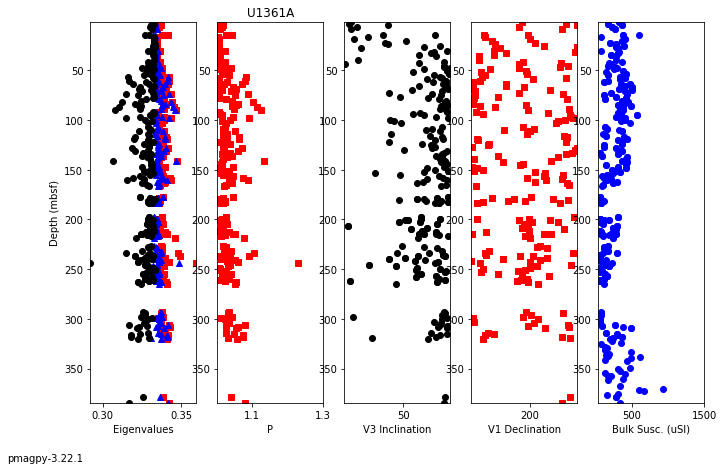

In [13]:
ipmag.ani_depthplot(dir_path='../ani_depthplot');

## aniso_magic


[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-15600013) [\[MagIC Database\]](https://earthref.org/MagIC) [\[aniso_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/aniso_magic.py)

 Samples were collected from the eastern margin a dike oriented with a bedding pole declination of 110∘ and dip of 2∘. The data have been imported into a MagIC (data model 3) formatted file named dike_specimens.txt.

We will make a plot of the data using **ipmag.aniso_magic_nb()**, using the site parametric bootstrap option and plot out the bootstrapped eigenvectors. We will also draw on the trace of the dike.



In [14]:
help(ipmag.aniso_magic_nb)

Help on function aniso_magic_nb in module pmagpy.ipmag:

aniso_magic_nb(infile='specimens.txt', samp_file='', site_file='', verbose=1, ipar=0, ihext=1, ivec=0, isite=0, iloc=0, iboot=0, vec=0, Dir=[], PDir=[], crd='s', num_bootstraps=1000, dir_path='.')
    Makes plots of anisotropy eigenvectors, eigenvalues and confidence bounds
    Inputs:
        verbose : if True, print messages to output
        Data Model 3.0 only formated files:
            infile : specimens formatted file with aniso_s data
            samp_file : samples formatted file with sample => site relationship
            site_file : sites formatted file with site => location relationship
        isite : if True plot by site, requires non-blank samp_file
        iloc : if True plot by location, requires non-blank samp_file, and site_file
        Dir : [Dec,Inc] list for comparison direction
        vec : eigenvector for comparison with Dir
        PDir : [Pole_dec, Pole_Inc] for pole to plane for comparison
        crd

-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
desired coordinate system not available, using available:  g


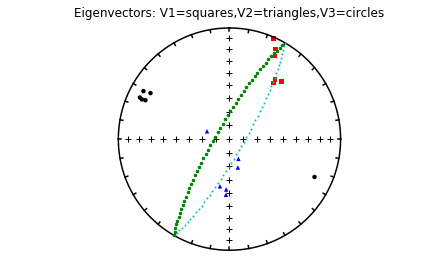

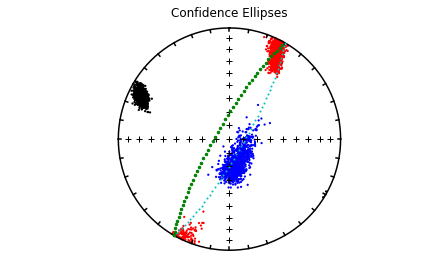

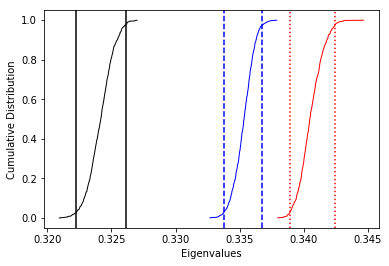

In [15]:
ipmag.aniso_magic_nb(infile='dike_specimens.txt',dir_path='../aniso_magic',\
       iboot=1,ihext=0,ivec=1,PDir=[120,10],ipar=1) # compare dike directions with plane of dike with pole of 120,10

 The specimen eigenvectors are plotted in the top diagram with the usual convention that squares are the V$_1$ directions, triangles are the V$_2$ directions and circles are the V$_3$ directions. All directions are plotted on the lower hemisphere. The bootstrapped eigenvectors are shown in the middle diagram. Cumulative distributions of the bootstrapped eigenvalues are shown in the bottom plot with the 95% confidence bounds plotted as vertical lines. It appears that the magma was moving in the northern and slightly up direction along the dike.

There are more options to **ipmag.aniso_magic_nb()** that come in handy. In particular, one often wishes to test if a particular fabric is isotropic (the three eigenvalues cannot be distinguished), or if a particular eigenvector is parallel to some direction. For example, undisturbed sedimentary fabrics are oblate (the maximum and intermediate directions cannot be distinguished from one another, but are distinct from the minimum) and the eigenvector associated with the minimum eigenvalue is vertical. These criteria can be tested using the distributions of bootstrapped eigenvalues and eigenvectors.

The following session illustrates how this is done, using the data in the test file sed_specimens.txt in the aniso_magic directory. 

-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
desired coordinate system not available, using available:  g


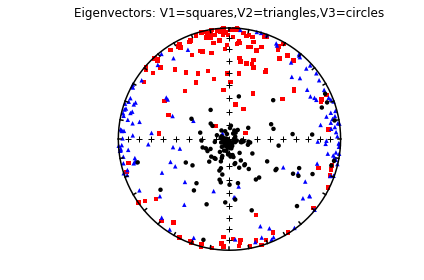

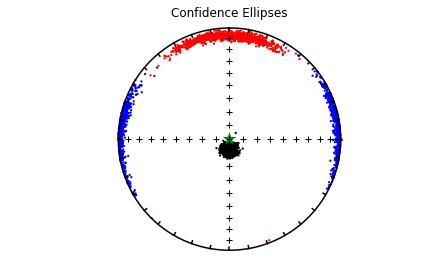

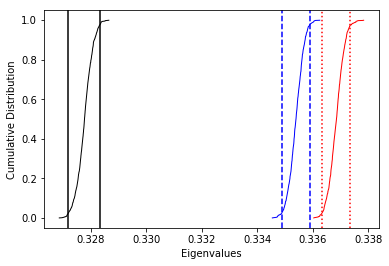

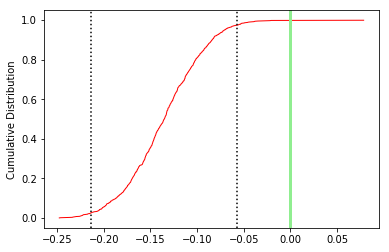

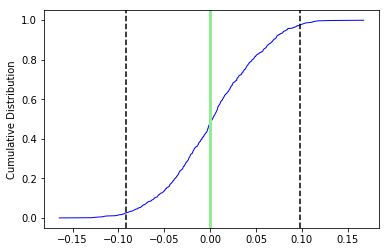

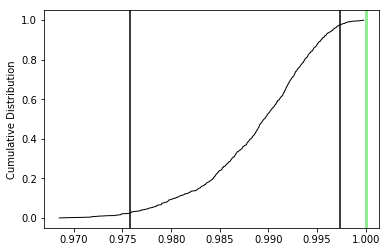

In [16]:
ipmag.aniso_magic_nb(infile='sed_specimens.txt',dir_path='../aniso_magic',\
       iboot=1,ihext=0,ivec=1,Dir=[0,90],vec=3,ipar=1) # parametric bootstrap and compare V3 with vertical

The top three plots are as in the dike example before, showing a clear triaxial fabric (all three eigenvalues and associated eigenvectors are distinct from one another. In the lower three plots we have the distributions of the three components of the chosen axis, V$_3$, their 95% confidence bounds (dash lines) and the components of the designated direction (solid line). This direction is also shown in the equal area projection above as a red pentagon. The minimum eigenvector is not vertical in this case. 

NOTE TO SELF:  Add in 'by site' or 'by sample' as in dmag_magic.  

## apwp

[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html#x15-15600016)  [\[apwp.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/apwp.py)

The program **apwp.py** calculates paleolatitude, declination, inclination from a pole latitude and longitude based on the paper Besse and Courtillot (2002; see [Essentials Chapter 16](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html#x15-15600016)   for complete discussion). Here we will  calculate the expected direction for 100 million year old rocks at a locality in La Jolla Cove (Latitude: 33$^{\circ}$N, Longitude 117$^{\circ}$W). Assume that we are on the North American Plate! (Note that there IS no option for the Pacific plate in the program **apwp.py**, and that La Jolla was on the North American plate until a few million years ago (6?). 



**apwp.py**  calls the function **pmag.bc02** which returns the pole for the plate for that age.  
It then does the favor of calling **pmag.vgp_di()** (see [vgp_di](#vgp_di)) to calculate the direction at the desired location (site latitude and longitude) and **pmag.magnetic_lat()** to get the paleolatitude.  

This can all be done directly from within the notebook.


In [17]:
help(pmag.bc02)

Help on function bc02 in module pmagpy.pmag:

bc02(data)
    get APWP from Besse and Courtillot 2002 paper
    
    Parameters
    ----------
    Takes input as [plate, site_lat, site_lon, age]
    plate : string (options: AF, ANT, AU, EU, GL, IN, NA, SA)
    site_lat : float
    site_lon : float
    age : float in Myr
    
    Returns
    ----------



In [18]:
# here are the desired plate, latitude, longitude and age:
data=['NA',33,-117,100]
pole_lat,pole_lon=pmag.bc02(data) # get the pole for these parameters
dec,inc=pmag.vgp_di(pole_lat,pole_lon,data[1],data[2]) # get the declination and inclination for that pole
paleo_lat=pmag.magnetic_lat(inc) # convert the inclination to paleo latitude
print (' Age   Paleolat.   Dec.   Inc.   Pole_lat.  Pole_Long.') # print everything out
print ('%7.1f %7.1f %7.1f %7.1f %7.1f  %7.1f\n' \
       %(data[3],paleo_lat,dec,inc,pole_lat,pole_lon))


 Age   Paleolat.   Dec.   Inc.   Pole_lat.  Pole_Long.
  100.0    38.8   352.4    58.1    81.5    198.3



## b_vdm

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560002)  [\[b_vdm.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/b_vdm.py)



**b_vdm.py** converts geomagnetic field intensity observed at the earth's surface at a particular (paleo)latitude and calculates the Virtual \[Axial\] Dipole Moment (vdm or vadm).  If the calls **pmag.b_vdm()** which we can do directly from within the notebook. \[See also [**vdm_b**](#vdm_b).\]

Here we use the function  **pmag.b_vdm()** to convert an estimated paleofield value of 33 $\mu$T obtained from a lava flow at 22$^{\circ}$ N latitude to the equivalent Virtual Dipole Moment (VDM) in Am$^2$. 

In [19]:
help(pmag.b_vdm)

Help on function b_vdm in module pmagpy.pmag:

b_vdm(B, lat)
    Converts a magnetic field value (input in units of tesla) to a virtual
    dipole moment (VDM) or a virtual axial dipole moment (VADM; output
    in units of Am^2)
    
    Parameters
    ----------
    B: local magnetic field strength in tesla
    lat: latitude of site in degrees
    
    Returns
    ----------
    V(A)DM in units of Am^2



In [20]:
print ('%7.1f'%(pmag.b_vdm(33e-6,22)*1e-21),' ZAm^2')

   71.6  ZAm^2


## biplot_magic 

[\[Essentials Chapter 8\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch8.html#x15-1560008) [\[MagIC Database\]](https://earthref.org/MagIC)  [\[biplot_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/biplot_magic.py)

It is often useful to plot measurements from one experiement against another. For example, rock magnetic studies of sediments often plot the IRM against the ARM or magnetic susceptibility. All of these types of measurements can be imported into a single measurements formatted file and use the MagIC method codes and other clues (lab fields, etc.) to differentiate one measurement from another. 

Data were obtained by Hartl and Tauxe (1997, doi: 10.1111/j.1365-246X.1997.tb04082.x) from a Paleogene core from 28$^{\circ}$ S (DSDP Site 522) and used for a relative paleointensity study. IRM, ARM, magnetic susceptibility and remanence data were uploaded to the MagIC database. The MagIC measurements formatted file for this study (which you can get from   https://earthref.org/MagIC/doi/10.1111/j.1365-246X.1997.tb04082.x and unpack with [download_magic](#download_magic)  is saved in data_files/biplot_magic/measurements.txt. 

We can reproduce the plots that **biplot_magic.py**  makes using Pandas.  The key to what the measurements mean is in the [Magic method codes](https://www2.earthref.org/MagIC/method-codes), so we can first get a unique list of all the available method_codes, then plot the ones we are interested in  against each other.  Let's read in the data file in to a **Pandas** DataFrame and exctract the method codes to see what we have: 

In [21]:
# read in the data
meas_df=pd.read_csv('../biplot_magic/measurements.txt',sep='\t',header=1)
# get the method_codes and print
print(meas_df.method_codes.unique())
# take a look at the top part of the measurements data frame
meas_df.head()

['LT-AF-Z' 'LT-AF-I' 'LT-IRM' 'LP-X']


citations  dir_dec  dir_inc          experiment  magn_mass  meas_temp  \
0  This study    268.5    -41.2  15-1-013:LP-AF-DIR   0.000003        300   
1  This study      NaN      NaN     15-1-013:LP-ARM   0.000179        300   
2  This study      NaN      NaN     15-1-013:LP-IRM   0.003600        300   
3  This study      NaN      NaN       15-1-013:LP-X        NaN        300   
4  This study    181.0     68.6  15-1-022:LP-AF-DIR   0.000011        300   

            measurement method_codes quality  specimen standard  \
0  15-1-013:LP-AF-DIR-1      LT-AF-Z       g  15-1-013        u   
1     15-1-013:LP-ARM-2      LT-AF-I       g  15-1-013        u   
2     15-1-013:LP-IRM-3       LT-IRM       g  15-1-013        u   
3       15-1-013:LP-X-4         LP-X     NaN  15-1-013      NaN   
4  15-1-022:LP-AF-DIR-5      LT-AF-Z       g  15-1-022        u   

   susc_chi_mass  treat_ac_field  treat_dc_field  treat_step_num  treat_temp  
0            NaN           0.015         0.00000             1.0         300  
1            NaN           0.080         0.00005             2.0         300  
2            NaN           0.000         1.00000             3.0         300  
3   2.380000e-07           0.010         0.00000             4.0         300  
4            NaN           0.015         0.00000             5.0         300

These are: an AF demag step (LT-AF-Z), an ARM (LT-AF-I), an IRM  (LT-IRM) and a susceptibility (LP-X).  Now we can fish out data for each method, merge them by specimen, dropping any missing measurements and finally plot one against the other.  

In [22]:
# get the IRM data
IRM=meas_df[meas_df.method_codes.str.contains('LT-IRM')]
IRM=IRM[['specimen','magn_mass']] #trim the data frame
IRM.columns=['specimen','IRM'] # rename the column
# do the same for the ARM data
ARM=meas_df[meas_df.method_codes.str.contains('LT-AF-I')]
ARM=ARM[['specimen','magn_mass']]
ARM.columns=['specimen','ARM']
# and the magnetic susceptibility
CHI=meas_df[meas_df.method_codes.str.contains('LP-X')]
CHI=CHI[['specimen','susc_chi_mass']]  
CHI.columns=['specimen','CHI']
# merge IRM ARM data by specimen
RMRMs=pd.merge(IRM,ARM,on='specimen')
# add on the susceptility data
RMRMs=pd.merge(RMRMs,CHI,on='specimen')

Now we are ready to make the plots.  

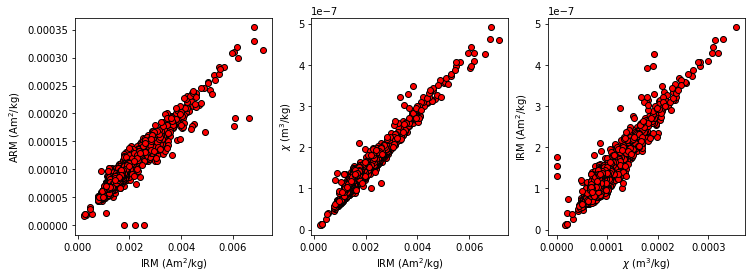

In [23]:
fig=plt.figure(1, (12,4)) # make a figure
fig.add_subplot(131) # make the first in a row of three subplots 
plt.plot(RMRMs.IRM,RMRMs.ARM,'ro',markeredgecolor='black')
plt.xlabel('IRM (Am$^2$/kg)') # label the X axis
plt.ylabel('ARM (Am$^2$/kg)') # and the Y axis
fig.add_subplot(132)# make the second in a row of three subplots 
plt.plot(RMRMs.IRM,RMRMs.CHI,'ro',markeredgecolor='black')
plt.xlabel('IRM (Am$^2$/kg)')
plt.ylabel('$\chi$ (m$^3$/kg)')
fig.add_subplot(133)# and the third in a row of three subplots 
plt.plot(RMRMs.ARM,RMRMs.CHI,'ro',markeredgecolor='black')
plt.xlabel('$\chi$ (m$^3$/kg)')
plt.ylabel('IRM (Am$^2$/kg)');

## bootams

[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-15600013)  [\[bootams.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/bootams.py)

 The program bootams.py calculates bootstrap statistics for anisotropy tensor data in the form of:

x11 x22 x33 x12 x23 x13

It does this by selecting para-data sets and calculating the Hext average eigenparameters. It has an optional parametric bootstrap whereby the $\sigma$ for the data set as a whole is used to draw new para data sets. The bootstrapped eigenparameters are assumed to be Kent distributed and the program calculates Kent error ellipses for each set of eigenvectors. It also estimates the standard deviations of the bootstrapped eigenvalues.

**bootams.py**   reads in a file with data for the six tensor elements (x11 x22 x33 x12 x23 x13) for specimens, calls **pmag.s_boot()**  using a parametric or non-parametric bootstrap as desired. If all that is desired is the bootstrapped eigenparameters, **pmag.s_boot()** has all we need, but if the Kent ellipses are required, and we can call **pmag.sbootpars()** to calculated these more derived products and  print them out as **bootams.py** does.

Note that every time the bootstrap program gets called, the output will be slightly different because this depends on calls to random number generators. If the answers are different by a lot, then the number of bootstrap calculations is too low. The number of bootstraps can be changed with the nb option below. 


We can do all this from within the notebook as follows: 

In [24]:
help(pmag.s_boot)

Help on function s_boot in module pmagpy.pmag:

s_boot(Ss, ipar=0, nb=1000)
    Returns bootstrap parameters for S data
    
    Parameters
    __________
    Ss : nested array of [x11 x22 x33 x12 x23 x13,....] data
    ipar : if True, do a parametric bootstrap
    nb : number of bootstraps
    
    Returns
    ________
    Tmean : aveage eigenvalues
    Vmean : average eigvectors
    Taus : bootstrapped eigenvalues
    Vs :  bootstrapped eigenvectors



So we will:
- read in the AMS tensor data
- get the bootstrapped eigenparameters
- print out the formatted results

In [25]:
Ss=np.loadtxt('../bootams/bootams_example.dat')
Tmean,Vmean,Taus,Vs=pmag.s_boot(Ss) # get the bootstrapped eigenparameters
bpars=pmag.sbootpars(Taus,Vs) # calculate kent parameters for bootstrap
print("""tau tau_sigma V_dec V_inc V_eta V_eta_dec V_eta_inc V_zeta V_zeta_dec V_zeta_inc
""")
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[0],bpars["t1_sigma"],Vmean[0][0],Vmean[0][1],\
          bpars["v1_zeta"],bpars["v1_zeta_dec"],bpars["v1_zeta_inc"],\
          bpars["v1_eta"],bpars["v1_eta_dec"],bpars["v1_eta_inc"])
print(outstring)
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[1],bpars["t2_sigma"],Vmean[1][0],Vmean[1][1],\
          bpars["v2_zeta"],bpars["v2_zeta_dec"],bpars["v2_zeta_inc"],\
          bpars["v2_eta"],bpars["v2_eta_dec"],bpars["v2_eta_inc"])
print(outstring)
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[2],bpars["t3_sigma"],Vmean[2][0],Vmean[2][1],\
          bpars["v3_zeta"],bpars["v3_zeta_dec"],bpars["v3_zeta_inc"],\
          bpars["v3_eta"],bpars["v3_eta_dec"],bpars["v3_eta_inc"])
print(outstring)

tau tau_sigma V_dec V_inc V_eta V_eta_dec V_eta_inc V_zeta V_zeta_dec V_zeta_inc

0.33505 0.00020     5.3    14.7    10.1   261.3    37.2    13.0   112.7    48.3
0.33334 0.00020   124.5    61.7     5.9   226.1     6.2    16.3   319.5    28.4
0.33161 0.00014   268.8    23.6    10.2   173.8     5.7    11.8    71.1    65.6


In [26]:
# with parametric bootstrap: 
Ss=np.loadtxt('../bootams/bootams_example.dat')
Tmean,Vmean,Taus,Vs=pmag.s_boot(Ss,ipar=1,nb=5000) # get the bootstrapped eigenparameters
bpars=pmag.sbootpars(Taus,Vs) # calculate kent parameters for bootstrap
print("""tau tau_sigma V_dec V_inc V_eta V_eta_dec V_eta_inc V_zeta V_zeta_dec V_zeta_inc
""")
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[0],bpars["t1_sigma"],Vmean[0][0],Vmean[0][1],\
          bpars["v1_zeta"],bpars["v1_zeta_dec"],bpars["v1_zeta_inc"],\
          bpars["v1_eta"],bpars["v1_eta_dec"],bpars["v1_eta_inc"])
print(outstring)
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[1],bpars["t2_sigma"],Vmean[1][0],Vmean[1][1],\
          bpars["v2_zeta"],bpars["v2_zeta_dec"],bpars["v2_zeta_inc"],\
          bpars["v2_eta"],bpars["v2_eta_dec"],bpars["v2_eta_inc"])
print(outstring)
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[2],bpars["t3_sigma"],Vmean[2][0],Vmean[2][1],\
          bpars["v3_zeta"],bpars["v3_zeta_dec"],bpars["v3_zeta_inc"],\
          bpars["v3_eta"],bpars["v3_eta_dec"],bpars["v3_eta_inc"])
print(outstring)

tau tau_sigma V_dec V_inc V_eta V_eta_dec V_eta_inc V_zeta V_zeta_dec V_zeta_inc

0.33505 0.00020     5.3    14.7    11.4   266.9    28.0    26.7   122.9    56.7
0.33334 0.00023   124.5    61.7    19.2   239.0    12.0    23.6   334.4    23.6
0.33161 0.00026   268.8    23.6    10.6     6.9    18.5    20.5   132.1    59.8


## cart_dir

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560002)  [\[cart_dir.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/cart_dir.py)

**cart_dir.py** converts cartesian coordinates (X,Y,Z) to polar coordinates (Declination, Inclination, Intensity).  It 
calls **pmag.cart2dir()** to do its dirty work,  which we can call directly from the notebook.

In [27]:
help(pmag.cart2dir)

Help on function cart2dir in module pmagpy.pmag:

cart2dir(cart)
    Converts a direction in cartesian coordinates into declination, inclinations
    
    Parameters
    ----------
    cart : input list of [x,y,z]
    
    Returns
    -------
    direction_array : returns an array of [declination, inclination, intensity]
    
    Examples
    --------
    >>> pmag.cart2dir([0,1,0])
    array([ 90.,   0.,   1.])



In [28]:
# read in data file from example file
cart=np.loadtxt('../cart_dir/cart_dir_example.dat')
print ('Input: \n',cart) # print out the cartesian coordinates
# print out the  results
dirs = pmag.cart2dir(cart)
print ("Output: ")
for d in dirs:
    print ('%7.1f %7.1f %8.3e'%(d[0],d[1],d[2]))

Input: 
 [[ 0.3971 -0.1445  0.9063]
 [-0.5722  0.04   -0.8192]]
Output: 
  340.0    65.0 1.000e+00
  176.0   -55.0 1.000e+00


## chi_magic


[\[Essentials Chapter 8\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch8.html#x15-1560008) [\[MagIC Database\]](https://earthref.org/MagIC)  [\[chi_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/chi_magic.py)

 It is sometimes useful to measure susceptibility as a function of temperature, applied field and frequency. Here we use a data set that came from the Tiva Canyon Tuff sequence (see Jackson et al., 2006, doi: 10.1029/2006JB004514). 


**chi_magic.py** reads in a MagIC formatted file and makes various plots.  We can do with Pandas from within a notebook. 


In [29]:
# read in data from data model 3 example file
chi_data=pd.read_csv('../chi_magic/measurements.txt',sep='\t',header=1)
print (chi_data.columns)
# get arrays of available temps, frequencies and fields
Ts=np.sort(chi_data.meas_temp.unique())
Fs=np.sort(chi_data.meas_freq.unique())
Bs=np.sort(chi_data.meas_field_ac.unique())


Index(['experiment', 'specimen', 'measurement', 'treat_step_num', 'citations',
       'instrument_codes', 'method_codes', 'meas_field_ac', 'meas_freq',
       'meas_temp', 'timestamp', 'susc_chi_qdr_volume', 'susc_chi_volume'],
      dtype='object')


Text(0.5,1,'B = 3.00e-04 T')

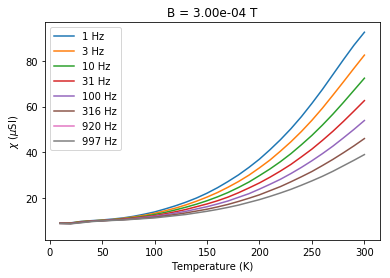

In [30]:
# plot chi versus temperature at constant field
b=Bs.max()
for f in Fs:
    this_f=chi_data[chi_data.meas_freq==f]
    this_f=this_f[this_f.meas_field_ac==b]
    plt.plot(this_f.meas_temp,1e6*this_f.susc_chi_volume,label='%i'%(f)+' Hz')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('$\chi$ ($\mu$SI)')
plt.title('B = '+'%7.2e'%(b)+ ' T')

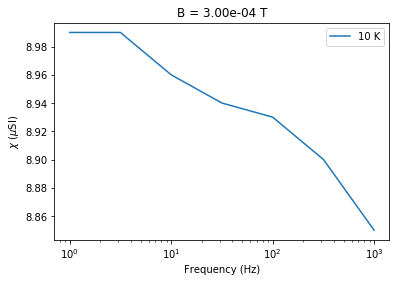

In [31]:
# plot chi versus frequency at constant B
b=Bs.max()
t=Ts.min()
this_t=chi_data[chi_data.meas_temp==t]
this_t=this_t[this_t.meas_field_ac==b]
plt.semilogx(this_t.meas_freq,1e6*this_t.susc_chi_volume,label='%i'%(t)+' K')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('$\chi$ ($\mu$SI)')
plt.title('B = '+'%7.2e'%(b)+ ' T');

 You can see the dependence on temperature, frequency and applied field. These data support the suggestion that there is a strong superparamagnetic component in these specimens.



## combine_magic

 [\[MagIC Database\]](https://earthref.org/MagIC)  [\[combine_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/combine_magic.py)
 
 MagIC tables have many columns only some of which are used in a particular instance. So combining files of the same type must be done carefully to ensure that the right data come under the right headings. The program **combine_magic.py** can be used to combine any number of MagIC files from a given type. 

This program reads in MagIC formatted files of a common type (e.g., sites.txt) and combines them into a single file, taking care that all the columns are preserved. For example, if there are both AF and thermal data from a study and we created a measurements.txt formatted file for each, we could use **combine_magic.py** to combine them together into a single measurements.txt file.    This kind of activity is taylor made for **Pandas**.  We can read in the two files, combine them with **pd.concat()** and write them back out to a magic format file. 

To do that, we use [**pmag.magic_write()**](#pmag.magic_write).  



Here we read in two MagIC formatted measurements.txt files into **Pandas** DataFrames and combine them together with **pd.concat()**.  **pmag.magic_write()** takes a list of dictionaries, which we can get from the pandas data frame with the 
**df.to_dict('records')** function.  

In [33]:
# read in the first file:
af_data=pd.read_csv('../combine_magic/af_measurements.txt',sep='\t',header=1)
# read in the second file
therm_data=pd.read_csv('../combine_magic/therm_measurements.txt',sep='\t',header=1)
# combine the two with pandas.concat function
all_data=pd.concat([af_data,therm_data])

pmag.magic_write('../combine_magic/measurements.txt',all_data.to_dict('records'),'measurements')


58  records written to file  ../combine_magic/measurements.txt


(True, '../combine_magic/measurements.txt')

## common_mean

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html#x15-15600012)  [\[common_mean.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/common_mean.py)

 Most paleomagnetists use some form of Fisher Statistics to decide if two directions are statistically distinct or not (see [Essentials Chapter 11](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html#x15-15600011) for a discussion of those techniques. But often directional data are not Fisher distributed and the parametric approach will give misleading answers. In these cases, one can use a boostrap approach, described in detail in [Essentials Chapter 12]. The program **common_mean.py** can be used for a bootstrap test for common mean to check whether two declination, inclination data sets have a common mean at the 95% level of confidence. The function **ipmag.common_mean_bootrap()**  does the same job as the command line program common_mean.py 
 
 We want to compare the two data sets: common_mean_ex_file1.dat and common_mean_ex_file2.dat. But first, let’s look at the data in equal area projection using the methods outline in the section on [eqarea](#eqarea).





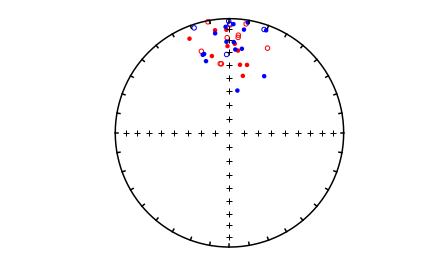

In [34]:
directions_A=np.loadtxt('../common_mean/common_mean_ex_file1.dat')
directions_B=np.loadtxt('../common_mean/common_mean_ex_file2.dat') 
ipmag.plot_net(1)
ipmag.plot_di(di_block=directions_A,color='red')
ipmag.plot_di(di_block=directions_B,color='blue')


Now let’s look at the common mean problem using **ipmag.common_mean_bootstrap()**.

In [219]:
help(ipmag.common_mean_bootstrap)

Help on function common_mean_bootstrap in module pmagpy.ipmag:

common_mean_bootstrap(Data1, Data2, NumSims=1000, save=False, save_folder='.', fmt='svg', figsize=(7, 2.3), x_tick_bins=4)
    Conduct a bootstrap test (Tauxe, 2010) for a common mean on two declination,
    inclination data sets. Plots are generated of the cumulative distributions
    of the Cartesian coordinates of the means of the pseudo-samples (one for x,
    one for y and one for z). If the 95 percent confidence bounds for each
    component overlap, the two directions are not significantly different.
    
    Parameters
    ----------
    Data1 : a nested list of directional data [dec,inc] (a di_block)
    Data2 : a nested list of directional data [dec,inc] (a di_block)
    NumSims : number of bootstrap samples (default is 1000)
    save : optional save of plots (default is False)
    save_folder : path to directory where plots should be saved
    fmt : format of figures to be saved (default is 'svg')
    figsize : 

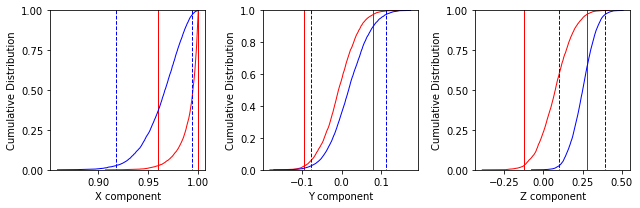

In [64]:
ipmag.common_mean_bootstrap(directions_A,directions_B,figsize=(9,3))

 These suggest that the two data sets share a common mean.

Now compare the data in common_mean_ex_file1.dat with the expected direction at the 5$^{\circ}$ N latitude that these data were collected (Dec=0, Inc=9.9).

To do this, we set the second data set to be the desired direction for comparison. 



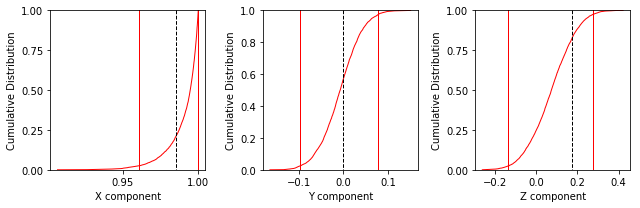

In [84]:
reload(ipmag)
comp_dir=[0,9.9]
ipmag.common_mean_bootstrap(directions_A,comp_dir,figsize=(9,3))

Apparently the data (cumulative distribution functions) are entirely consistent with the expected direction (dashed lines are the cartesian coordinates of that). 

## cont_rot 

[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html#x15-15600016)  [\[cont_rot.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/cont_rot.py)

We could use the program **cont_rot.py** to make an orthographic projection with latitude = -20$^{\circ}$ and longitude = 0$^{\circ}$ at the center of the African and South American continents reconstructed to 180 Ma using the Torsvik et al. (2008, doi: 10.1029/2007RG000227) poles of finite rotation. We would do this by first holding Africa fixed. 

The **cont_rot.py** program reads in the outlines of continents from **continents.get_cont()**, rotates around a rotation pole and angle as specified by the age  and continent in question (from **frp.get_pole()** using **pmag.ptROT()**.  It then plots them using basemap in **pmagplotlib.plotMAP()** (or **pmagplotlib.plot_map** for cartopy version.  Here we will reproduce the functionality more directly through the notebook by just calling these functions.  

In [85]:
# load in the continents module
import pmagpy.continents as continents
import pmagpy.frp as frp
help(continents.get_continent)

Help on function get_continent in module pmagpy.continents:

get_continent(continent)
    get_continent(continent)
    returns the outlines of specified continent.
    
    Parameters:
    ____________________
    continent:
        af : Africa
        congo : Congo
        kala : Kalahari
        aus : Australia
        balt : Baltica
        eur : Eurasia
        ind : India
        sam : South America
        ant : Antarctica
        grn : Greenland
        lau : Laurentia
        nam : North America
        gond : Gondawanaland
    Returns : 
        array of [lat/long] points defining continent



In [86]:
help(pmagplotlib.plotMAP)

Help on function plotMAP in module pmagpy.pmagplotlib:

plotMAP(fignum, lats, lons, Opts)
    plotMAP(fignum, lats,lons,Opts)
    makes a basemap with lats/lons
        Windows 10 users, see plot_map
    Parameters:
    _______________
    fignum : matplotlib figure number
    lats : array or list of latitudes
    lons : array or list of longitudes
    Opts : dictionary of plotting options:
        Opts.keys=
            latmin : minimum latitude for plot
            latmax : maximum latitude for plot
            lonmin : minimum longitude for plot
            lonmax : maximum longitude
            lat_0 : central latitude
            lon_0 : central longitude
            proj : projection [basemap projections, e.g., moll=Mollweide, merc=Mercator, ortho=orthorhombic,
                lcc=Lambert Conformal]
            sym : matplotlib symbol
            symsize : symbol size in pts
            edge : markeredgecolor
            pltgrid : plot the grid [1,0]
            res :  resolution

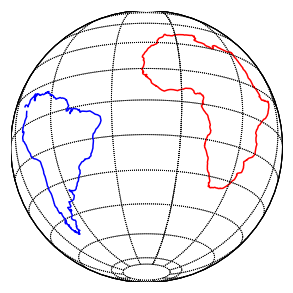

In [87]:
# retrieve continental outline
af=continents.get_continent('af').transpose()
sam=continents.get_continent('sam').transpose()


#define options for pmagplotlib.plotMAP
plt.figure(1,(5,5))
Opts = {'latmin': -90, 'latmax': 90, 'lonmin': 0., 'lonmax': 360., 'lat_0': -20, \
            'lon_0': 345,'proj': 'ortho', 'sym': 'r-', 'symsize': 3,\
            'pltgrid': 0, 'res': 'c', 'boundinglat': 0.}
pmagplotlib.plotMAP(1,af[0],af[1],Opts)
Opts['sym']='b-'
pmagplotlib.plotMAP(1,sam[0],sam[1],Opts)

Now for the rotation part.  These are in a function called **frp.get_pole()**

In [88]:
help(frp.get_pole)

Help on function get_pole in module pmagpy.frp:

get_pole(continent, age)
    returns rotation poles and angles for specified continents and ages
    assumes fixed Africa.  
    Parameters
    __________
        continent : 
            aus : Australia
            eur : Eurasia
            mad : Madacascar
            [nwaf,congo] : NW Africa  [choose one]
            col :  Colombia
            grn : Greenland
            nam : North America
            par : Paraguay
            eant :  East Antarctica
            ind : India
            [neaf,kala] : NE Africa [choose one]
            [sac,sam] :  South America [choose one]
            ib : Iberia
            saf : South Africa
      Returns
      _______
          [pole longitude, pole latitude, rotation angle] : for the continent at specified age



In [89]:
# get the rotation pole for south america relative to South Africa at 180 Ma
sam_pole=frp.get_pole('sam',180)
# NB: for african rotations, first rotate other continents to fixed Africa, then 
# rotate with South African pole (saf)


The rotation is done by **pmag.PTrot()**.

In [90]:
help(pmag.PTrot)

Help on function PTrot in module pmagpy.pmag:

PTrot(EP, Lats, Lons)
    Rotates points on a globe by an Euler pole rotation using method of
    Cox and Hart 1986, box 7-3.
    
    Parameters
    ----------
    EP : Euler pole list [lat,lon,angle]
    Lats : list of latitudes of points to be rotated
    Lons : list of longitudes of points to be rotated
    
    Returns
    _________
    RLats : rotated latitudes
    RLons : rotated longitudes



so here we go...  

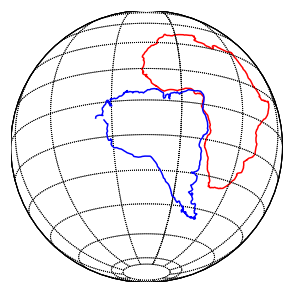

In [91]:
plt.figure(1,(5,5))
sam_rot=pmag.PTrot(sam_pole,sam[0],sam[1]) # same for south america
# and plot 'em
Opts['sym']='r-'
pmagplotlib.plotMAP(1,af[0],af[1],Opts)
Opts['sym']='b-'
pmagplotlib.plotMAP(1,sam_rot[0],sam_rot[1],Opts)

## core_depthplot

[\[Essentials Chapter 15\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch15.html#x15-15600015)  [\[core_depthplot.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/core_depthplot.py)

The program **core_depthplot.py** can be used to plot various measurement data versus sample depth. The data must be in the MagIC data format. The program will plot whole core data, discrete sample at a bulk demagnetization step, data from vector demagnetization experiments, and so on. 

We can try this out on some data from DSDP Hole 522, (drilled at 26S/5W) and measured by Tauxe and Hartl (1997, doi: 10.1111/j.1365-246X.1997.tb04082.x). These were  downloaded and unpacked in the [biplot_magic](#biplot_magic) example. More of the data are in the directory ../data_files/core_depthplot. 

 In this example, we will plot the alternating field (AF) data after the 15 mT step. The magnetizations will be plotted on a log scale and, as this is a record of the Oligocene, we will plot the Oligocene time scale, using the calibration of Gradstein et al. (2012), commonly referred to as “GTS12” for the the Oligocene. We are only interested in the data between 50 and 150 meters  and we are not interested in the declinations here. 


All this can be done using the wonders of Pandas data frames using the  data in the **data_files/core_depthplot** directory.   


Let's do things this way:
- read in the data from the sites and specimens files.
- Drop the records with NaN for analysts, keeping one of the three lines available for each specimen. 
- Make a new column named **site** in the specdimens table that is the same as the **specimen** column.
- (this makes sense because these are core data, so the specimen=sample=site. )
- Merge the two DataFrames on the **site** column.
- filter the data for depths between 50 and 150.
- Plot **dir_inc** versus **core_depth**.  
- Put on GAD field inclination
- plot the time scale

In [105]:
specimens=pd.read_csv('../core_depthplot/specimens.txt',sep='\t',header=1)
specimens=specimens.dropna(subset=['dir_inc']) # kill unwanted lines with duplicate or irrelevent info
specimens['site']=specimens['specimen'] # make a column with site name
data=pd.merge(specimens,sites,on='site') # merge the two data frames on site
data=data[data.core_depth>50] # all levels > 50
data=data[data.core_depth<150] # and < 150
lat=26 # we need this for the GAD INC


Plot versus core_depth

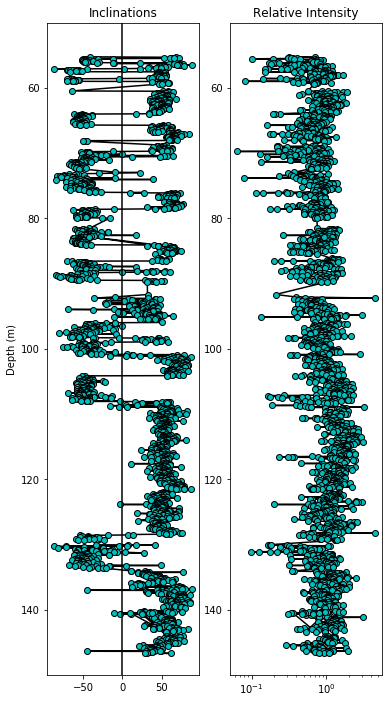

In [107]:
fig=plt.figure(1,(6,12)) # make the figure
ax=fig.add_subplot(121) # make the first of 2 subplots
plt.ylabel('Depth (m)') # label the Y axis
plt.plot(data.dir_inc,data.core_depth,'k-') # draw on a black line through the data
# draw the data points as cyan dots with black edges
plt.plot(data.dir_inc,data.core_depth,'co',markeredgecolor='black')
plt.title('Inclinations') # put on a title
plt.axvline(0,color='black')# make a central line at inc=0
plt.ylim(150,50) # set the plot Y limits to the desired depths
fig.add_subplot(122) # make the second of two subplots
# plot intensity data on semi-log plot
plt.semilogx(data.int_rel/data.int_rel.mean(),data.core_depth,'k-')
plt.semilogx(data.int_rel/data.int_rel.mean(),\
             data.core_depth,'co',markeredgecolor='black')
plt.ylim(150,50)
plt.title('Relative Intensity');


And now versus age:

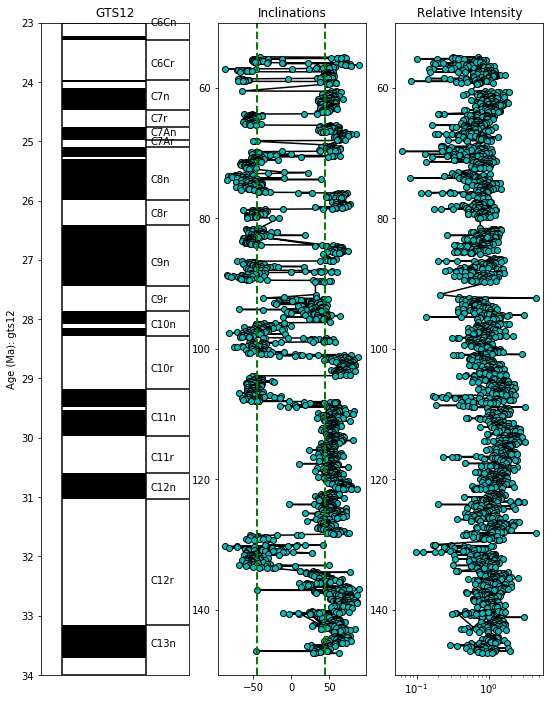

In [109]:
fig=plt.figure(1,(9,12)) # make the figure
ax=fig.add_subplot(131) # make the first of three subplots
pmagplotlib.plot_ts(ax,23,34,timescale='gts12') # plot on the time scale
fig.add_subplot(132) # make the second of three subplots
plt.plot(data.dir_inc,data.core_depth,'k-')
plt.plot(data.dir_inc,data.core_depth,'co',markeredgecolor='black')
plt.ylim(35,23)
# calculate the geocentric axial dipole field for the site latitude
gad=np.degrees(np.arctan(2.*np.tan(np.radians(lat)))) # tan (I) = 2 tan (lat)
# put it on the plot as a green dashed line
plt.axvline(gad,color='green',linestyle='dashed',linewidth=2)
plt.axvline(-gad,color='green',linestyle='dashed',linewidth=2)
plt.title('Inclinations')
plt.ylim(150,50)
fig.add_subplot(133) # make the third of three plots
# plot the intensity data on semi-log plot
plt.semilogx(data.int_rel/data.int_rel.mean(),data.core_depth,'k-')
plt.semilogx(data.int_rel/data.int_rel.mean(),data.core_depth,'co',markeredgecolor='black')
plt.ylim(150,50)
plt.title('Relative Intensity');


## curie 

[\[Essentials Chapter 6\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch6.html#x15-1560006)  [\[curie.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/curie.py)


Curie Temperature experiments, saved in MagIC formatted files, can be plotted with the program **curie.py**.  We can do this in the notebook using **ipmag.curie()**.

In [110]:
help(ipmag.curie)

Help on function curie in module pmagpy.ipmag:

curie(path_to_file='.', file_name='magic_measurements.txt', window_length=3, save=False, save_folder='.', fmt='svg', t_begin='', t_end='')
    Plots and interprets curie temperature data.
    ***
    The 1st derivative is calculated from smoothed M-T curve (convolution
    with trianfular window with width= <-w> degrees)
    ***
    The 2nd derivative is calculated from smoothed 1st derivative curve
    (using the same sliding window width)
    ***
    The estimated curie temp. is the maximum of the 2nd derivative.
    Temperature steps should be in multiples of 1.0 degrees.
    
    Optional Parameters (defaults are used if not specified)
    ----------
    path_to_file : path to directory that contains file (default is current directory, '.')
    file_name : name of file to be opened (default is 'magic_measurements.txt')
    window_length : dimension of smoothing window (input to smooth() function)
    save : boolean argument to save pl

second derivative maximum is at T=552


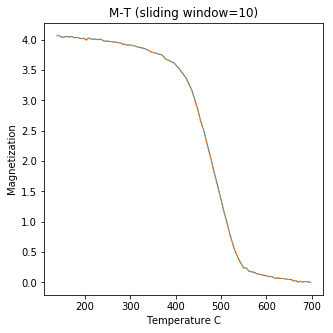

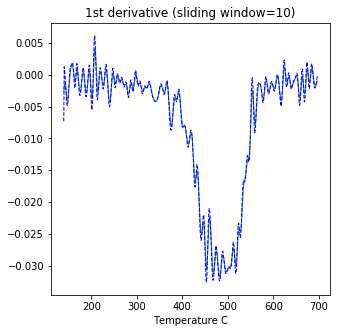

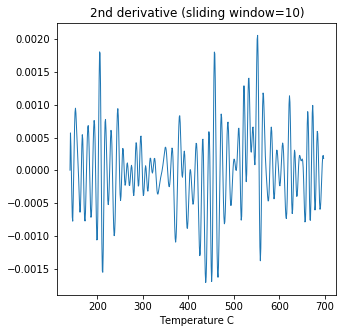

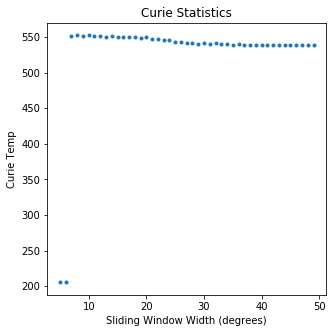

In [111]:
ipmag.curie(path_to_file='../curie',file_name='curie_example.dat',\
           window_length=10)

## dayplot_magic

[\[Essentials Chapter 5\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch5.html#x15-1560005)  [\[dayplot_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/dayplot_magic.py)

The program **dayplot_magic.py** would   make Day (Day et al., 1977), or Squareness-Coercivity and Squareness-Coercivity of Remanence plots (e.g., Tauxe et al., 2002) from the MagIC formatted data.
This program can be replicated in the notebook with **ipmag.dayplot()**.

In [112]:
help(ipmag.dayplot)

Help on function dayplot in module pmagpy.ipmag:

dayplot(path_to_file='.', hyst_file='specimens.txt', rem_file='', save=False, save_folder='.', fmt='pdf', data_model=3)
    Makes 'day plots' (Day et al. 1977) and squareness/coercivity plots
    (Neel, 1955; plots after Tauxe et al., 2002); plots 'linear mixing'
    curve from Dunlop and Carter-Stiglitz (2006).
    
    Optional Parameters (defaults are used if not specified)
    ----------
    path_to_file : path to directory that contains files (default is current directory, '.')
    the default input file is 'specimens.txt' (data_model=3
    if data_model = 2, then must these are the defaults:
        hyst_file : hysteresis file (default is 'rmag_hysteresis.txt')
        rem_file : remanence file (default is 'rmag_remanence.txt')
    save : boolean argument to save plots (default is False)
    save_folder : relative directory where plots will be saved (default is current directory, '.')
    fmt : format of saved figures (default is 

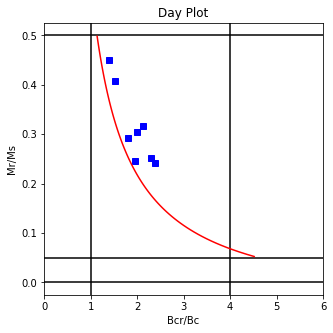

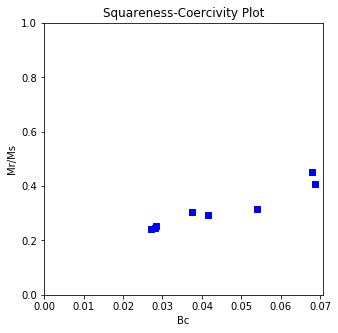

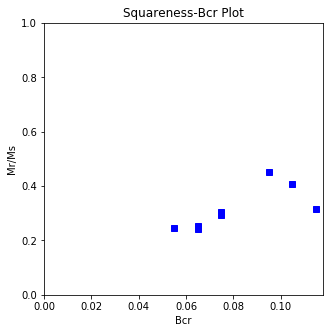

In [117]:
ipmag.dayplot(path_to_file='../dayplot_magic',hyst_file='dayplot_magic_example.dat',\
             data_model=2)

## di_eq

[\[Essentials Appendix B\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap2.html#equal_area) 
[\[di_eq.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/di_eq.py)

Paleomagnetic data are frequently plotted in equal area projection. PmagPy has several plotting programs which do this (e.g., [**eqarea.py**](#eqarea), but occasionally it is handy to be able to convert the directions to X,Y coordinates directly, without plotting them at all.  Here is an example transcript of a session using the datafile di_eq_example.dat: 

The program **di_eq.py**  program calls **pmag.dimap()** which we can do from within a Jupyter notebook.

In [235]:
help(pmag.dimap)

Help on function dimap in module pmagpy.pmag:

dimap(D, I)
    Function to map directions  to x,y pairs in equal area projection
    
    Parameters
    ----------
    D : declination (as float)
    I : inclination (as float)
    
    Returns
    -------
    XY : x, y values of directions for equal area projection [x,y]



In [236]:
DIs=np.loadtxt('../di_eq/di_eq_example.dat').transpose() # load in the data
print (pmag.dimap(DIs[0],DIs[1])) # call the function

[[-0.23941025 -0.8934912 ]
 [ 0.43641303  0.71216134]
 [ 0.06384422  0.76030049]
 [ 0.32144709  0.68621606]
 [ 0.32271993  0.67056248]
 [ 0.40741223  0.54065429]
 [ 0.5801562   0.34037562]
 [ 0.10535089  0.65772758]
 [ 0.24717308  0.59968683]
 [ 0.18234908  0.61560016]
 [ 0.17481507  0.60171742]
 [ 0.282746    0.54547233]
 [ 0.26486315  0.53827299]
 [ 0.23575838  0.5345358 ]
 [ 0.29066509  0.50548208]
 [ 0.26062905  0.51151332]
 [ 0.23208983  0.51642328]
 [ 0.24444839  0.50566578]
 [ 0.27792652  0.46438138]
 [ 0.2505103   0.47715181]
 [ 0.29177004  0.44081644]
 [ 0.10876949  0.51614821]
 [ 0.19670646  0.48201446]
 [ 0.34938995  0.38129223]
 [ 0.1684068   0.47556614]
 [ 0.20628586  0.44644351]
 [ 0.17570082  0.45064929]
 [ 0.30110381  0.37853937]
 [ 0.20495497  0.42396971]
 [ 0.19975473  0.4225844 ]
 [ 0.34691999  0.30800998]
 [ 0.11902989  0.44114437]
 [ 0.23984794  0.37648585]
 [ 0.26952843  0.34250954]
 [ 0.08545091  0.42378931]
 [ 0.19222399  0.38723272]
 [ 0.17260777  0.39508358]
 

## di_geo

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html) 
and [Changing coordinate systems](http://earthref.org/MAGIC/books/Tauxe/Essentials/WebBook3ap1.html#Changing_coordinate_systems)
[\[di_geo.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/di_geo.py)

Here we will   convert D = 8.1,I = 45.2 from specimen coordinates to geographic adjusted coordinates. The orientation of laboratory arrow on the specimen was: azimuth = 347; plunge = 27. **di_geo.py**  calls **pmag.dogeo()**. There is also **pmag.dogeo_V** for arrays of data. 

So let's start with **pmag.dogeo()**.

In [118]:
help(pmag.dogeo)

Help on function dogeo in module pmagpy.pmag:

dogeo(dec, inc, az, pl)
    Rotates declination and inclination into geographic coordinates using the
    azimuth and plunge of the X direction (lab arrow) of a specimen.
    
    Parameters
    ----------
    dec : declination in specimen coordinates
    inc : inclination in specimen coordinates
    
    Returns
    -------
    rotated_direction : tuple of declination, inclination in geographic coordinates
    
    Examples
    --------
    >>> pmag.dogeo(0.0,90.0,0.0,45.5)
    (180.0, 44.5)



In [238]:
pmag.dogeo(dec=81,inc=45.2,az=347,pl=27)

(94.835485413375622, 43.021684901096322)

Now let's check out the version that takes many data points at once. 

In [119]:
help(pmag.dogeo_V)

Help on function dogeo_V in module pmagpy.pmag:

dogeo_V(indat)
    Rotates declination and inclination into geographic coordinates using the
    azimuth and plunge of the X direction (lab arrow) of a specimen.
    
    Parameters
    ----------
    indat: nested list of [dec, inc, az, pl] data
    
    Returns
    -------
    rotated_directions : arrays of Declinations and Inclinations



In [121]:
indata=np.loadtxt('../di_geo/di_geo_example.dat')
print (indata)

[[ 288.1   35.8   67.   -36. ]
 [ 256.8   22.5   84.   -81. ]
 [ 262.4   19.1   91.   -48. ]
 [ 258.6   19.6   89.   -61. ]
 [ 259.9   54.7   49.   -76. ]
 [ 279.1   27.9   62.   -41. ]
 [ 228.3  -47.5  141.   -84. ]
 [ 249.8   25.    60.   -82. ]
 [ 239.8  -33.9  108.   -91. ]
 [ 271.7   50.8   28.   -52. ]
 [ 266.8   67.1   16.   -67. ]
 [ 238.9   51.9   27.   -76. ]
 [ 238.9   55.3   17.   -90. ]
 [ 252.6   41.    43.   -73. ]
 [ 112.7   17.1  282.6  -78. ]
 [ 134.9   -8.9  234.   -56. ]
 [ 138.6   -1.1  244.6  -73. ]
 [  83.5   31.1  292.   -28. ]
 [ 151.1  -35.2  196.6  -69. ]
 [ 146.8  -14.5  217.   -51. ]
 [  13.8   35.   332.6  -44. ]
 [ 293.1    3.9   53.5  -25.5]
 [  99.5  -11.   243.6  -30. ]
 [ 267.8  -12.7   91.5  -49. ]
 [  47.    12.8  298.6  -28. ]
 [  45.8   -9.   297.   -33.5]
 [  81.7  -26.8  254.6  -51. ]
 [  79.7  -25.7  256.   -60. ]
 [  84.7  -20.9  256.6  -60. ]
 [ 303.3   66.7    3.6  -71.5]
 [ 104.6   32.2  297.  -100.5]
 [ 262.8   77.9  357.1  -87. ]
 [  63.3

Let's take a look at these data in equal area projection: (see [eqarea](#eqarea) for details)

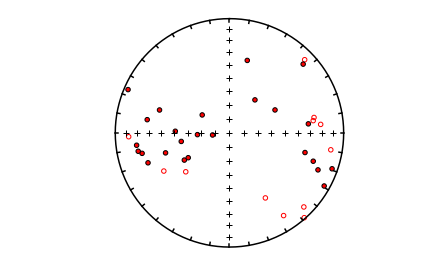

In [126]:
ipmag.plot_net(1)
ipmag.plot_di(dec=indata.transpose()[0],inc=indata.transpose()[1],color='red',edge='black')

The data are highly scattered and we hope that the geographic coordinate system looks better! To find out try: 

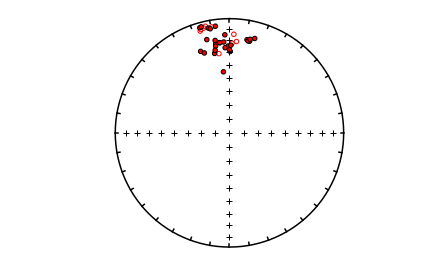

In [131]:
decs,incs=pmag.dogeo_V(indata)
ipmag.plot_net(1)
ipmag.plot_di(dec=decs,inc=incs,color='red',edge='black')

These data are clearly much better grouped. 

## di_rot 

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[di_rot.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/di_rot.py)


**di_rot.py**   rotates dec inc pairs to a new origen.  We can call **pmag.dodirot()** for single [dec,inc,Dbar,Ibar] data or **pmag.dodirot_V()** for an array of Dec, Inc pairs.  We can use the data from the [di_geo](#di_geo) example and rotate the geographic coordinate data such that the center of the distribution is the principal direction.   

We do it like this: 
- read in a data set with dec inc pairs
- make an equal area projection of the data to remind us what they look like
- calculate the principal component with **pmag.doprinc())**
- rotate the data to the principal direction
- plot the rotated data in an equal area projection. 

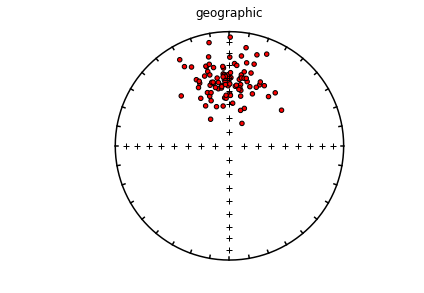

In [10]:
di_block=np.loadtxt('../di_rot/di_rot_example.txt') # read in some data
ipmag.plot_net(1) # make the plot
ipmag.plot_di(di_block=di_block,title='geographic',color='red',edge='black')

Now we calculate the principal direction using the method described inthe [goprinc](#goprinc) section.

In [5]:
princ=pmag.doprinc(di_block)

And note we use **pmag.dodirot_V** to do the rotation.  

In [6]:
help(pmag.dodirot_V)

Help on function dodirot_V in module pmagpy.pmag:

dodirot_V(di_block, Dbar, Ibar)
    Rotate an array of dec/inc pairs to coordinate system with Dec,Inc as 0,90
    
    Parameters
    ___________________
    di_block : array of [[Dec1,Inc1],[Dec2,Inc2],....]
    Dbar : declination of desired center
    Ibar : inclination of desired center
    
    Returns
    __________
    array of rotated decs and incs: [[rot_Dec1,rot_Inc1],[rot_Dec2,rot_Inc2],....]



In [7]:
rot_block=pmag.dodirot_V(di_block,princ['dec'],princ['inc'])
rot_block

array([[ 354.75645822,   85.48653154],
       [   7.99632503,   76.34238986],
       [ 218.59309456,   71.32523704],
       [ 256.72254094,   81.2757586 ],
       [  36.92916127,   71.27696636],
       [ 107.0627481 ,   74.65934147],
       [ 149.72796903,   84.48123415],
       [  98.10291566,   69.6463126 ],
       [ 348.29161295,   72.10250018],
       [ 285.08151847,   74.70297918],
       [ 273.35642946,   68.89864852],
       [ 330.28910824,   88.29039388],
       [ 280.73571259,   70.61791032],
       [   3.71124387,   76.1147856 ],
       [  42.78313341,   81.09119604],
       [ 264.92037462,   82.36734047],
       [ 228.29288415,   88.01160809],
       [  55.75081265,   80.3717505 ],
       [  43.32707637,   84.27753112],
       [ 271.79063108,   77.21159274],
       [ 104.84899776,   83.08877923],
       [ 139.82061837,   76.3993491 ],
       [ 228.41478454,   68.21812033],
       [ 184.94964644,   85.8780573 ],
       [ 290.12100275,   80.82170974],
       [ 164.81453236,   

And of course look at what we have done!

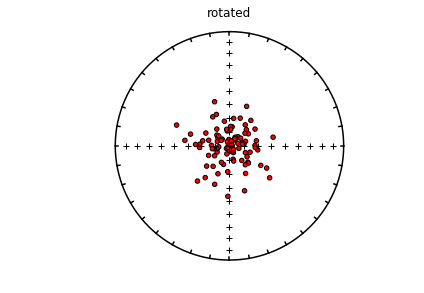

In [9]:
ipmag.plot_net(1) # make the plot
ipmag.plot_di(di_block=rot_block,color='red',title='rotated',edge='black')

## di_tilt

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html) 
and [Changing coordinate systems](http://earthref.org/MAGIC/books/Tauxe/Essentials/WebBook3ap1.html#Changing_coordinate_systems)
[\[di_tilt.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/di_tilt.py)

**di_tilt.py** can rotate a direction of Declination = 5.3 and Inclination = 71.6 to “stratigraphic” coordinates, assuming the  strike was 135 and the dip was 21. The convention in this program is to use the dip direction, which is to the “right” of this strike. 

We can perform the same thing as this program by calling  **pmag.dotilt** or **pmag.dotilt_V()** depending on if we have a single point or an array to rotate.

In [139]:
help(pmag.dotilt)

Help on function dotilt in module pmagpy.pmag:

dotilt(dec, inc, bed_az, bed_dip)
    Does a tilt correction on a direction (dec,inc) using bedding dip direction
    and bedding dip.
    
    Parameters
    ----------
    dec : declination directions in degrees
    inc : inclination direction in degrees
    bed_az : bedding dip direction
    bed_dip : bedding dip
    
    Returns
    -------
    dec,inc : a tuple of rotated dec, inc values
    
    Examples
    -------
    >>> pmag.dotilt(91.2,43.1,90.0,20.0)
    (90.952568837153436, 23.103411670066617)



In [140]:
help(pmag.dotilt_V)

Help on function dotilt_V in module pmagpy.pmag:

dotilt_V(indat)
    Does a tilt correction on an array with rows of dec,inc bedding dip direction and dip.
    
    Parameters
    ----------
    input : declination, inclination, bedding dip direction and bedding dip
    nested array of [[dec1, inc1, bed_az1, bed_dip1],[dec2,inc2,bed_az2,bed_dip2]...]
    
    Returns
    -------
    dec,inc : arrays of rotated declination, inclination



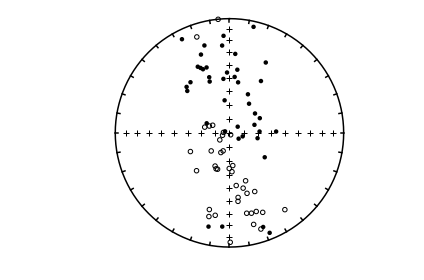

In [141]:
# read in some data
data=np.loadtxt('../di_tilt/di_tilt_example.dat') # load up the data
di_block=data[:,[0,1]] # let's look at the data first! 
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block)

Now we can rotate them

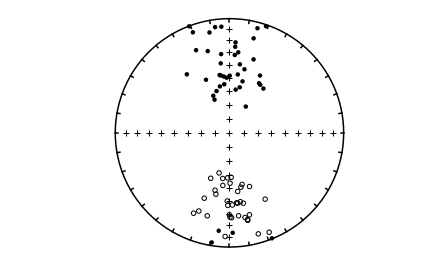

In [142]:
Dt,It=pmag.dotilt_V(data) # rotate them
ipmag.plot_net(1) # and take another look
ipmag.plot_di(dec=Dt,inc=It)

Use the handy function **np.column_stack** to pair the decs and incs together

In [143]:
np.column_stack((Dt,It)) # if you want to see the output: 

array([[  3.74524673e+01,   4.95794971e+01],
       [  3.36467520e+02,   6.09447203e+01],
       [  3.38016562e+02,   2.29922937e+01],
       [  3.55656248e+02,   7.51556739e+00],
       [  8.17695697e+00,   5.86079487e+01],
       [  6.24312543e+00,   2.98149642e+01],
       [  3.57033733e+02,   5.00073921e+01],
       [  3.42811107e+02,   5.85702274e+01],
       [  3.39284414e+02,   3.48942163e-01],
       [  3.85757431e+00,   2.17049062e+01],
       [  3.54347623e+02,   4.89864710e+01],
       [  2.83925013e-01,   4.85556186e+01],
       [  3.35776430e+02,   6.39503873e+01],
       [  1.81481921e+01,   3.27972491e+01],
       [  3.53945383e+02,   3.12870301e+01],
       [  3.08201120e+01,   4.80808730e+01],
       [  2.80340193e+01,   4.25855265e+01],
       [  3.52849360e+02,   3.85903328e+01],
       [  3.51431548e+02,   4.79200709e+01],
       [  1.49895755e+01,   5.82971278e+00],
       [  2.01405693e+02,  -2.73644346e+01],
       [  1.94529222e+02,  -6.03000930e+01],
       [  

## di_vgp

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[di_vgp.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/di_vgp.py)


We use  program **di_vgp.py** to convert directions (declination,inclination) to Virtual Geomagnetic Pole positions.   This is the inverse of [**vgp_di**](#vgp_di). 
It calls **pmag.dia_vgp()** which we can do directly from within the notebook.

In [144]:
help(pmag.dia_vgp)

Help on function dia_vgp in module pmagpy.pmag:

dia_vgp(*args)
    Converts directional data (declination, inclination, alpha95) at a given
    location (Site latitude, Site longitude) to pole position (pole longitude,
    pole latitude, dp, dm)
    
    Parameters
    ----------
    Takes input as (Dec, Inc, a95, Site latitude, Site longitude)
    Input can be as individual values (5 parameters)
    or
    as a list of lists: [[Dec, Inc, a95, lat, lon],[Dec, Inc, a95, lat, lon]]
    
    Returns
    ----------
    if input is individual values for one pole the return is:
    pole longitude, pole latitude, dp, dm
    
    if input is list of lists the return is:
    list of pole longitudes, list of pole latitude, list of dp, list of dm



In [145]:
data=np.loadtxt('../di_vgp/di_vgp_example.dat') # read in some data
print (data)

[[  11.    63.    55.    13. ]
 [ 154.   -58.    45.5  -73. ]]


The data are almost in the correct format, but there is no a95 field, so that will have to be inserted (as zeros). 

In [254]:
a95=np.zeros(len(data))
a95

array([ 0.,  0.])

In [255]:
DIs=data.transpose()[0:2].transpose() # get the DIs
LatLons=data.transpose()[2:].transpose() # get the Lat Lons
newdata=np.column_stack((DIs,a95,LatLons)) # stitch them back together
print (newdata)

[[  11.    63.     0.    55.    13. ]
 [ 154.   -58.     0.    45.5  -73. ]]


In [256]:
vgps=np.array(pmag.dia_vgp(newdata)) # get a tuple with lat,lon,dp,dm, convert to array
print (vgps.transpose()) #  print out the vgps

[[ 154.65869784   77.3180885     0.            0.        ]
 [   6.62978666  -69.63701906    0.            0.        ]]


## dipole_pinc

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[dipole_pinc.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/dipole_pinc.py)

If we assume a geocentric axial dipole, we can calculate an expected inclination at a given latitude and that is what **dipole_pinc.py** does.   It calls **pmag.pinc()** and so will we to find the expected inclination at a paleolatitude of 24$^{\circ}$S! 


In [146]:
help(pmag.pinc)

Help on function pinc in module pmagpy.pmag:

pinc(lat)
    calculate paleoinclination from latitude using dipole formula: tan(I) = 2tan(lat)
    Parameters
    ________________
    
    lat : either a single value or an array of latitudes
    
    Returns
    -------
    
    array of inclinations



In [148]:
lat=-24
pmag.pinc(-24)

-41.683702035032219

## dipole_plat

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[dipole_plat.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/dipole_plat.py)

**dipole_plat.py** is similar to [dipole_pinc.py](#dipole_pinc) but calculates the paleolatitude from the inclination.  It calls **pmag.plat()** and so will we: 

In [11]:
help(pmag.plat)

Help on function plat in module pmagpy.pmag:

plat(inc)
    calculate paleolatitude from inclination using dipole formula: tan(I) = 2tan(lat)
    Parameters
    ________________
    
    inc : either a single value or an array of inclinations
    
    Returns
    -------
    
    array of latitudes



In [14]:
inc=42
pmag.plat(inc)

24.237370383549177

## dir_cart

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560002)  [\[dir_cart.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/dir_cart.py)

**dir_cart.py** converts directions (Declination, Inclination, Intensity) to cartesian coordinates (X,Y,Z).  It 
calls **pmag.dir2cart()** to do its dirty work,  which we can call directly from the notebook.

In [16]:
help(pmag.dir2cart)

Help on function dir2cart in module pmagpy.pmag:

dir2cart(d)
    Converts a list or array of vector directions in degrees (declination,
    inclination) to an array of the direction in cartesian coordinates (x,y,z)
    
    Parameters
    ----------
    d : list or array of [dec,inc] or [dec,inc,intensity]
    
    Returns
    -------
    cart : array of [x,y,z]
    
    Examples
    --------
    >>> pmag.dir2cart([200,40,1])
    array([-0.71984631, -0.26200263,  0.64278761])



Input: 
 [[ 0.3971 -0.1445  0.9063]
 [-0.5722  0.04   -0.8192]]
Output: 
  340.0    65.0 1.000e+00
  176.0   -55.0 1.000e+00


In [23]:
# read in data file from example file
dirs=np.loadtxt('../dir_cart/dir_cart_example.dat')
print ('Input: \n',dirs) # print out the cartesian coordinates
# print out the  results
carts = pmag.dir2cart(dirs)
print ("Output: ")
for c in carts:
    print ('%8.4e %8.4e %8.4e'%(c[0],c[1],c[2]))

Input: 
 [[  20.    46.     1.3]
 [ 175.   -24.     4.2]]
Output: 
8.4859e-01 3.0886e-01 9.3514e-01
-3.8223e+00 3.3441e-01 -1.7083e+00


## dmag_magic

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html#x15-15600089) [\[MagIC Database\]](https://earthref.org/MagIC)  [\[dmag_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/dmag_magic.py)


We use **dmag_magic.py** to plot out the decay of all alternating field demagnetization experiments in MagIC  formatted files.   Here we can take a look at some of the data from   from Lawrence et al. (2009, doi: 10.1029/2008gc002072). 

This program calls **pmagplotlib.plotMT()** to plot the demagnetization curve for a sample, site, or entire data file interactively.  There is a version that will prepare dataframes for plotting with this function called **ipmag.plot_dmag()**. So let's try that: 

In [263]:
help(ipmag.plot_dmag)

Help on function plot_dmag in module pmagpy.ipmag:

plot_dmag(data='', title='', fignum=1, norm=1)
    plots demagenetization data versus step for all specimens in pandas dataframe datablock
    
    Parameters
    ______________
    data : Pandas dataframe with MagIC data model 3 columns:
        fignum : figure number
        specimen : specimen name
        demag_key : one of these: ['treat_temp','treat_ac_field','treat_mw_energy']
            selected using method_codes : ['LT_T-Z','LT-AF-Z','LT-M-Z'] respectively
        intensity  : one of these: ['magn_moment', 'magn_volume', 'magn_mass']
        quality : the quality column of the DataFrame
     title : title for plot
     norm : if True, normalize data to first step
    Output :
      matptlotlib plot



Read in data from a MagIC data model 3 file:

In [264]:
data=pd.read_csv('../dmag_magic/measurements.txt',sep='\t',header=1)
data.columns

Index(['experiment', 'specimen', 'measurement', 'dir_csd', 'dir_dec',
       'dir_inc', 'hyst_charging_mode', 'hyst_loop', 'hyst_sweep_rate',
       'treat_ac_field', 'treat_ac_field_dc_off', 'treat_ac_field_dc_on',
       'treat_ac_field_decay_rate', 'treat_dc_field', 'treat_dc_field_ac_off',
       'treat_dc_field_ac_on', 'treat_dc_field_decay_rate',
       'treat_dc_field_phi', 'treat_dc_field_theta', 'treat_mw_energy',
       'treat_mw_integral', 'treat_mw_power', 'treat_mw_time',
       'treat_step_num', 'treat_temp', 'treat_temp_dc_off', 'treat_temp_dc_on',
       'treat_temp_decay_rate', 'magn_mass', 'magn_moment', 'magn_volume',
       'citations', 'instrument_codes', 'method_codes', 'quality', 'standard',
       'meas_field_ac', 'meas_field_dc', 'meas_freq', 'meas_n_orient',
       'meas_orient_phi', 'meas_orient_theta', 'meas_pos_x', 'meas_pos_y',
       'meas_pos_z', 'meas_temp', 'meas_temp_change', 'analysts',
       'description', 'software_packages', 'timestamp', 'magn_r2

We could hunt through the magn_* columns to see what is non-blank, but this data file has magn_moment data in it. 
We can make the plots in this way: 
- select the AF demagnetization data with method_codes = 'LT-AF-Z'
- make a dataframe with these columns:
     'specimen','treat_ac_field','magn_moment',and 'quality'
- call ipmag.plot_dmag() to view the plot: 

In [265]:
df=data[data.method_codes.str.contains('LT-AF-Z')] # select the thermal demag data
df=df[['specimen','treat_ac_field','magn_moment','quality']]
#df=df[df.specimen.str.contains('mc01')]
df=df.dropna(subset=['treat_ac_field','magn_moment'])
df.head()

specimen  treat_ac_field  magn_moment quality
1    mc01f          0.0050     0.000028       g
2    mc01f          0.0075     0.000028       g
3    mc01f          0.0100     0.000027       g
4    mc01f          0.0125     0.000026       g
5    mc01f          0.0150     0.000025       g

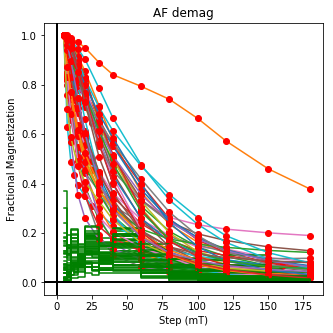

In [266]:
ipmag.plot_dmag(data=df,title="AF demag",fignum=1)

This plotted all the data in the file.  we could also plot the data by site:
- read in the specimens table to relate specimen to sample
- read in the sample table to relate sample to site
- merge the sample and site columns into the measurement table on the specimen column
- get a unique list of site names and walk through them one by one

In [267]:
spec_df=pd.read_csv('../dmag_magic/specimens.txt',sep='\t',header=1) # read in specimen table
samp_df=pd.read_csv('../dmag_magic/samples.txt',sep='\t',header=1) # read in sample table
spec_df=spec_df[['specimen','sample']] # trim specimen table to required columns
samp_df=samp_df[['sample','site']] # ditto sample table
df_ext=pd.merge(df,spec_df,how='inner',on='specimen') # merge sample to specimen name
df_ext=pd.merge(df_ext,samp_df,how='inner',on='sample') # merge site to sample name
df_ext.head() # see how we did

specimen  treat_ac_field  magn_moment quality sample  site
0    mc01f          0.0050     0.000028       g  mc01f  mc01
1    mc01f          0.0075     0.000028       g  mc01f  mc01
2    mc01f          0.0100     0.000027       g  mc01f  mc01
3    mc01f          0.0125     0.000026       g  mc01f  mc01
4    mc01f          0.0150     0.000025       g  mc01f  mc01

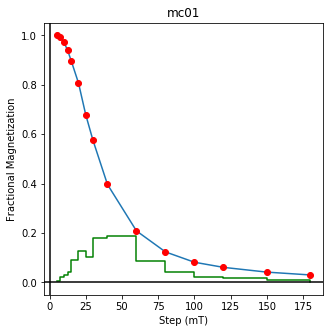

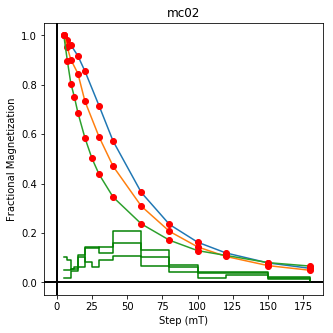

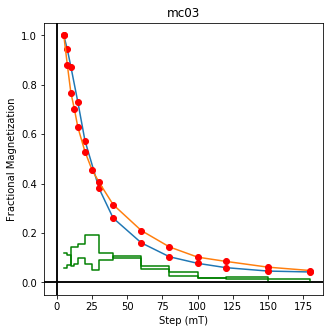

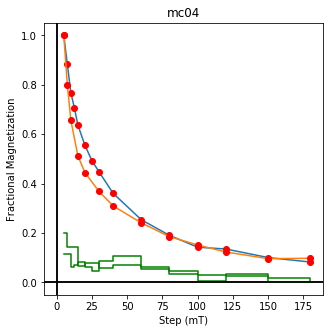

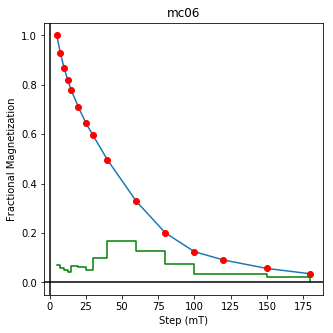

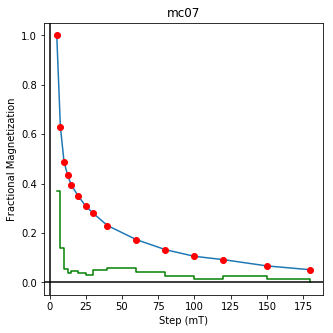

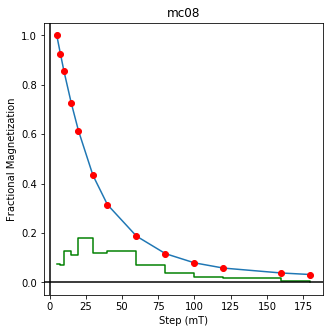

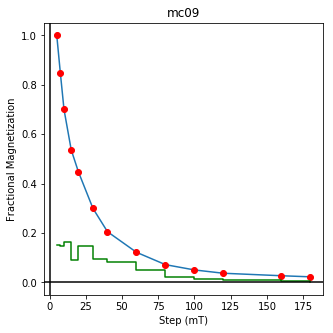

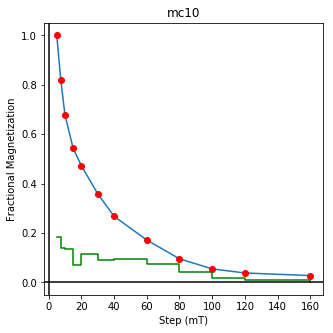

In [268]:
sites=df_ext.site.unique()
cnt=1
for site in sites:
    site_df=df_ext[df_ext.site==site] # fish out this site
    site_df=site_df[['specimen','treat_ac_field','magn_moment','quality']] # trim to essentials
    ipmag.plot_dmag(data=site_df,title=site,fignum=cnt)
    cnt+=1

We could repeat for thermal data if we felt like it using 'LT-T-Z' as the method_code key
and treat_temp as the step.  We could also save the plots using plt.savefig('FIGNAME.FMT') where FIGNAME could be the site, location, demag type as you wish.  

## download_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[download_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/download_magic.py)

 This program unpacks the .txt files downloaded from the MagIC database into individual text files. It has an option to also separate files for each location
 
 As an example, go to the MagIC data base at http://earthref.org/MAGIC/doi/10.1029/2003gc000661 and dowload the contribution.    Make a folder into which you should put the downloaded txt file called MagIC_download and move the file into it. Now use the program download_magic.py to unpack the .txt file (magic_contribution_15143.txt).

To do this within a notebook,  use the function **ipmag.download_magic()** for within the notebook use. 

In [269]:
help(ipmag.download_magic)

Help on function download_magic in module pmagpy.ipmag:

download_magic(infile, dir_path='.', input_dir_path='.', overwrite=False, print_progress=True, data_model=3.0, separate_locs=False)
    takes the name of a text file downloaded from the MagIC database and
    unpacks it into magic-formatted files. by default, download_magic assumes
    that you are doing everything in your current directory. if not, you may
    provide optional arguments dir_path (where you want the results to go) and
    input_dir_path (where the downloaded file is).
    
    Parameters
    ----------
    infile : str
        MagIC-format file to unpack
    dir_path : str
        output directory (default ".")
    input_dir : str
        input directory (default ".")
    overwrite: bool
        overwrite current directory (default False)
    print_progress: bool
        verbose output (default True)
    data_model : float
        MagIC data model 2.5 or 3 (default 3)
    separate_locs : bool
        create a sep

In [24]:
ipmag.download_magic(infile='magic_contribution_15143.txt',\
                     input_dir_path='../download_magic',dir_path='../download_magic')

working on:  'contribution'
1  records written to file  ../download_magic/contribution.txt
contribution  data put in  ../download_magic/contribution.txt
working on:  'locations'
3  records written to file  ../download_magic/locations.txt
locations  data put in  ../download_magic/locations.txt
working on:  'sites'
52  records written to file  ../download_magic/sites.txt
sites  data put in  ../download_magic/sites.txt
working on:  'samples'
437  records written to file  ../download_magic/samples.txt
samples  data put in  ../download_magic/samples.txt
working on:  'specimens'
226  records written to file  ../download_magic/specimens.txt
specimens  data put in  ../download_magic/specimens.txt
working on:  'measurements'
3072  records written to file  ../download_magic/measurements.txt
measurements  data put in  ../download_magic/measurements.txt
working on:  'criteria'
20  records written to file  ../download_magic/criteria.txt
criteria  data put in  ../download_magic/criteria.txt
working 

True

Let's test the download using [dmag_magic](#dmag_magic) as before, but this time with thermal demagnetization. 

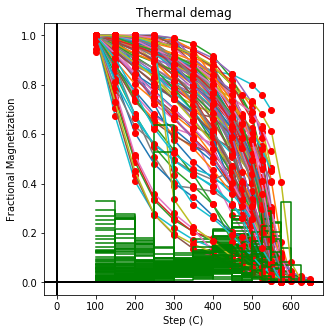

In [34]:
data=pd.read_csv('../download_magic/measurements.txt',sep='\t',header=1)
df=data[data.method_codes.str.contains('LT-T-Z')] # select the thermal demag data
df=df[['specimen','treat_temp','magn_moment','quality']]
#df=df[df.specimen.str.contains('mc01')]
df=df.dropna(subset=['treat_temp','magn_moment'])
ipmag.plot_dmag(data=df,title="Thermal demag",fignum=1)

## eigs_s

[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-156000813) [\[eigs_s.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/eigs_s.py)

This program converts eigenparameters to the six tensor elements.  
There is a function **ipmag.eigs_s()** which will do this in a notebook:

In [27]:
help(ipmag.eigs_s)

Help on function eigs_s in module pmagpy.ipmag:

eigs_s(infile='', dir_path='.')
    Converts eigenparamters format data to s format
    
    Parameters
    ___________________
    Input:
        file : input file name with eigenvalues (tau) and eigenvectors (V) with  format:
            tau_1 V1_dec V1_inc tau_2 V2_dec V2_inc tau_3 V3_dec V3_inc
    Output
         the six tensor elements as a nested array
          [[x11,x22,x33,x12,x23,x13],....]



In [33]:
Ss=ipmag.eigs_s(infile="eigs_s_example.dat", dir_path='../eigs_s')
for s in Ss:
    print (s)

[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]
[0.33555713, 0.33197427, 0.33246869, 0.00085685047, 0.00025266458, 0.00098150957]
[0.33585301, 0.33140355, 0.3327435, 0.0013230764, 0.0011778723, 4.5534102e-06]
[0.3347939, 0.33140817, 0.33379796, -0.00043088451, 0.0004885784, 0.00045610438]
[0.33502916, 0.33117944, 0.33379149, -0.00106313, 0.00029828132, 0.00035882858]
[0.33407047, 0.3322691, 0.33366045, -6.3844682e-06, 0.00098444615, 5.9963346e-05]
[0.33486328, 0.33215088, 0.33298591, -0.0003427944, 0.00038177703, 0.0002014497]
[0.33509853, 0.33195898, 0.33294258, 0.00076976098, 0.00056717254, 0.00011960149]


In [28]:
!eigs_s.py -f ../eigs_s/eigs_s_example.dat 

0.33416328 0.33280227 0.33303446 -0.00016631 0.00123163 0.00135521 
0.33555713 0.33197427 0.33246869 0.00085685 0.00025266 0.00098151 
0.33585301 0.33140355 0.33274350 0.00132308 0.00117787 0.00000455 
0.33479390 0.33140817 0.33379796 -0.00043088 0.00048858 0.00045610 
0.33502916 0.33117944 0.33379149 -0.00106313 0.00029828 0.00035883 
0.33407047 0.33226910 0.33366045 -0.00000638 0.00098445 0.00005996 
0.33486328 0.33215088 0.33298591 -0.00034279 0.00038178 0.00020145 
0.33509853 0.33195898 0.33294258 0.00076976 0.00056717 0.00011960 


## eq_di

[\[Essentials Appendix B\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap2.html#x21-227000B#x15-156000813) [\[eq_di.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/eq_di.py)

 Data are frequently published as equal area projections and not listed in data tables. These data can be digitized as x,y data (assuming the outer rim is unity) and converted to approximate directions with the program eq_di.py. To use this program, install a graph digitizer (GraphClick from http://www.arizona-software.ch/graphclick/ works on Macs).

Digitize the data from the equal area projection saved in the file eqarea.png in the eq_di directory. You should only work on one hemisphere at a time (upper or lower) and save each hemisphere in its own file. Then you can convert the X,Y data to approximate dec and inc data - the quality of the data depends on your care in digitizing and the quality of the figure that you are digitizing.

Here we will try this out on a datafile already prepared, which are the digitized data from the lower hemisphere of a plot.  You  check your work with [eqarea](#eqarea).  

To do this in a notebook, we can use **pmag.doeqdi()**.  

In [35]:
help(pmag.doeqdi)

Help on function doeqdi in module pmagpy.pmag:

doeqdi(x, y, UP=0)
    Takes digitized x,y, data and returns the dec,inc, assuming an
    equal area projection
    Parameters
    __________________
        x : array of digitized x from point on equal area projection
        y : array of  igitized y from point on equal area projection
        UP : if True, is an upper hemisphere projection
    Output :
        dec : declination
        inc : inclination



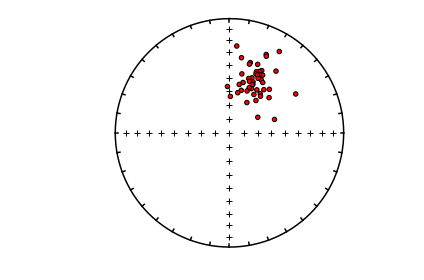

In [36]:
# read in the data into an array
# x is assumed first column, y, second
xy=np.loadtxt('../eq_di/eq_di_example.dat').transpose()
decs,incs=pmag.doeqdi(xy[0],xy[1])
ipmag.plot_net(1)
ipmag.plot_di(dec=decs,inc=incs,color='r',edge='black')

## eqarea

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-156000813)[\[Essentials Appendix B\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap2.html#x21-227000B#x15-156000813) [\[eqarea.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/eqarea.py)

The problem of plotting equal area projections in Jupyter notebooks was  
 solved by Nick Swanson-Hysell who started the **ipmag** module just for this purpose!  We use **ipmag.plot_net()** to plot the net, then **ipmag.plot_di()** to plot the directions.  

In [37]:
help(ipmag.plot_di)

Help on function plot_di in module pmagpy.ipmag:

plot_di(dec=None, inc=None, di_block=None, color='k', marker='o', markersize=20, legend='no', label='', title='', edge='')
    Plot declination, inclination data on an equal area plot.
    
    Before this function is called a plot needs to be initialized with code that looks
    something like:
    >fignum = 1
    >plt.figure(num=fignum,figsize=(10,10),dpi=160)
    >ipmag.plot_net(fignum)
    
    Required Parameters
    -----------
    dec : declination being plotted
    inc : inclination being plotted
    
    or
    
    di_block: a nested list of [dec,inc,1.0]
    (di_block can be provided instead of dec, inc in which case it will be used)
    
    Optional Parameters (defaults are used if not specified)
    -----------
    color : the default color is black. Other colors can be chosen (e.g. 'r')
    marker : the default marker is a circle ('o')
    markersize : default size is 20
    label : the default label is blank ('')
    leg

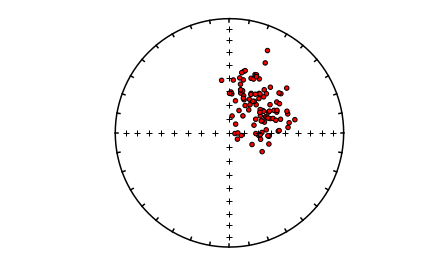

In [275]:
di_block=np.loadtxt('../eqarea/fishrot.out')
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')

## eqarea_ell

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html)
[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html)
[\[Essentials Appendix B\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap2.html#x21-227000B#x15-156000813) 
[\[eqarea_ell.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/eqarea_ell.py)



This programe makes  plots of eqarea area projections and confidence ellipses for dec,inc pairs
We make the equal area projects with the **ipmag.plot_net()** and **ipmag.plot_di()** functions.  The options in eqarea_ell are: 
    - Bingham mean and ellipse(s)
    - Fisher mean(s) and alpha_95(s)
    - Kent mean(s) - same as Fisher - and Kent ellipse(s)
    - Bootstrapped mean(s)  - same as Fisher - and ellipse(s) 
    - Bootstrapped eigenvectors
For Bingham mean, the N/R data are assumed antipodal and the procedure would be:
    - plot the data
    - calculate the bingham ellipse with **pmag.dobingham()**
    - plot the ellipse using **pmag.plot_di_mean_ellipse()**
All others, the data are not assumed antipodal, and must be separated into normal and reverse modes. To do that you can either use **pmag.separate_directions()** to calculate ellipses for each mode, OR use **pmag.flip()** to flip the reverse mode to the normal mode.  To calculate the ellipses: 
    - calculate the ellipses for each mode (or the flipped data set):
        - Kent: use **pmag.dokent()**, setting NN to the number of data points
        - Bootstrap : use **pmag.di_boot()** to generate the bootstrapped means
            - either just plot the eigenvectors (ipmag.plot_di()) OR
            - calcualate the bootstrapped ellipses with **pmag.dokent()** setting NN to 1
        - Parametric bootstrap : you need a pandas data frame with the site mean directions, n and kappa.  Then you can use **pmag.dir_df_boot()**.  
    - plot the ellipses if desired. 
    

In [38]:
#read in the data into an array
vectors=np.loadtxt('../eqarea_ell/tk03.out').transpose()
di_block=vectors[0:2].transpose() # decs are di_block[0], incs are di_block[1]
di_block

array([[ 182.7,  -64.7],
       [ 354.7,   62.8],
       [ 198.1,  -68.1],
       [ 344.8,   61.8],
       [ 194. ,  -56.5],
       [ 350. ,   56.1],
       [ 214.2,  -55.3],
       [ 344.9,   56.5],
       [ 172.6,  -70.7],
       [   3. ,   60.9],
       [ 155.2,  -60.2],
       [   8.4,   65.1],
       [ 183.5,  -56.5],
       [ 342.5,   56.1],
       [ 175.5,  -53.4],
       [ 338.9,   73.3],
       [ 169.8,  -56.9],
       [ 347.1,   45.9],
       [ 183.2,  -52.5],
       [  12.5,   57.5]])

### Bingham ellipses

In [39]:
help(pmag.dobingham)

Help on function dobingham in module pmagpy.pmag:

dobingham(di_block)
    Calculates the Bingham mean and associated statistical parameters from
    directions that are input as a di_block
    
    Parameters
    ----------
    di_block : a nested list of [dec,inc] or [dec,inc,intensity]
    
    Returns
    -------
    bpars : dictionary containing the Bingham mean and associated statistics
    dictionary keys
        dec : mean declination
        inc : mean inclination
        n : number of datapoints
        Eta : major ellipse
        Edec : declination of major ellipse axis
        Einc : inclination of major ellipse axis
        Zeta : minor ellipse
        Zdec : declination of minor ellipse axis
        Zinc : inclination of minor ellipse axis



In [40]:
help(ipmag.plot_di_mean_ellipse)

Help on function plot_di_mean_ellipse in module pmagpy.ipmag:

plot_di_mean_ellipse(dictionary, fignum=1, color='k', marker='o', markersize=20, label='', legend='no')
    Plot a mean direction (declination, inclination)  confidence ellipse.
    
    Parameters
    -----------
    dictionary : a dictionary generated by the pmag.dobingham or pmag.dokent funcitons



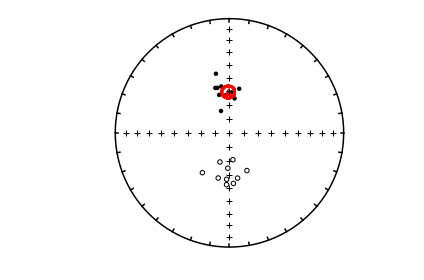

In [41]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block)
bpars=pmag.dobingham(di_block)
ipmag.plot_di_mean_ellipse(bpars,color='red',marker='^',markersize=50)

### Fisher mean, a95

In [42]:
help(pmag.separate_directions)

Help on function separate_directions in module pmagpy.pmag:

separate_directions(di_block)
    Separates set of directions into two modes based on principal direction
    
    Parameters
    _______________
    di_block : block of nested dec,inc pairs
    
    Return
    mode_1_block,mode_2_block :  two lists of nested dec,inc pairs



In [43]:
vectors=np.loadtxt('../eqarea_ell/tk03.out').transpose()
di_block=vectors[0:2].transpose() # decs are di_block[0], incs are di_block[1]
mode_1,mode_2=pmag.separate_directions(di_block)

In [44]:
help(ipmag.fisher_mean)

Help on function fisher_mean in module pmagpy.ipmag:

fisher_mean(dec=None, inc=None, di_block=None)
    Calculates the Fisher mean and associated parameters from either a list of
    declination values and a separate list of inclination values or from a
    di_block (a nested list a nested list of [dec,inc,1.0]). Returns a
    dictionary with the Fisher mean and statistical parameters.
    
    Parameters
    ----------
    dec : list of declinations or longitudes
    inc : list of inclinations or latitudes
    di_block : a nested list of [dec,inc,1.0]
        A di_block can be provided instead of dec, inc lists in which case it
        will be used. Either dec, inc lists or a di_block need to be provided.
    
    Returns
    -------
    fisher_mean : dictionary containing the Fisher mean parameters
    
    Examples
    --------
    Use lists of declination and inclination to calculate a Fisher mean:
    
    >>> ipmag.fisher_mean(dec=[140,127,142,136],inc=[21,23,19,22])
    {'alpha

In [45]:
mode_1_fpars=ipmag.fisher_mean(di_block=mode_1)
mode_2_fpars=ipmag.fisher_mean(di_block=mode_2)

In [46]:
help(ipmag.plot_di_mean)

Help on function plot_di_mean in module pmagpy.ipmag:

plot_di_mean(dec, inc, a95, color='k', marker='o', markersize=20, label='', legend='no')
    Plot a mean direction (declination, inclination) with alpha_95 ellipse on
    an equal area plot.
    
    Before this function is called, a plot needs to be initialized with code
    that looks something like:
    >fignum = 1
    >plt.figure(num=fignum,figsize=(10,10),dpi=160)
    >ipmag.plot_net(fignum)
    
    Required Parameters
    -----------
    dec : declination of mean being plotted
    inc : inclination of mean being plotted
    a95 : a95 confidence ellipse of mean being plotted
    
    Optional Parameters (defaults are used if not specified)
    -----------
    color : the default color is black. Other colors can be chosen (e.g. 'r').
    marker : the default is a circle. Other symbols can be chosen (e.g. 's').
    markersize : the default is 20. Other sizes can be chosen.
    label : the default is no label. Labels can be assi

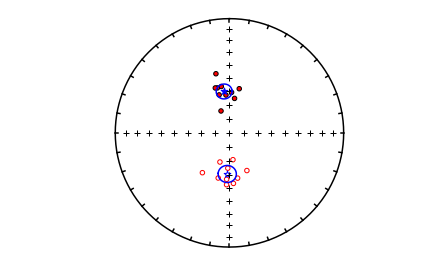

In [47]:
# plot the data
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')
# draw on the means and lpha95
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='blue',markersize=50)

ipmag.plot_di_mean(dec=mode_2_fpars['dec'],inc=mode_2_fpars['inc'],a95=mode_2_fpars['alpha95'],\
                  marker='*',color='blue',markersize=50)


### Kent mean and ellipse

In [48]:
help(pmag.dokent)

Help on function dokent in module pmagpy.pmag:

dokent(data, NN)
    gets Kent  parameters for data
    Parameters
    ___________________
    data :  nested pairs of [Dec,Inc]
    NN  : normalization
        NN is the number of data for Kent ellipse
        NN is 1 for Kent ellipses of bootstrapped mean directions
    
    Return
    kpars dictionary keys
        dec : mean declination
        inc : mean inclination
        n : number of datapoints
        Eta : major ellipse
        Edec : declination of major ellipse axis
        Einc : inclination of major ellipse axis
        Zeta : minor ellipse
        Zdec : declination of minor ellipse axis
        Zinc : inclination of minor ellipse axis



In [49]:
mode_1_kpars=pmag.dokent(mode_1,len(mode_1))
mode_2_kpars=pmag.dokent(mode_2,len(mode_2))

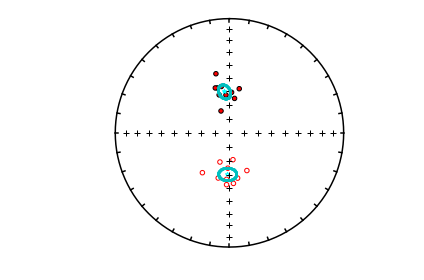

In [50]:
# plot the data
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')
# draw on the means and lpha95
ipmag.plot_di_mean_ellipse(mode_1_kpars,marker='*',color='cyan',markersize=20)
ipmag.plot_di_mean_ellipse(mode_2_kpars,marker='*',color='cyan',markersize=20)

### Bootstrap eigenvectors

In [51]:
help(pmag.di_boot)

Help on function di_boot in module pmagpy.pmag:

di_boot(DIs, nb=5000)
     returns bootstrap means  for Directional data
     Parameters
     _________________
     DIs : nested list of Dec,Inc pairs
     nb : number of bootstrap pseudosamples
    
     Returns
    -------
     BDIs:   nested list of bootstrapped mean Dec,Inc pairs



In [52]:
mode_1_BDIs=pmag.di_boot(mode_1)
mode_2_BDIs=pmag.di_boot(mode_2)

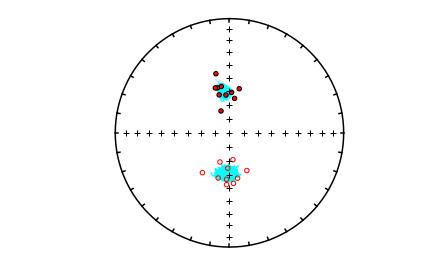

In [53]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=mode_1_BDIs,color='cyan',markersize=1)
ipmag.plot_di(di_block=mode_2_BDIs,color='cyan',markersize=1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')


### Boostrapped ellipses

In [54]:
mode_1_bpars=pmag.dokent(mode_1_BDIs,1)
mode_2_bpars=pmag.dokent(mode_2_BDIs,1)

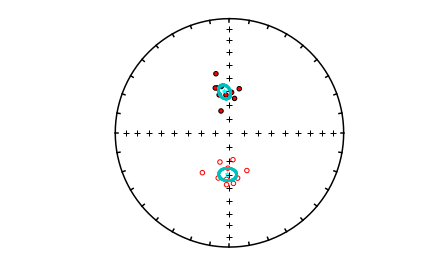

In [55]:
# plot the data
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')
# draw on the means and lpha95
ipmag.plot_di_mean_ellipse(mode_1_bpars,marker='*',color='cyan',markersize=20)
ipmag.plot_di_mean_ellipse(mode_2_bpars,marker='*',color='cyan',markersize=20)

## eqarea_magic

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560008) [\[MagIC Database\]](https://earthref.org/MagIC)  [\[eqarea_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/eqarea_magic.py)


**eqarea_magic.py** takes MagIC data model 3 files and makes equal area projections of declination, inclination data for a variety of  selections, 
i.e. all the data, by site, by sample, or by specimen
It has the option to plot in different coordinate systems (if available) and various ellipses.  It will also make a color contour plot if desired.  
We can reproduce most of this functionality with **ipmag.plot_net()** and **ipmag_plot_di()** using **Pandas** filtering capability.  

Let's start with a simple plot of site mean directions, assuming that they were interpreted from measurements using **pmag_gui.py** or some such program and have all the required meta-data.  

We want data in geographic coordinates (dir_tilt_correction=0).  The keys for directions are dir_dec and dir_inc.     One could add the ellipses using **ipmag.plot_di_mean_ellipse()**.  

### whole study


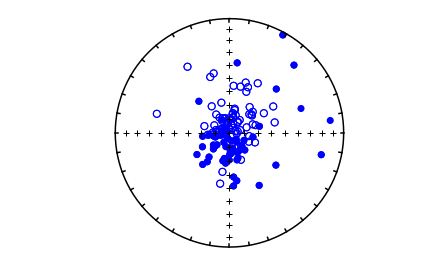

In [294]:
sites=pd.read_csv('../eqarea_magic/sites.txt',sep='\t',header=1)
site_dirs=sites[sites['dir_tilt_correction']==0]
ipmag.plot_net(1)
di_block=sites[['dir_dec','dir_inc']].values
#ipmag.plot_di(sites['dir_dec'].values,sites['dir_inc'].values,color='blue',markersize=50)
ipmag.plot_di(di_block=di_block,color='blue',markersize=50)

### whole study with color contour option
for this we can use the function **pmagplotlib.plotEQcont()** which makes a color contour of a dec, inc data

In [295]:
help(pmagplotlib.plotEQcont)

Help on function plotEQcont in module pmagpy.pmagplotlib:

plotEQcont(fignum, DIblock, color_map='coolwarm')
    plots dec inc block as a color contour
    Parameters
    __________________
    Input:
        fignum :  figure number
        DIblock : nested pairs of [Declination, Inclination]
        color_map : matplotlib color map [default is coolwarm]
    Output:
        figure



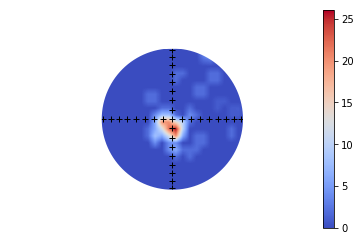

In [296]:
ipmag.plot_net(1)
pmagplotlib.plotEQcont(1,di_block)

### specimens by site
This study averaged specimens (not samples) by site, so we would like to make plots of all the specimen data for each site.   We can do things the in a similar way to what we did in the **dmag_magic** example.  
A few particulars:
- We will be plotting specimen interpetations in geographic coordinates (dir_tilt_correction=0)
- We need to look at the method codes as there might be fisher means, principal components, great circles, etc.  A complete list of method codes for Direction Estimation can be found here:  https://www2.earthref.org/MagIC/method-codes
- There might be 'bad' directions - 'result_quality'='b' as opposed to 'g'.  
- There are a lot of sites in this study, so let's just look at the first 10...   

In [297]:
# read in specimen table
spec_df=pd.read_csv('../eqarea_magic/specimens.txt',sep='\t',header=1) 
# read in sample table
samp_df=pd.read_csv('../eqarea_magic/samples.txt',sep='\t',header=1) 
# get only what we need from samples (sample to site mapping)
samp_df=samp_df[['sample','site']] 
# merge site to specimen name in the specimen data frame
df_ext=pd.merge(spec_df,samp_df,how='inner',on='sample') 
# truncate to the first 10 sites
sites=df_ext.site.unique()[0:11]

We need to filter specimen data for dir_tilt_correction=0
and separate into DE-BFP (best fit planes) and not.

In [298]:
# get the geographic coordinates
spec_df=df_ext[spec_df.dir_tilt_correction==0]
# filter to exclude planes
spec_lines=spec_df[spec_df.method_codes.str.contains('DE-BFP')==False]
# filter for planes
spec_df_gc=spec_df[spec_df.method_codes.str.contains('DE-BFP')==True]

In [299]:
# here's a new one:
help(ipmag.plot_gc)

Help on function plot_gc in module pmagpy.ipmag:

plot_gc(poles, color='g', fignum=1)
    plots a great circle on an equal area projection
    Parameters
    ____________________
    Input
       fignum : number of matplotlib object
       poles : nested list of [Dec,Inc] pairs of poles
       color : color of lower hemisphere dots for great circle - must be in form: 'g','r','y','k',etc.
               upper hemisphere is always cyan



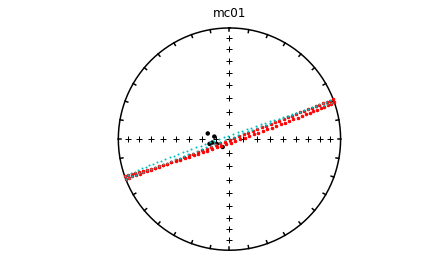

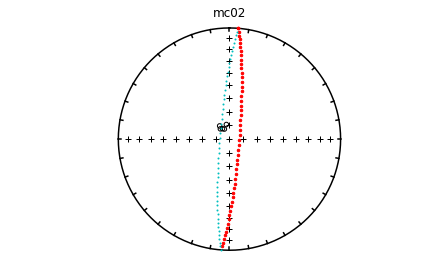

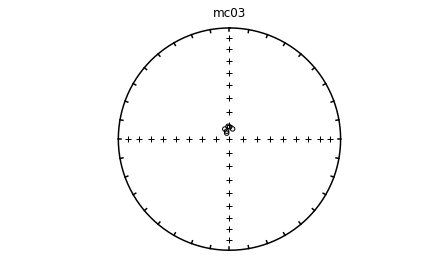

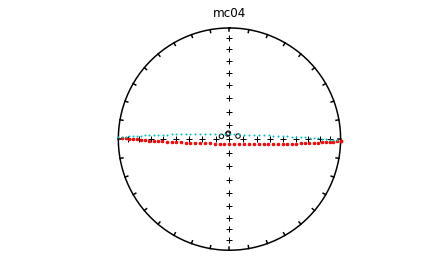

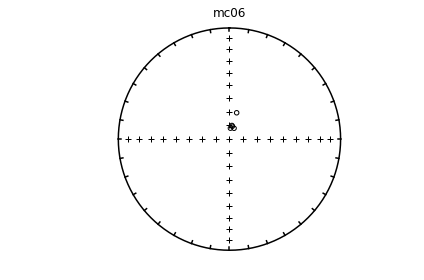

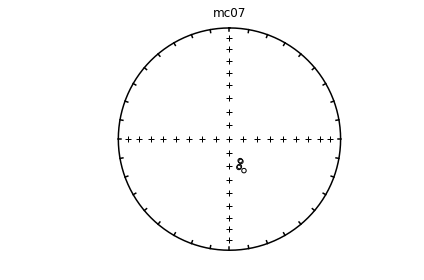

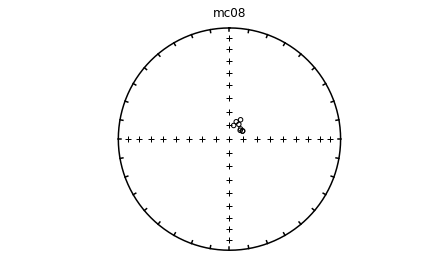

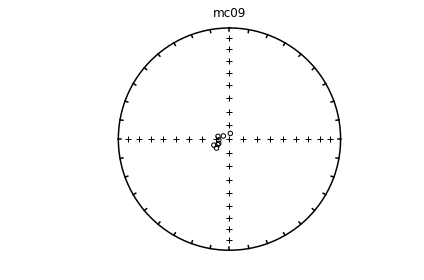

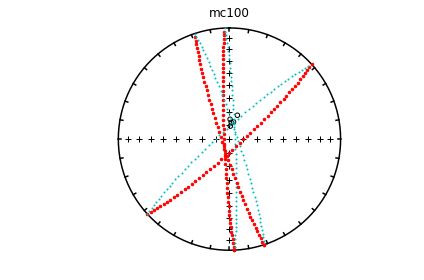

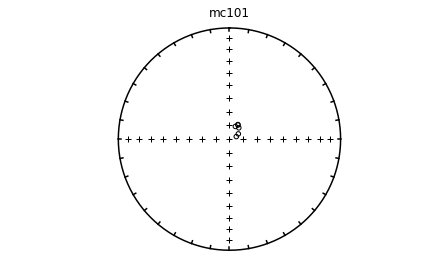

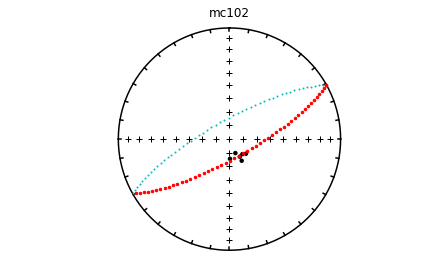

In [300]:
cnt=1
for site in sites:
    plt.figure(cnt)
    ipmag.plot_net(cnt)
    plt.title(site)
    site_lines=spec_lines[spec_lines.site==site] # fish out this site
    ipmag.plot_di(site_lines.dir_dec.values,site_lines.dir_inc.values)
    site_planes=spec_df_gc[spec_df_gc.site==site]
    poles=site_planes[['dir_dec','dir_inc']].values
    if poles.shape[0]>0:
        ipmag.plot_gc(poles,fignum=cnt,color='r')
    cnt+=1

### measurements by specimen

We can do this like this:

- read in the MagIC data model 3 measurements table into a **Pandas** data frame
- get a list of unique specimen names
- truncate this to the first 10 for this purpose
- plot the dir_dec and dir_inc fields by specimen


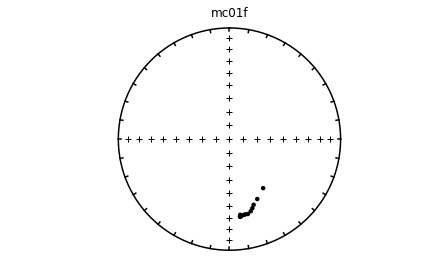

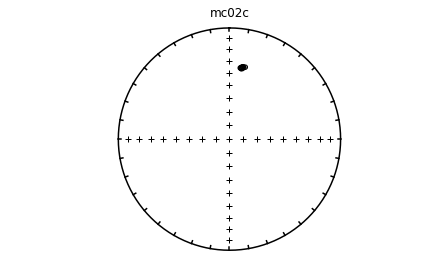

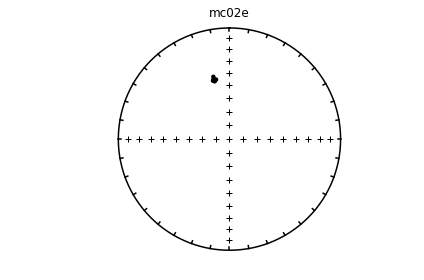

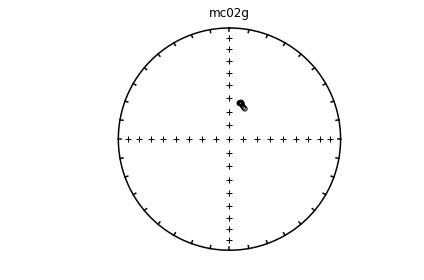

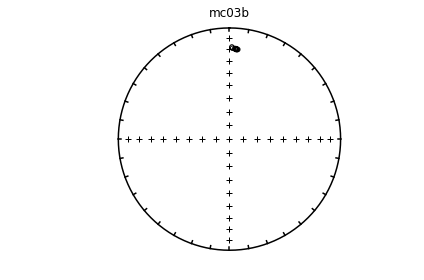

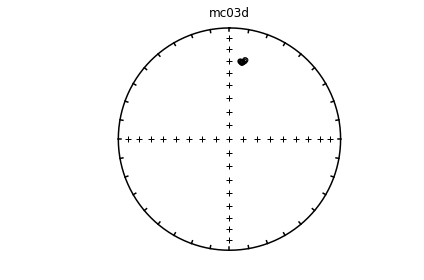

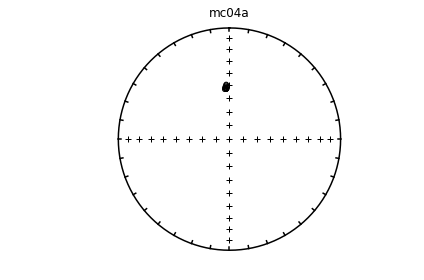

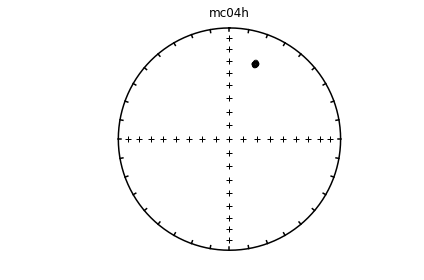

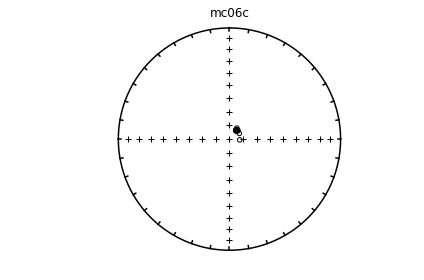

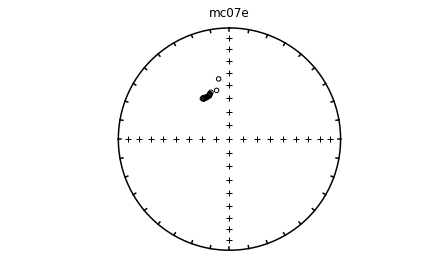

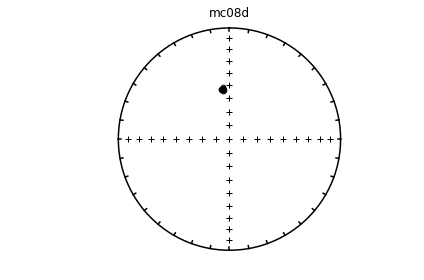

In [301]:
# read in measurements table
meas_df=pd.read_csv('../eqarea_magic/measurements.txt',sep='\t',header=1) 
specimens=meas_df.specimen.unique()[0:11]
cnt=1
for spec in specimens:
    meas_spc=meas_df[meas_df.specimen==spec]
    plt.figure(cnt)
    ipmag.plot_net(cnt)
    plt.title(spec)
    ipmag.plot_di(meas_spc.dir_dec.values,meas_spc.dir_inc.values)
    cnt+=1

## find_ei

[\[Essentials Chapter 14\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch14.html#x15-1560008) [\[MagIC Database\]](https://earthref.org/MagIC)  [\[find_ei.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/find_ei.py)

This program is meant to find the unflattening factor (see [unsquish](#unsquish) documentation) that brings a sedimentary data set into agreement with the statistical field model TK03 of Tauxe and Kent (2004, doi: 10.1029/145GM08).  It  has been implemented for notebooks as **ipmag.find_ei()**.


A data file (../find_EI/find_EI_example.dat) was prepared using the program **[tk03.py](#tk03)**  to simulate directions at a latitude of 42$^{\circ}$. with an expected inclination of 61$^{\circ}$ (which could be gotten using **[dipole_pinc](#dipole_pinc)** of course.  



In [302]:
help(ipmag.find_ei)

Help on function find_ei in module pmagpy.ipmag:

find_ei(data, nb=1000, save=False, save_folder='.', fmt='svg', site_correction=False, return_new_dirs=False)
    Applies series of assumed flattening factor and "unsquishes" inclinations assuming tangent function.
    Finds flattening factor that gives elongation/inclination pair consistent with TK03;
    or, if correcting by site instead of for study-level secular variation,
    finds flattening factor that minimizes elongation and most resembles a
    Fisherian distribution.
    Finds bootstrap confidence bounds
    
    Required Parameter
    -----------
    data: a nested list of dec/inc pairs
    
    Optional Parameters (defaults are used unless specified)
    -----------
    nb: number of bootstrapped pseudo-samples (default is 1000)
    save: Boolean argument to save plots (default is False)
    save_folder: path to folder in which plots should be saved (default is current directory)
    fmt: specify format of saved plots (defau

Bootstrapping.... be patient

The original inclination was: 38.9290449093

The corrected inclination is: 58.8324603221
with bootstrapped confidence bounds of: 48.166301591 to 66.6473634468
and elongation parameter of: 1.46786548594
The flattening factor is: 0.425


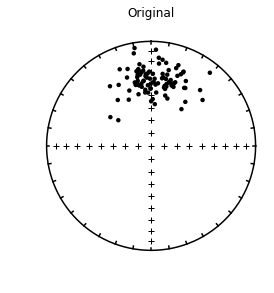

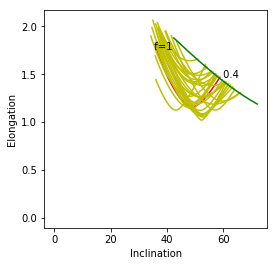

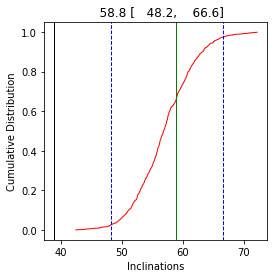

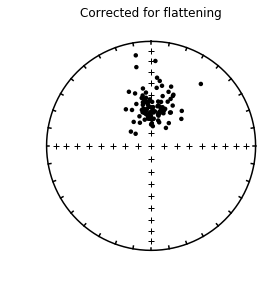

In [303]:
data=np.loadtxt('../find_EI/find_EI_example.dat')
ipmag.find_ei(data)

In this example, the original expected inclination at paleolatitude of 42 (61$^{\circ}$) is recovered within the 95% confidence bounds.



## fisher

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[fisher.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/fisher.py)

**fisher.py**  draws $N$  directions  from a Fisher distribution with specified $\kappa$ and a vertical mean. (For other directions see [fishrot](#fishrot)).  For doing this in a notebook, we can just call the function **pmag.fshdev()** $N$ times.

In [6]:
help(pmag.fshdev)

Help on function fshdev in module pmagpy.pmag:

fshdev(k)
    Generate a random draw from a Fisher distribution with mean declination
    of 0 and inclination of 90 with a specified kappa.
    
    Parameters
    ----------
    k : kappa (precision parameter) of the distribution
    
    Returns
    ----------
    dec, inc : declination and inclination of random Fisher distribution draw



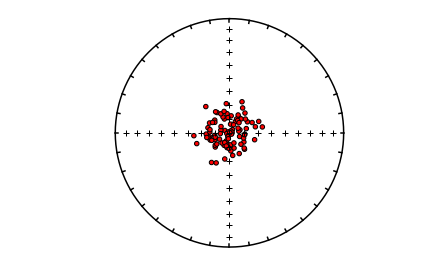

In [7]:
# set the number, N, and kappa
N,kappa=100,20
# a basket to put our fish in
fish=[]
# get the Fisherian deviates
for i in range(N):
    d,i=pmag.fshdev(kappa)
    fish.append([d,i])
ipmag.plot_net(1)
ipmag.plot_di(di_block=fish,color='r',edge='black')

## fishqq

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[fishqq.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/fishqq.py)

This program was meant to test whether a given directional data set is Fisher distributed using a Quantile-Quantile plot (see also [qqunf](#qqunf) or [qqplot](#qqplot) for more on Quantile-Quantile plots).  

Blessedly, **fishqq** has been incorporated into **ipmag.fishqq()** for use within notebooks.  

In [306]:
help(ipmag.fishqq)

Help on function fishqq in module pmagpy.ipmag:

fishqq(lon=None, lat=None, di_block=None)
    Test whether a distribution is Fisherian and make a corresponding Q-Q plot.
    The Q-Q plot shows the data plotted against the value expected from a
    Fisher distribution. The first plot is the uniform plot which is the
    Fisher model distribution in terms of longitude (declination). The second
    plot is the exponential plot which is the Fisher model distribution in terms
    of latitude (inclination). In addition to the plots, the test statistics Mu
    (uniform) and Me (exponential) are calculated and compared against the
    critical test values. If Mu or Me are too large in comparision to the test
    statistics, the hypothesis that the distribution is Fisherian is rejected
    (see Fisher et al., 1987).
    
    Parameters:
    -----------
    lon : longitude or declination of the data
    lat : latitude or inclination of the data
        or
    di_block: a nested list of [dec,inc

consistent with Fisherian model


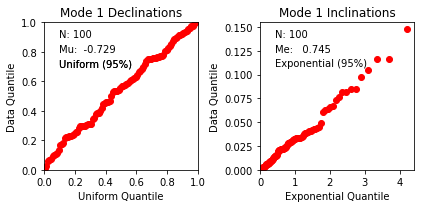

In [58]:
di_block=np.loadtxt('../fishqq/fishqq_example.txt')
fqpars=ipmag.fishqq(di_block=di_block)
print (fqpars['Test_result'])

## fishrot


[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[fishrot.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/fishrot.py)

This program is similar to [fisher](#fisher), but allows you to specify the mean direction. 
This has been implemented as **ipmag.fishrot()**. 

In [59]:
help(ipmag.fishrot)

Help on function fishrot in module pmagpy.ipmag:

fishrot(k=20, n=100, dec=0, inc=90, di_block=True)
    Generates Fisher distributed unit vectors from a specified distribution
    using the pmag.py fshdev and dodirot functions.
    
    Parameters
    ----------
    k : kappa precision parameter (default is 20)
    n : number of vectors to determine (default is 100)
    dec : mean declination of distribution (default is 0)
    inc : mean inclination of distribution (default is 90)
    di_block : this function returns a nested list of [dec,inc,1.0] as the default
    if di_block = False it will return a list of dec and a list of inc
    
    Returns
    ---------
    di_block : a nested list of [dec,inc,1.0] (default)
    dec, inc : a list of dec and a list of inc (if di_block = False)
    
    Examples
    --------
    >>> ipmag.fishrot(k=20, n=5, dec=40, inc=60)
    [[44.766285502555775, 37.440866867657235, 1.0],
     [33.866315796883725, 64.732532250463436, 1.0],
     [47.0029127705

In [309]:
rotdi=ipmag.fishrot(k=50,n=5,dec=33,inc=41)
for di in rotdi:
    print ('%7.1f %7.1f'%(di[0],di[1]))

   53.2    41.8
   32.8    40.5
   23.5    28.8
   27.5    24.0
   57.4    50.8


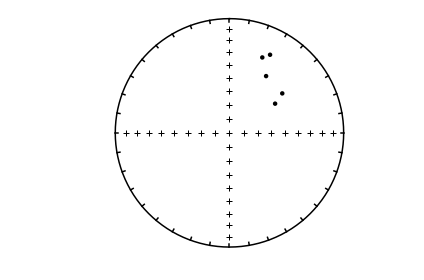

In [310]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=rotdi)

## foldtest

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html) 
[\[foldtest.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/foldtest.py)

**foldtest.py** uses the fold test of Tauxe and Watson (1994, 10.1016/0012-821x(94)90006-x  ) to find the degree of unfolding that produces the tightest distribution of directions (using the eigenvalue $\tau_1$ as the criterion.  

This can be done via **pmag.bootstrap_fold_test()** in a notebook. Note that this can take several minutes.   

In [60]:
help(ipmag.bootstrap_fold_test)

Help on function bootstrap_fold_test in module pmagpy.ipmag:

bootstrap_fold_test(Data, num_sims=1000, min_untilt=-10, max_untilt=120, bedding_error=0, save=False, save_folder='.', fmt='svg', ninety_nine=False)
    Conduct a bootstrap fold test (Tauxe and Watson, 1994)
    
    Three plots are generated: 1) equal area plot of uncorrected data;
    2) tilt-corrected equal area plot; 3) bootstrap results showing the trend
    of the largest eigenvalues for a selection of the pseudo-samples (red
    dashed lines), the cumulative distribution of the eigenvalue maximum (green
    line) and the confidence bounds that enclose 95% of the pseudo-sample
    maxima. If the confidence bounds enclose 100% unfolding, the data "pass"
    the fold test.
    
    Parameters
    ----------
    Data : a numpy array of directional data [dec, inc, dip_direction, dip]
    num_sims : number of bootstrap samples (default is 1000)
    min_untilt : minimum percent untilting applied to the data (default is -10%)

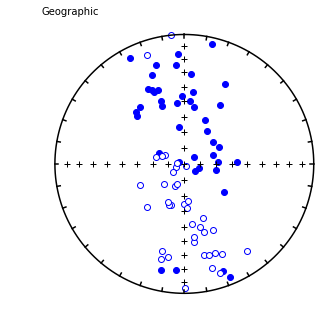

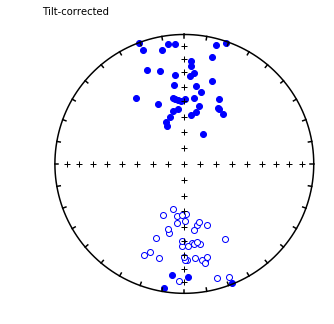

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
84 - 119 percent unfolding
range of all bootstrap samples: 
72  -  119 percent unfolding


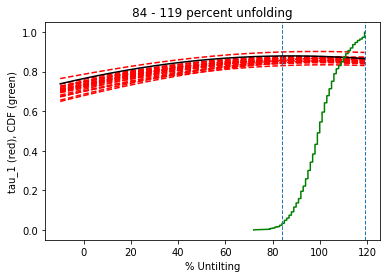

CPU times: user 1min 16s, sys: 322 ms, total: 1min 16s
Wall time: 1min 16s


In [61]:
reload(ipmag)
data=np.loadtxt('../foldtest/foldtest_example.dat')
ipmag.bootstrap_fold_test(data)

## foldtest_magic
This is just the MagIC formatted file version of **foldtest.py** and can be done using **ipmag.bootstrap_fold_test()** as above.  We just have to read in the MagIC formattest files and make a data matrix of the format expected by **ipmag.bootstrap_fold_test()**.  Here, **Pandas** is our friend.  We will: 
- Read in the MagIC (data model 3) formatted file
- Make a **Numpy** array with the required fields
- call **ipmag.bootstrap_foldtest_magic()**


In [4]:
sites=pd.read_csv('../foldtest_magic/sites.txt',sep='\t',header=1)
sites.columns

Index(['bed_dip', 'bed_dip_direction', 'citations', 'conglomerate_test',
       'contact_test', 'description', 'dir_dec', 'dir_inc', 'dir_k',
       'dir_n_samples', 'dir_nrm_origin', 'dir_polarity',
       'dir_tilt_correction', 'geologic_classes', 'geologic_types', 'lat',
       'lithologies', 'location', 'lon', 'method_codes', 'result_quality',
       'result_type', 'site', 'vgp_lat', 'vgp_lon', 'vgp_n_samples'],
      dtype='object')

The columns we need are: dir_dec, dir_inc, bed_dip_direction, bed_dip
The dir_dec and dir_inc have to have a dir_tilt_correction of 0 (geographic coordinates).
A little looking through the sites data file shows that the bed_dip_direction are on a separate line (oh database conversion tool maestro, how clever!).  So we will have to pair the bedding orientations with the geographic directional info.  Thank goodness for **Pandas**!


In [314]:
# read in data file
sites=pd.read_csv('../foldtest_magic/sites.txt',sep='\t',header=1)
# get the records with bed_dip and bed_dip_direction
sites_bedding=sites.dropna(subset=['bed_dip','bed_dip_direction'])
# get rid of them out of the original data frame
sites.drop(['bed_dip','bed_dip_direction'],axis=1,inplace=True)
# just pick out what we want (bedding orientation of the sites)
sites_bedding=sites_bedding[['site','bed_dip','bed_dip_direction']]
# put them back into the original data frame
sites=pd.merge(sites,sites_bedding,how='inner',on='site')
# now we can pick out the desired coordinate system
sites_geo=sites[sites.dir_tilt_correction==0]
# and make our data array
data=sites_geo[['dir_dec','dir_inc','bed_dip_direction','bed_dip']].values


NB: One unfortunate thing about the MagIC data model is that bedding orientation information can be either in the samples.txt or the sites.txt file.  This example assumes the data are in the _sites.txt_ file.  If not, you can read in the _samples.txt_ file and merge the bedding information with the site directions.  

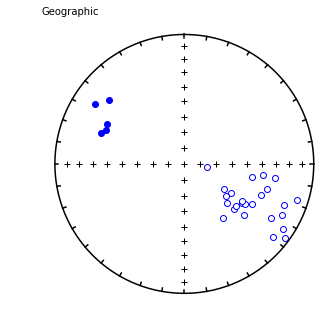

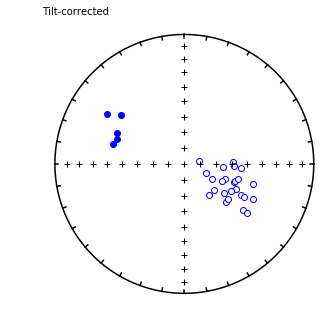

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
94 - 119 percent unfolding
range of all bootstrap samples: 
71  -  119 percent unfolding


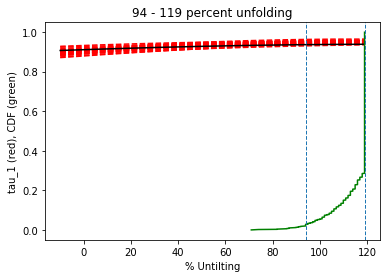

In [315]:
# and off we go! 
ipmag.bootstrap_fold_test(data)

## gaussian

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[gaussian.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/gaussian.py)

This program generates sets of data drawn from a normal distribution with a given mean and standard deviation.  It is just a wrapper for a call to  **pmag.gaussdev()** which just calls **numpy.random.normal()** which we could do, but we would have to import it, so it is easiest just to call the **pmag** version which we have already imported.  

In [62]:
help(pmag.gaussdev)

Help on function gaussdev in module pmagpy.pmag:

gaussdev(mean, sigma, N=1)
        returns a number randomly drawn from a gaussian distribution with the given mean, sigma
        Parmeters:
        _____________________________
        mean : mean of the gaussian distribution from which to draw deviates
        sigma : standard deviation of same
        N : number of deviates desired
    
        Returns
        -------
    
        N deviates from the normal distribution from
    .



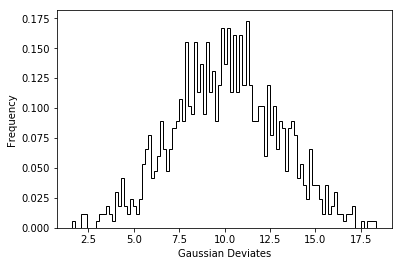

In [64]:
N=1000
bins=100
norm=pmag.gaussdev(10,3,N)
plt.hist(norm,bins=bins,histtype='step',color='black',normed=1,facecolor='white')
plt.xlabel('Gaussian Deviates')
plt.ylabel('Frequency');

## gobing

 
[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html) 
[\[gobing.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/gobing.py)

**gobing.py** calculates Bingham statistics for sets of directional data (see documentation for [eqarea_ell](#eqarea_ell) for nice examples.  The program 
 calls **pmag.dobingham()**, so we can do that here.  

In [318]:
help(pmag.dobingham)

Help on function dobingham in module pmagpy.pmag:

dobingham(di_block)
    Calculates the Bingham mean and associated statistical parameters from
    directions that are input as a di_block
    
    Parameters
    ----------
    di_block : a nested list of [dec,inc] or [dec,inc,intensity]
    
    Returns
    -------
    bpars : dictionary containing the Bingham mean and associated statistics
    dictionary keys
        dec : mean declination
        inc : mean inclination
        n : number of datapoints
        Eta : major ellipse
        Edec : declination of major ellipse axis
        Einc : inclination of major ellipse axis
        Zeta : minor ellipse
        Zdec : declination of minor ellipse axis
        Zinc : inclination of minor ellipse axis



In [319]:
di_block=np.loadtxt('../gobing/gobing_example.txt')
pmag.dobingham(di_block)


{'Edec': 105.71735145158095,
 'Einc': 9.9569002682367849,
 'Eta': 4.4907543191720025,
 'Zdec': 20.993890657557721,
 'Zeta': 4.4800269078036408,
 'Zinc': -27.647853556651516,
 'dec': 357.77952733337463,
 'inc': 60.3168380083183,
 'n': 20}

## gofish

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[gofish.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/gofish.py)

**gofish.py** calculates Fisher statistics for sets of directional data.  (see documentation for [eqarea_ell](#eqarea_ell) for nice examples.
This can be done with **ipmag.fisher_mean()** which just calls **pmag.fisher_mean()**.  **ipmag.fisher_mean()** is a little more flexible with data formats, so let's use that.  


In [320]:
help(ipmag.fisher_mean)

Help on function fisher_mean in module pmagpy.ipmag:

fisher_mean(dec=None, inc=None, di_block=None)
    Calculates the Fisher mean and associated parameters from either a list of
    declination values and a separate list of inclination values or from a
    di_block (a nested list a nested list of [dec,inc,1.0]). Returns a
    dictionary with the Fisher mean and statistical parameters.
    
    Parameters
    ----------
    dec : list of declinations or longitudes
    inc : list of inclinations or latitudes
    di_block : a nested list of [dec,inc,1.0]
        A di_block can be provided instead of dec, inc lists in which case it
        will be used. Either dec, inc lists or a di_block need to be provided.
    
    Returns
    -------
    fisher_mean : dictionary containing the Fisher mean parameters
    
    Examples
    --------
    Use lists of declination and inclination to calculate a Fisher mean:
    
    >>> ipmag.fisher_mean(dec=[140,127,142,136],inc=[21,23,19,22])
    {'alpha

In [20]:
di_block=np.loadtxt('../gofish/fishrot.out')
ipmag.fisher_mean(di_block=di_block)

{'alpha95': 6.3204467300511391,
 'csd': 10.511525802823254,
 'dec': 10.783552984917437,
 'inc': 39.602582993520244,
 'k': 59.379770717798884,
 'n': 10,
 'r': 9.8484332308595075}

## fisher mean on pandas DataFrames
There is also a function **pmag.dir_df_fisher_mean()** that calculates Fisher statistics on a Pandas DataFrame with directional data

In [63]:
help(pmag.dir_df_fisher_mean)

Help on function dir_df_fisher_mean in module pmagpy.pmag:

dir_df_fisher_mean(dir_df)
    calculates fisher mean for Pandas data frame
    
    Parameters
    __________
    dir_df: pandas data frame with columns:
        dir_dec : declination
        dir_inc : inclination
    Returns
    -------
    fpars : dictionary containing the Fisher mean and statistics
        dec : mean declination
        inc : mean inclination
        r : resultant vector length
        n : number of data points
        k : Fisher k value
        csd : Fisher circular standard deviation
        alpha95 : Fisher circle of 95% confidence



In [37]:
# make the data frame
dir_df=pd.read_csv('../gofish/fishrot.out',delim_whitespace=True, header=None)
dir_df.columns=['dir_dec','dir_inc']
pmag.dir_df_fisher_mean(dir_df)

{'alpha95': 6.3204467300511391,
 'csd': 10.511525802823254,
 'dec': 10.78355298491744,
 'inc': 39.602582993520237,
 'k': 59.379770717798884,
 'n': 10,
 'r': 9.8484332308595075}

## gokent

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html) 
[\[gokent.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/gokent.py)

With **gokent.py** we can calculate Kent statistics on sets of directional data (see documentation for [eqarea_ell](#eqarea_ell) for nice examples..  

This calls **pmag.dokent()** (see also **eqarea_ell** example)

In [322]:
help(pmag.dokent)

Help on function dokent in module pmagpy.pmag:

dokent(data, NN)
    gets Kent  parameters for data
    Parameters
    ___________________
    data :  nested pairs of [Dec,Inc]
    NN  : normalization
        NN is the number of data for Kent ellipse
        NN is 1 for Kent ellipses of bootstrapped mean directions
    
    Return 
    kpars dictionary keys
        dec : mean declination
        inc : mean inclination
        n : number of datapoints
        Eta : major ellipse
        Edec : declination of major ellipse axis
        Einc : inclination of major ellipse axis
        Zeta : minor ellipse
        Zdec : declination of minor ellipse axis
        Zinc : inclination of minor ellipse axis



In [323]:
di_block=np.loadtxt('../gokent/gokent_example.txt')
pmag.dokent(di_block,di_block.shape[0])

{'Edec': 147.69921287231705,
 'Einc': 30.819395154843157,
 'Eta': 9.3046593032996263,
 'Zdec': 246.82080930796928,
 'Zeta': 7.8051512371850489,
 'Zinc': 14.881429411175574,
 'dec': 359.15304567103982,
 'inc': 55.033415542547942,
 'n': 20}

## goprinc

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html) 
[\[goprinc.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/goprinc.py)

**goprinc.py** calculates the principal directions (and their eigenvalues) for sets of paleomagnetic vectors.  It doesn't do any statistics on them, unlike the other programs. 
It  calls **pmag.doprinc()**, so why not us?

In [324]:
help(pmag.doprinc)

Help on function doprinc in module pmagpy.pmag:

doprinc(data)
    Gets principal components from data in form of a list of [dec,inc] data.
    
    Parameters
    ----------
    data : nested list of dec, inc directions
    
    Returns
    -------
    ppars : dictionary with the principal components
        dec : principal directiion declination
        inc : principal direction inclination
        V2dec : intermediate eigenvector declination
        V2inc : intermediate eigenvector inclination
        V3dec : minor eigenvector declination
        V3inc : minor eigenvector inclination
        tau1 : major eigenvalue
        tau2 : intermediate eigenvalue
        tau3 : minor eigenvalue
        N  : number of points
        Edir : elongation direction [dec, inc, length]



In [325]:
di_block=np.loadtxt('../goprinc/goprinc_example.txt')
pmag.doprinc(di_block)

{'Edir': array([ 151.85261736,   29.07891169,    1.        ]),
 'N': 20,
 'V2dec': 151.85261735984162,
 'V2inc': 29.078911691227447,
 'V3dec': 250.25426093396385,
 'V3inc': 14.721055437689328,
 'dec': 3.8694438466644669,
 'inc': 56.740159941913355,
 'tau1': 0.87783141428962386,
 'tau2': 0.071245400428762526,
 'tau3': 0.050923185281613582}

## grab_magic_key


This program was written before the marvelous **Pandas** made life easy.  It reads in a MagIC formatted data file and prints out the desired key.  We can do that!

In [326]:
sites=pd.read_csv('../download_magic/sites.txt',sep='\t',header=1)
print (sites.lat)

0     42.60264
1     42.60264
2     42.60260
3     42.60264
4     42.60352
5     42.60350
6     42.60104
7     42.60100
8     42.73656
9     42.73660
10    42.84180
11    42.84180
12    42.86570
13    42.86570
14    42.92031
15    42.92030
16    42.56857
17    42.49964
18    42.49962
19    42.49960
20    42.50001
21    42.50000
22    42.52872
23    42.52870
24    42.45559
25    42.45560
26    42.48923
27    42.48920
28    42.46186
29    42.46190
30    42.69156
31    42.65289
32    42.65290
33    43.30504
34    43.30500
35    43.36817
36    43.36817
37    43.36820
38    43.42133
39    43.42130
40    43.88590
41    43.88590
42    43.88590
43    43.84273
44    43.84270
45    43.53289
46    43.57494
47    43.57494
48    43.57490
49    44.15663
50    44.15660
51    44.18629
Name: lat, dtype: float64


## histplot


You should use the function **plt.hist()** for this - see **gaussian** example.  

## hysteresis_magic

[\[Essentials Chapter 5\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch5.html#x15-156000813)
[\[Essentials Chapter 7\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch7.html#x15-156000813)
[\[Essentials Appendix C\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap3.html#x21-227000B#x15-156000813)
[\[MagIC Database\]](https://earthref.org/MagIC)  
[\[hysteresis_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/hysteresis_magic.py)

This program plots MagIC formatted measurement data as hysteresis loops, $\Delta$M, d$\Delta$M and backfield curves, depending on what data are available.  It calls 
**pmagplotlib.plotHDD()** to make the plots, so we can do that here.  

We do this specimen by specimen, which could be done by making a list of specimens and trotting through it.   

In [2]:
help(pmagplotlib.plotHDD)

Help on function plotHDD in module pmagpy.pmagplotlib:

plotHDD(HDD, B, M, s)
    Function to make hysteresis, deltaM and DdeltaM plots
    Parameters:
    _______________
    Input
        HDD :  dictionary with figure numbers for the keys:
            'hyst' : hysteresis plot  normalized to maximum value
            'deltaM' : Delta M plot
            'DdeltaM' : differential of Delta M plot
        B : list of field values in tesla
        M : list of magnetizations in arbitrary units
        s : specimen name string
    Ouput
      hpars : dictionary of hysteresis parameters with keys:
        'hysteresis_xhf', 'hysteresis_ms_moment', 'hysteresis_mr_moment', 'hysteresis_bc'



IS06a-1 : 
 {'hysteresis_xhf': '2.48e-05', 'hysteresis_ms_moment': '3.983e+01', 'hysteresis_mr_moment': '9.812e+00', 'hysteresis_bc': '2.868e-02', 'hysteresis_bcr': '6.117e-02', 'magic_method_codes': 'LP-BCR-HDM', 'specimen': 'IS06a-1'}
IS06a-2 : 
 {'hysteresis_xhf': '1.28e-11', 'hysteresis_ms_moment': '4.085e-06', 'hysteresis_mr_moment': '1.524e-06', 'hysteresis_bc': '6.235e-02', 'hysteresis_bcr': '1.097e-01', 'magic_method_codes': 'LP-BCR-HDM', 'specimen': 'IS06a-2'}
IS06a-3 : 
 {'hysteresis_xhf': '1.01e-11', 'hysteresis_ms_moment': '1.669e-06', 'hysteresis_mr_moment': '5.901e-07', 'hysteresis_bc': '6.227e-02', 'hysteresis_bcr': '1.137e-01', 'magic_method_codes': 'LP-BCR-HDM', 'specimen': 'IS06a-3'}
IS06a-4 : 
 {'hysteresis_xhf': '1.68e-11', 'hysteresis_ms_moment': '1.483e-05', 'hysteresis_mr_moment': '6.763e-06', 'hysteresis_bc': '6.918e-02', 'hysteresis_bcr': '9.758e-02', 'magic_method_codes': 'LP-BCR-HDM', 'specimen': 'IS06a-4'}
IS06a-5 : 
 {'hysteresis_xhf': '1.84e-11', 'hysteres

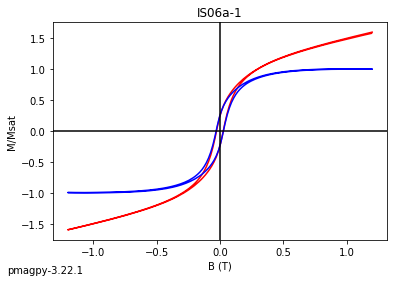

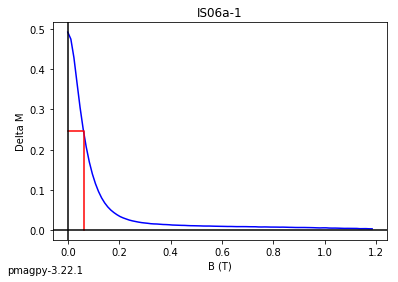

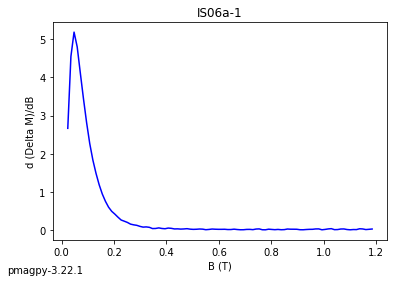

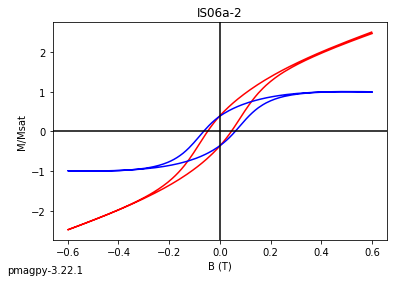

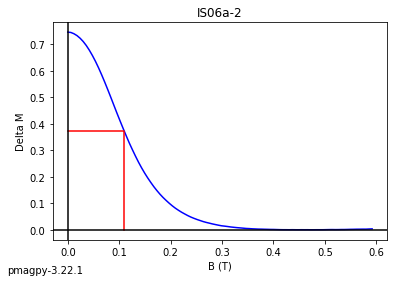

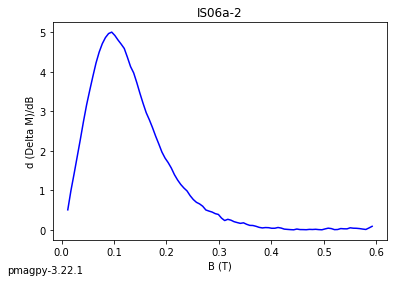

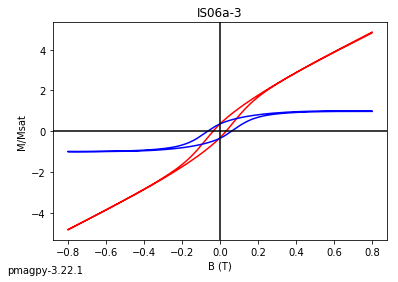

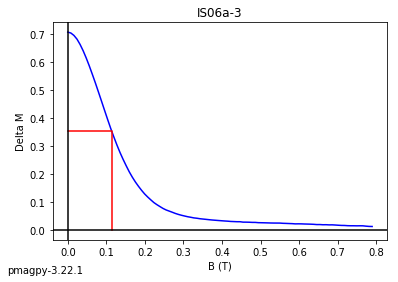

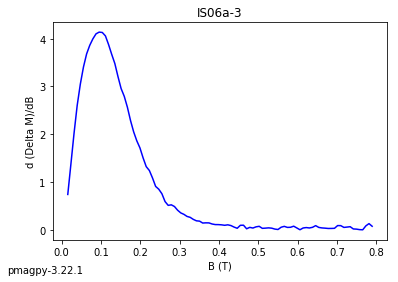

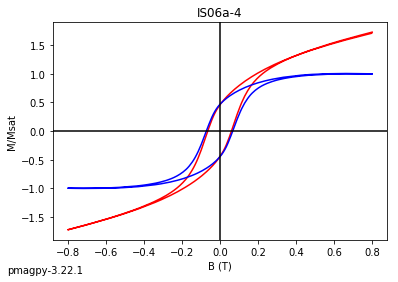

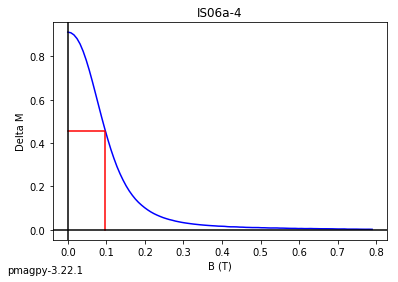

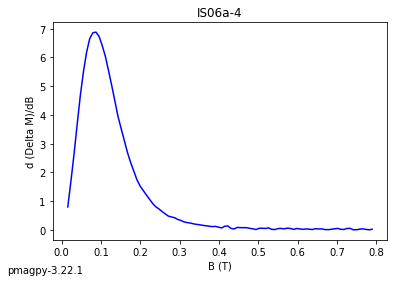

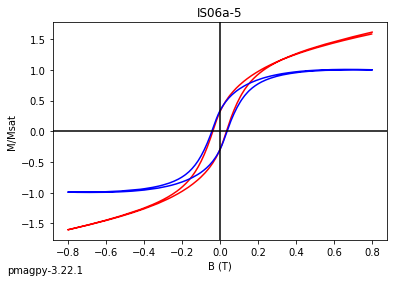

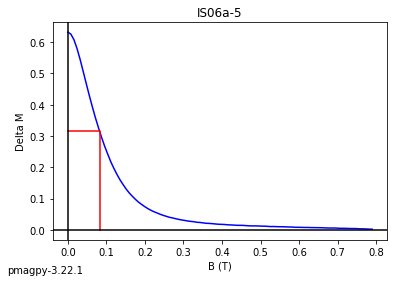

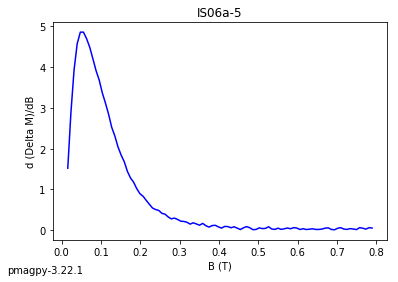

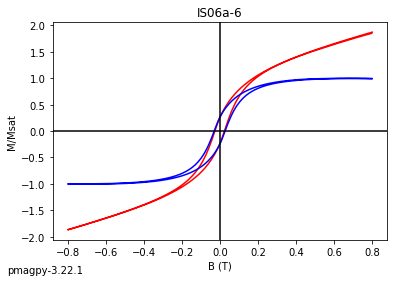

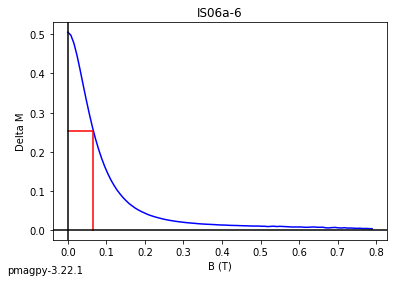

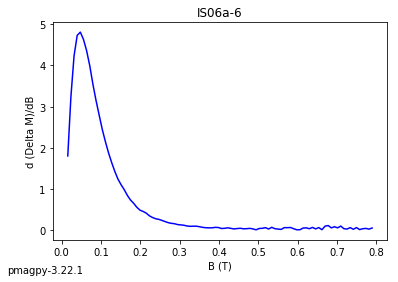

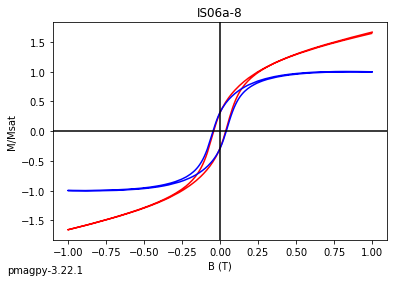

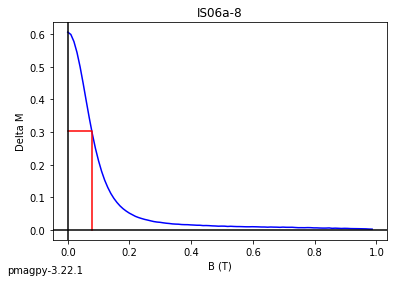

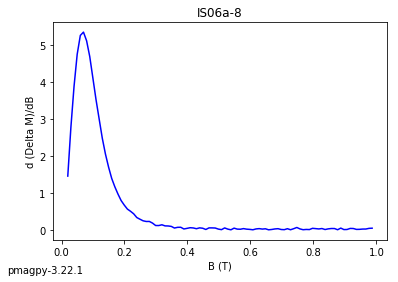

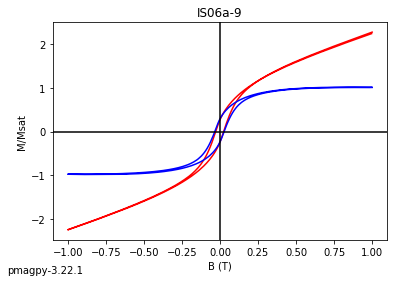

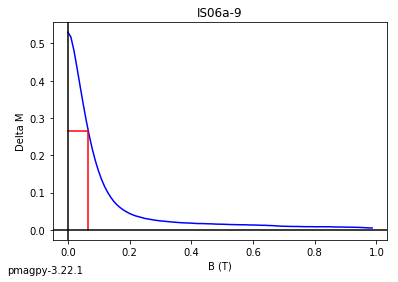

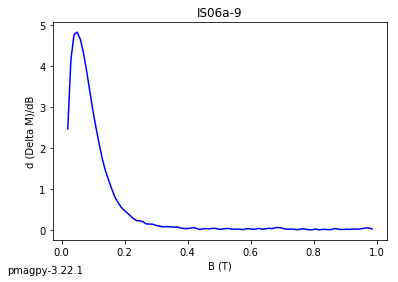

In [4]:
# read in the measurements data
meas_data=pd.read_csv('../hysteresis_magic/measurements.txt',sep='\t',header=1)
# pick out the hysteresis data using the method code for hysteresis lab protocol
hyst_data=meas_data[meas_data.method_codes.str.contains('LP-HYS')]

# make the dictionary for figures that pmagpmaglib likes

# make a list of specimens
specimens=hyst_data.specimen.unique()
cnt=1
for specimen in specimens:
    HDD={'hyst':cnt,'deltaM':cnt+1,'DdeltaM':cnt+2}
    spec_data=hyst_data[hyst_data.specimen==specimen]
# make a list of the field data
    B=spec_data.meas_field_dc.tolist()
# make a list o the magnetizaiton data
    M=spec_data.magn_moment.tolist()
# call the plotting function
    hpars=pmagplotlib.plotHDD(HDD,B,M,specimen)
    hpars['specimen']=specimen
# print out the hysteresis parameters
    print (specimen,': \n',hpars)
    cnt+=3

## igrf

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[igrf.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/igrf.py)


This program gives geomagnetic field vector data for a specified place at a specified time.  It has many built in models including  IGRFs, GUFM and several archeomagnetic models.   It calls the  function **ipmag.igrf()** for this so that is what we will do.  

In [329]:
help(ipmag.igrf)

Help on function igrf in module pmagpy.ipmag:

igrf(input_list, mod='', ghfile='')
    Determine Declination, Inclination and Intensity from the IGRF model.
    (http://www.ngdc.noaa.gov/IAGA/vmod/igrf.html)
    
    Parameters
    ----------
    input_list : list with format [Date, Altitude, Latitude, Longitude]
        date must be in decimal year format XXXX.XXXX (A.D.)
    mod :  desired model
        "" : Use the IGRF
        custom : use values supplied in ghfile
        or choose from this list
        ['arch3k','cals3k','pfm9k','hfm10k','cals10k.2','cals10k.1b']
        where:
            arch3k (Korte et al., 2009)
            cals3k (Korte and Constable, 2011)
            cals10k.1b (Korte et al., 2011)
            pfm9k  (Nilsson et al., 2014)
            hfm10k is the hfm.OL1.A1 of Constable et al. (2016)
            cals10k.2 (Constable et al., 2016)
            the first four of these models, are constrained to agree
            with gufm1 (Jackson et al., 2000) for the p

We will calculate the field for San Diego from 3000 BCE to 1950 in 50 year increments using the hfm.OL1.A1 model of Constable et al. (2016, doi: 10.1016/j.epsl.2016.08.015).  

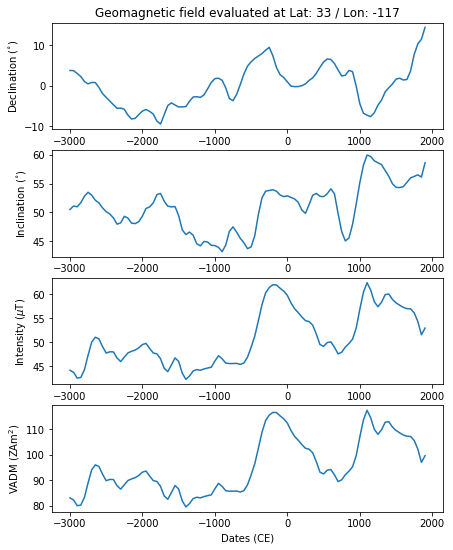

In [5]:
# make a list of desired dates
dates=range(-3000,1950,50) # list of dates in +/- Common Era
mod = 'hfm10k' # choose the desired model
lat,lon,alt=33,-117,0 # desired latitude, longitude and alitude
Vecs=[] # list for Dec,Inc,Int outputs
for date in dates: # step through the dates
    Vecs.append(ipmag.igrf([date,alt,lat,lon],mod=mod)) # append to list
vector_df = pd.DataFrame(Vecs)   # make it into a Pandas dataframe
vector_df.columns=['dec','inc','int']
vector_df['vadms']=pmag.b_vdm(vector_df.int.values*1e-9, lat) # calculate the VADMs
vector_df['dec_adj']=vector_df['dec'] 
vector_df.loc[vector_df.dec>180,['dec_adj']]=vector_df.dec-360 # adjust declinations to be -180 => 180
fig=plt.figure(1,figsize=(7,9)) # set up the figure
fig.add_subplot(411) # make 4 rows of plots, this is the first
plt.plot(dates,vector_df.dec_adj) # plot the adjusted declinations
plt.ylabel('Declination ($^{\circ}$)')
plt.title('Geomagnetic field evaluated at Lat: '+str(lat)+' / Lon: '+str(lon))
fig.add_subplot(412) # this is the second
plt.plot(dates,vector_df.inc) # plot  the inclinations
plt.ylabel('Inclination ($^{\circ}$)')
fig.add_subplot(413)
plt.plot(dates,vector_df.int*1e-3) # plot the intensites (in uT instead of nT)
plt.ylabel('Intensity ($\mu$T)')
fig.add_subplot(414) # plot the VADMs 
plt.plot(dates,vector_df.vadms*1e-21) # plot as ZAm^2
plt.ylabel('VADM (ZAm$^2$)')
plt.xlabel('Dates (CE)');



## incfish

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[incfish.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/incfish.py)

You can't get a meaningful average inclination from inclination only data because of the exponential relationship between inclinations and the true mean inclination for Fisher distributions (except exactly at the pole and the equator).  So, McFadden and Reid (1982, doi:  10.1111/j.1365-246X.1982.tb04950.x) developed a maximum liklihood estimate for getting an estimate for true mean absent declination.  **incfish.py** is an implementation of that concept.  It calls 
 **pmag.doincfish()** so that is what we will do. 

In [6]:
help(pmag.doincfish)

Help on function doincfish in module pmagpy.pmag:

doincfish(inc)
    gets fisher mean inc from inc only data
    input: list of inclination values
    output: dictionary of
        'n' : number of inclination values supplied
        'ginc' : gaussian mean of inclinations
        'inc' : estimated Fisher mean
        'r' : estimated Fisher R value
        'k' : estimated Fisher kappa
        'alpha95' : estimated fisher alpha_95
        'csd' : estimated circular standard deviation



In [332]:
incs=np.loadtxt('../incfish/incfish_example_inc.dat')
pmag.doincfish(incs)

{'alpha95': 0.99662959629642445,
 'csd': 21.705877404696871,
 'ginc': 57.135000000000005,
 'inc': 61.024999999999764,
 'k': 13.925645849497057,
 'n': 100,
 'r': 92.890814467784594}

## irmaq_magic

[\[Essentials Chapter 8\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch8.html) 
[\[irmaq_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/irmaq_magic.py)

Someone (Saiko Sugisaki) measured a number of samples from IODP Expedition 318 Hole U1359A for IRM acquisition curves. These were converted to the MagIC measurements format and saved in ../irmaq_magic/measurements.txt.  

This program reads in a MagIC data model 3 file with IRM acquisition data and plots it by calling **pmagplotlib.plotMT()** with options to plot by entire data file, site, sample or individual specimen.  We can do that too!  All we need to know is the method_code for IRM acquisition (which I do), and to propogate specimen => sample => site identities if any other plotting option besides "entire file" or by specimen is desired.  

In [7]:
help(pmagplotlib.plotMT)

Help on function plotMT in module pmagpy.pmagplotlib:

plotMT(fignum, datablock, s, num, units, norm)
    plots magnetization against (de)magnetizing temperature or field
    
    Parameters
    _________________
    Input
        fignum : matplotlib figure number for plotting
        datablock : nested list of [step, 0, 0, magnetization, 1,quality]
        s : string for title
        num : no idea - set it to zero
        units : [T,K,U] for tesla, kelvin or arbitrary
        norm : [1,0] if 1, normalize, otherwise don't
    Output
        figure



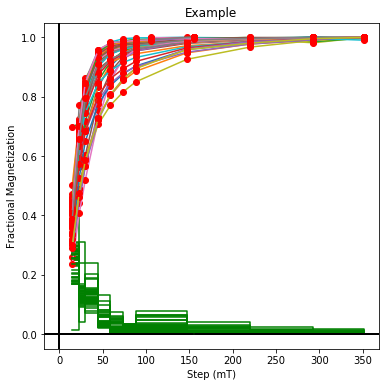

In [3]:
# make the figure
plt.figure(1,(6,6))
#read in the data
data=pd.read_csv('../irmaq_magic/measurements.txt',sep='\t',header=1)
# fish out the IRM data
data=data[data.method_codes.str.contains('LP-IRM')] # 
data['zero']=0 # make a dummy field initialized with zero
data['one']=1 # make a dummy field initialized with one
# make the required list
# possible intensity fields are:
#['magn_moment', 'magn_volume', 'magn_mass', 'magnitude']
# this data file has magn_moment data
# pmagplotlib.plotMT plots data by specimen, so get list of specimens
specimens=data.specimen.unique()
for specimen in specimens: # step through one by one
    spec_df=data[data.specimen==specimen] # get data for this specimen
    # make the data block required
    datablock=np.array(spec_df[['treat_dc_field','zero','zero','magn_moment','one','quality']]).tolist()
    pmagplotlib.plotMT(1,datablock,'Example',0,'T',1)

## lnp_magic

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html#x15-156000813)
[\[Essentials Appendix C\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap3.html#x21-227000B#x15-156000813)
[\[MagIC Database\]](https://earthref.org/MagIC)  
[\[lnp_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/lnp_magic.py)


This program makes equal area projections site by site along with the 
Fisher confidence ellipses using the McFadden and McElhinny (1988, doi: 10.1016/0012-821X(88)90072-6) 
method for combining lines and planes.  Options are to plot in specimen, geographic or tilt corrected coordinate systems (although the specimen coordinate system is a bit silly if the specimens were not mutually oriented and the geographic and tilt correctioed would presumably be identical except for a coherent rotation of the site.)
It also builds in filters for MAD or $\alpha_{95}$ cutoffs at the specimen level.

After filtering, the site level data are processed by **pmag.dolnp()** which calculates the MM88 statistics.  These, along with the data are then plotted by **pmagplotlib.plotLNP()**.  

We can do all that from within the notebook, using the wonders of Pandas.

In [8]:
help(pmagplotlib.plotLNP)

Help on function plotLNP in module pmagpy.pmagplotlib:

plotLNP(fignum, s, datablock, fpars, direction_type_key)
    plots lines and planes on a great  circle with alpha 95 and mean
    
    Parameters
    Input
        fignum : number of plt.figure() object
        datablock : nested list of dictionaries with keys in 3.0 or 2.5 format
            3.0 keys: dir_dec, dir_inc, dir_tilt_correction = [-1,0,100], direction_type_key =['p','l']
            2.5 keys: dec, inc, tilt_correction = [-1,0,100],direction_type_key =['p','l']
        fpars : Fisher parameters calculated by, e.g., pmag.dolnp() or pmag.dolnp3_0()
        direction_type_key : key for dictionary direction_type ('specimen_direction_type')
    Effects
        plots the site level figure



In [336]:
# read in specimen data
spec_df=pd.read_csv('../lnp_magic/specimens.txt',sep='\t',header=1)
# filter for quality = 'g'
if 'quality'  in spec_df.columns:
    spec_df=spec_df[spec_df.quality=='g']
spec_df.head()


specimen sample         experiments  dir_dec  dir_inc  dir_n_measurements  \
0   sv01a1  sv01a                 NaN      NaN      NaN                 NaN   
1   sv01a1  sv01a  sv01a1 : LP-DIR-AF    348.4    -34.7                12.0   
2   sv01b1  sv01b                 NaN      NaN      NaN                 NaN   
3   sv01b1  sv01b  sv01b1 : LP-DIR-AF    122.7     25.5                15.0   
4   sv01g1  sv01g                 NaN      NaN      NaN                 NaN   

   dir_tilt_correction  dir_mad_free geologic_classes geologic_types  \
0                  NaN           NaN          Igneous      Lava Flow   
1                  0.0           5.1              NaN            NaN   
2                  NaN           NaN          Igneous      Lava Flow   
3                  0.0           3.8              NaN            NaN   
4                  NaN           NaN          Igneous      Lava Flow   

  lithologies  meas_step_max  meas_step_min meas_step_unit  \
0      Basalt            NaN            NaN            NaN   
1         NaN           0.14          0.005              T   
2      Basalt            NaN            NaN            NaN   
3         NaN           0.18          0.000              T   
4      Basalt            NaN            NaN            NaN   

                                         description int_corr   citations  \
0                                                NaN      NaN  This study   
1  Recalculated from original measurements; super...        u  This study   
2                                                NaN      NaN  This study   
3  Recalculated from original measurements; super...        u  This study   
4                                                NaN      NaN  This study   

                                     method_codes specimen_direction_type  
0                                             NaN                     NaN  
1  LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO                       p  
2                                             NaN                     NaN  
3  LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO                       p  
4                                             NaN                     NaN

Of course, this being a data file conerted from data model 2.5 there are several lines per specimen. we want the non-blank dir_dec info with the desired (0) tilt correction

In [337]:
spec_df=spec_df.dropna(subset=['dir_dec','dir_inc','dir_tilt_correction'])
spec_df=spec_df[spec_df.dir_tilt_correction==0]
spec_df.head()

specimen sample         experiments  dir_dec  dir_inc  dir_n_measurements  \
1   sv01a1  sv01a  sv01a1 : LP-DIR-AF    348.4    -34.7                12.0   
3   sv01b1  sv01b  sv01b1 : LP-DIR-AF    122.7     25.5                15.0   
5   sv01g1  sv01g  sv01g1 : LP-DIR-AF    162.4     36.6                13.0   
7   sv01h1  sv01h  sv01h1 : LP-DIR-AF    190.4     34.6                13.0   
9   sv01j1  sv01j  sv01j1 : LP-DIR-AF    133.4     21.9                 8.0   

   dir_tilt_correction  dir_mad_free geologic_classes geologic_types  \
1                  0.0           5.1              NaN            NaN   
3                  0.0           3.8              NaN            NaN   
5                  0.0           3.0              NaN            NaN   
7                  0.0           5.0              NaN            NaN   
9                  0.0           5.4              NaN            NaN   

  lithologies  meas_step_max  meas_step_min meas_step_unit  \
1         NaN           0.14          0.005              T   
3         NaN           0.18          0.000              T   
5         NaN           0.18          0.010              T   
7         NaN           0.18          0.010              T   
9         NaN           0.18          0.060              T   

                                         description int_corr   citations  \
1  Recalculated from original measurements; super...        u  This study   
3  Recalculated from original measurements; super...        u  This study   
5  Recalculated from original measurements; super...        u  This study   
7  Recalculated from original measurements; super...        u  This study   
9  Recalculated from original measurements; super...        u  This study   

                                     method_codes specimen_direction_type  
1  LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO                       p  
3  LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO                       p  
5  LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO                       p  
7  LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO                       p  
9  LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO                       p

Let's proceed this way:
- get a list of all the site names. for this we will have to pair the sample with the site name from the samples.txt file.
- look at the data (only quality = 'g'), site by site, sending it to first **pmag.dolnp3_0()**, then to **pmagplotlib.plotLNP()**.

In [338]:
# read in samples table in order to pair site name to specimen data
samp_df=pd.read_csv('../lnp_magic/samples.txt',sep='\t',header=1)
samp_df.head()

sample  site specimens  dir_dec  dir_inc  dir_n_specimens  \
0  sv01a  sv01       NaN      NaN      NaN              NaN   
1  sv01a  sv01    sv01a1    348.4    -34.7              1.0   
2  sv01b  sv01       NaN      NaN      NaN              NaN   
3  sv01b  sv01    sv01b1    122.7     25.5              1.0   
4  sv01c  sv01       NaN      NaN      NaN              NaN   

   dir_n_specimens_lines  dir_n_specimens_planes  dir_tilt_correction  \
0                    NaN                     NaN                  NaN   
1                    0.0                     1.0                  0.0   
2                    NaN                     NaN                  NaN   
3                    0.0                     1.0                  0.0   
4                    NaN                     NaN                  NaN   

       lat           ...                   description azimuth   dip  \
0  35.3432           ...                           NaN   -19.0 -45.0   
1      NaN           ...             sample direction.     NaN   NaN   
2  35.3432           ...                           NaN   -51.0 -23.0   
3      NaN           ...             sample direction.     NaN   NaN   
4  35.3432           ...                           NaN   284.0 -51.0   

    citations                                    method_codes  \
0  This study          SO-MAG : FS-FD : SO-POM : SO-CMD-NORTH   
1  This study  LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO   
2  This study          SO-MAG : FS-FD : SO-POM : SO-CMD-NORTH   
3  This study  LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO   
4  This study                         SO-MAG : FS-FD : SO-POM   

                  location  sample_direction_type  age  \
0  San Francisco Volcanics                    NaN  NaN   
1  San Francisco Volcanics                      p  2.5   
2  San Francisco Volcanics                    NaN  NaN   
3  San Francisco Volcanics                      p  2.5   
4  San Francisco Volcanics                    NaN  NaN   

  sample_inferred_age_sigma sample_inferred_age_unit  
0                       NaN                      NaN  
1                       2.5                       Ma  
2                       NaN                      NaN  
3                       2.5                       Ma  
4                       NaN                      NaN  

[5 rows x 25 columns]

Of course there are duplicate sample records, so let's drop the blank lat rows (to make sure we have all the blank specimens rows, then make the data frame with just 'sample' and site' columns. Then we can merge it with the spec_df dataframe. 

In [339]:
samp_df=samp_df.dropna(subset=['specimens'])
samp_df=samp_df[['sample','site']]
spec_df=pd.merge(spec_df,samp_df,on='sample')
spec_df

specimen sample         experiments  dir_dec  dir_inc  dir_n_measurements  \
0     sv01a1  sv01a  sv01a1 : LP-DIR-AF    348.4    -34.7                12.0   
1     sv01b1  sv01b  sv01b1 : LP-DIR-AF    122.7     25.5                15.0   
2     sv01g1  sv01g  sv01g1 : LP-DIR-AF    162.4     36.6                13.0   
3     sv01h1  sv01h  sv01h1 : LP-DIR-AF    190.4     34.6                13.0   
4     sv01j1  sv01j  sv01j1 : LP-DIR-AF    133.4     21.9                 8.0   
5     sv02a1  sv02a  sv02a1 : LP-DIR-AF    330.3     30.4                 6.0   
6     sv02b1  sv02b  sv02b1 : LP-DIR-AF    225.7     37.0                14.0   
7     sv02c1  sv02c  sv02c1 : LP-DIR-AF    103.1     32.3                11.0   
8     sv02d1  sv02d  sv02d1 : LP-DIR-AF    338.6     44.5                11.0   
9     sv02e1  sv02e  sv02e1 : LP-DIR-AF    340.6     42.4                10.0   
10    sv02k1  sv02k  sv02k1 : LP-DIR-AF    337.7     40.3                12.0   
11    sv03a1  sv03a  sv03a1 : LP-DIR-AF    344.6     52.1                 4.0   
12    sv03b1  sv03b  sv03b1 : LP-DIR-AF     39.5    -24.5                 6.0   
13    sv03d1  sv03d  sv03d1 : LP-DIR-AF      3.9    -33.5                11.0   
14    sv03e1  sv03e  sv03e1 : LP-DIR-AF      8.8    -33.8                13.0   
15    sv03g1  sv03g  sv03g1 : LP-DIR-AF    352.8     52.2                 7.0   
16    sv03h1  sv03h  sv03h1 : LP-DIR-AF    349.1     55.5                 8.0   
17    sv03i1  sv03i  sv03i1 : LP-DIR-AF    353.2     57.3                 8.0   
18    sv03j1  sv03j  sv03j1 : LP-DIR-AF    324.1     44.6                 8.0   
19    sv04a1  sv04a  sv04a1 : LP-DIR-AF    348.3     50.2                12.0   
20    sv04b1  sv04b  sv04b1 : LP-DIR-AF    353.0     46.6                12.0   
21    sv04d1  sv04d  sv04d1 : LP-DIR-AF    342.6     48.7                 9.0   
22    sv04e1  sv04e  sv04e1 : LP-DIR-AF    342.2     56.9                11.0   
23    sv04i1  sv04i  sv04i1 : LP-DIR-AF    347.4     50.6                 5.0   
24    sv05a2  sv05a  sv05a2 : LP-DIR-AF    202.3     31.5                14.0   
25    sv05b1  sv05b  sv05b1 : LP-DIR-AF    160.0    -47.8                 6.0   
26    sv05c1  sv05c  sv05c1 : LP-DIR-AF    168.4     37.3                 6.0   
27    sv05d2  sv05d  sv05d2 : LP-DIR-AF    161.2    -47.4                 5.0   
28    sv05f1  sv05f  sv05f1 : LP-DIR-AF     72.5     -2.6                13.0   
29    sv05h1  sv05h  sv05h1 : LP-DIR-AF    172.0    -44.3                 7.0   
..       ...    ...                 ...      ...      ...                 ...   
159   sv58g1  sv58g  sv58g1 : LP-DIR-AF    182.5    -60.0                11.0   
160   sv58k1  sv58k  sv58k1 : LP-DIR-AF    188.0    -65.2                12.0   
161   sv59a1  sv59a  sv59a1 : LP-DIR-AF    181.0    -51.7                11.0   
162   sv59f1  sv59f  sv59f1 : LP-DIR-AF    179.6    -53.1                11.0   
163   sv59g1  sv59g  sv59g1 : LP-DIR-AF    178.4    -52.0                11.0   
164   sv59j1  sv59j  sv59j1 : LP-DIR-AF    176.4    -48.3                12.0   
165   sv60a1  sv60a  sv60a1 : LP-DIR-AF    219.1    -21.0                 7.0   
166   sv60c1  sv60c  sv60c1 : LP-DIR-AF    179.5    -28.9                 5.0   
167   sv61a1  sv61a  sv61a1 : LP-DIR-AF    163.3     61.0                10.0   
168   sv61c1  sv61c  sv61c1 : LP-DIR-AF    264.2      2.6                 9.0   
169   sv61g1  sv61g  sv61g1 : LP-DIR-AF    348.2     63.4                 7.0   
170   sv61i1  sv61i  sv61i1 : LP-DIR-AF    356.8     54.4                 5.0   
171   sv62b1  sv62b  sv62b1 : LP-DIR-AF     68.8     19.6                 9.0   
172   sv62d1  sv62d  sv62d1 : LP-DIR-AF    345.3    -35.3                11.0   
173   sv62g1  sv62g  sv62g1 : LP-DIR-AF    127.1     35.1                 7.0   
174   sv63a1  sv63a  sv63a1 : LP-DIR-AF    354.9     43.6                 8.0   
175   sv63f1  sv63f  sv63f1 : LP-DIR-AF    353.0     48.0                 5.0   
176   sv63h1  sv63h  sv63h1 : LP-DI

In [340]:
# get the site names
sites=spec_df.site.unique()
sites

array(['sv01', 'sv02', 'sv03', 'sv04', 'sv05', 'sv06', 'sv07', 'sv08',
       'sv09', 'sv10', 'sv11', 'sv12', 'sv15', 'sv16', 'sv17', 'sv18',
       'sv19', 'sv20', 'sv21', 'sv22', 'sv23', 'sv24', 'sv25', 'sv26',
       'sv27', 'sv28', 'sv30', 'sv31', 'sv32', 'sv50', 'sv51', 'sv52',
       'sv53', 'sv54', 'sv55', 'sv56', 'sv57', 'sv58', 'sv59', 'sv60',
       'sv61', 'sv62', 'sv63', 'sv64', 'sv65'], dtype=object)

Let's plot up the first 10 or so.

In [341]:
help(pmag.dolnp)

Help on function dolnp in module pmagpy.pmag:

dolnp(data, direction_type_key)
    Returns fisher mean, a95 for data  using method of Mcfadden and Mcelhinny '88 for lines and planes
    
    Parameters
    __________
    Data : nested list of dictionaries with keys
        Data model 3.0:
            dir_dec
            dir_inc
            dir_tilt_correction
            method_codes
        Data model 2.5:
            dec
            inc
            tilt_correction
            magic_method_codes
         direction_type_key :  ['specimen_direction_type']
    Returns
    -------
        ReturnData : dictionary with keys
            dec : fisher mean dec of data in Data
            inc : fisher mean inc of data in Data
            n_lines : number of directed lines [method_code = DE-BFL or DE-FM]
            n_planes : number of best fit planes [method_code = DE-BFP]
            alpha95  : fisher confidence circle from Data
            R : fisher R value of Data
            K : fisher k 

In [342]:
help(pmagplotlib.plotLNP)

Help on function plotLNP in module pmagpy.pmagplotlib:

plotLNP(fignum, s, datablock, fpars, direction_type_key)
    plots lines and planes on a great  circle with alpha 95 and mean
    
    Parameters
    Input
        fignum : number of plt.figure() object
        datablock : nested list of dictionaries with keys in 3.0 or 2.5 format
            3.0 keys: dir_dec, dir_inc, dir_tilt_correction = [-1,0,100], direction_type_key =['p','l']
            2.5 keys: dec, inc, tilt_correction = [-1,0,100],direction_type_key =['p','l']
        fpars : Fisher parameters calculated by, e.g., pmag.dolnp() or pmag.dolnp3_0()
        direction_type_key : key for dictionary direction_type ('specimen_direction_type')
    Effects
        plots the site level figure



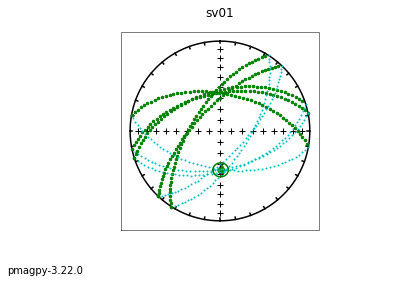

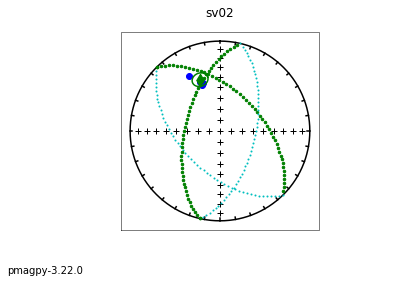

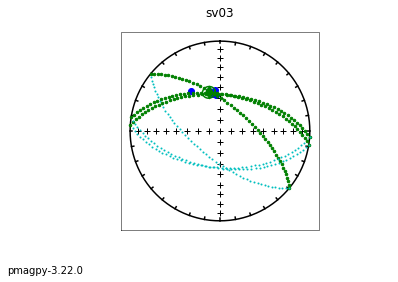

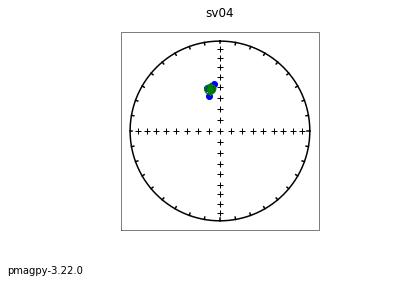

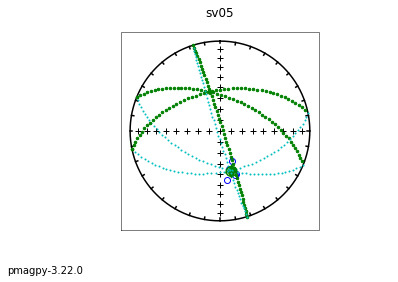

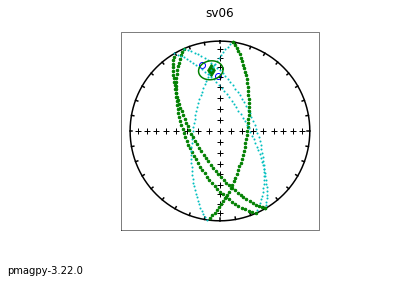

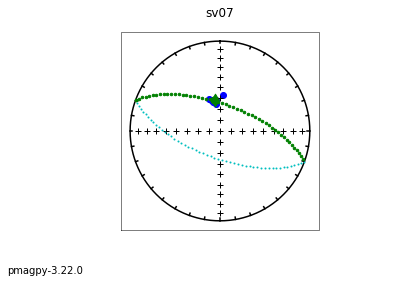

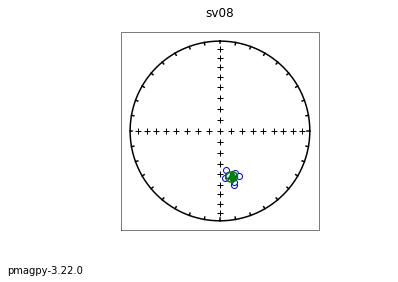

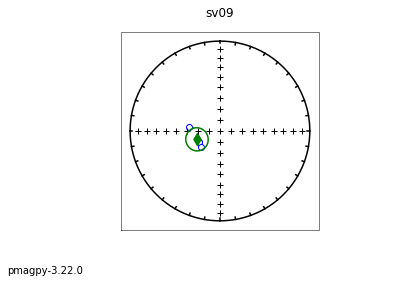

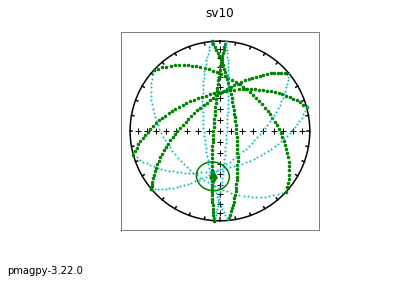

In [343]:
cnt=1
for site in sites[0:10]:
    site_data=spec_df[spec_df.site==site].to_dict('records')
    fpars=pmag.dolnp(site_data,'specimen_direction_type')
    pmagplotlib.plotLNP(cnt,site,site_data,fpars,'specimen_direction_type')
    cnt+=1


## lowes

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-156000813)
[\[lowes.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/lowes.py)


This program generates a Lowes (1974, doi: 10.1111/j.1365-246X.1974.tb00622.x)  spectrum from igrf-like field models.  It will take a specified date, get the gauss coefficients from [**pmag.doigrf()**](#igrf), unpack them into a usable format with **pmag.unpack()** and calculate the spectrum with **pmag.lowes()**.  

In [345]:
help(pmag.unpack)

Help on function unpack in module pmagpy.pmag:

unpack(gh)
     unpacks gh list into l m g h type list
     
     Parameters
     _________
     gh : list of gauss coefficients (as returned by, e.g., doigrf)
    
     Returns
    data : nested list of [[l,m,g,h],...]



In [346]:
help(pmag.lowes)

Help on function lowes in module pmagpy.pmag:

lowes(data)
    gets Lowe's power spectrum  from gauss coefficients
    
    Parameters
    _________
    data : nested list of [[l,m,g,h],...] as from pmag.unpack()
    
    Returns
    _______
    Ls : list of degrees (l) 
    Rs : power at  degree l



So let's do it!

In [10]:
date=1956 # pick a date and what better one than my birth year?  
coeffs=pmag.doigrf(0,0,0,date,coeffs=1) # get the gauss coefficients
data=pmag.unpack(coeffs) # unpack them into the form that lowes likes
Ls,Rs=pmag.lowes(data) # get the power spectrum


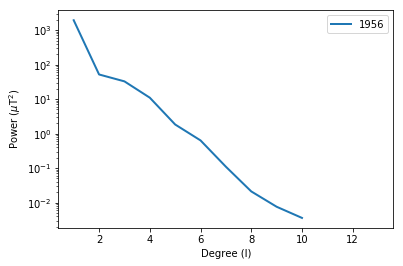

In [11]:
plt.plot(Ls,Rs,linewidth=2,label=str(date)) # make the plot
plt.semilogy() # semi log it
plt.xlabel('Degree (l)')
plt.ylabel('Power ($\mu$T$^2$)')
plt.legend();



## lowrie and lowrie_magic

[\[Essentials Chapter 8\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch8.html#x15-156000813)
[\[lowrie.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/lowrie.py)

 Someone (Saiko Sugisaki) subjected a number of specimens from IODP Expedition 318 Site U1361 specimens to a Lowrie (1990, doi: 10.1029/GL017i002p00159) 3-D IRM experiment (published as Tauxe et al., 2015, doi:10.1016/j.epsl.2014.12.034). **lowrie.py** makes plots of blocking temperature for the three coercivity fractions.


Both **lowrie.py** and **lowrie_magic.py**   take specimen level 3D-IRM data, break them into the cartesian coordinates  of the three IRM field directions and plot the different components versus demagnetizing temperature.  We can  do this with our powerful **Pandas** and **matplotlib**.  
The relevent MagIC database method code is 'LP-IRM-3D', magnetization code is one of the usual, but in this example it is 'magn_moment' and the temperature step is the usual data model 3.0 ('treat_temp') in kelvin.


We will use **pmag.dir2cart()** for the heavy lifting.  I also happen to know (because I wrote the original paper), that the X direction was the 1.0 tesla step, Y was 0.5 tesla and Z was .1 tesla, so we can put these in the legend. 

In [349]:
help(pmag.dir2cart)

Help on function dir2cart in module pmagpy.pmag:

dir2cart(d)
    Converts a list or array of vector directions in degrees (declination,
    inclination) to an array of the direction in cartesian coordinates (x,y,z)
    
    Parameters
    ----------
    d : list or array of [dec,inc] or [dec,inc,intensity]
    
    Returns
    -------
    cart : array of [x,y,z]
    
    Examples
    --------
    >>> pmag.dir2cart([200,40,1])
    array([-0.71984631, -0.26200263,  0.64278761])



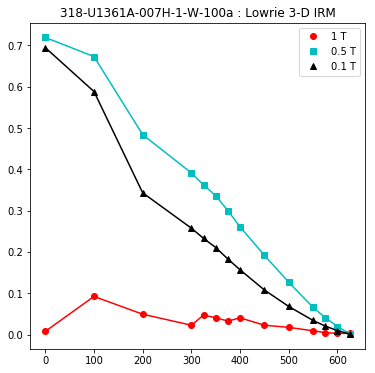

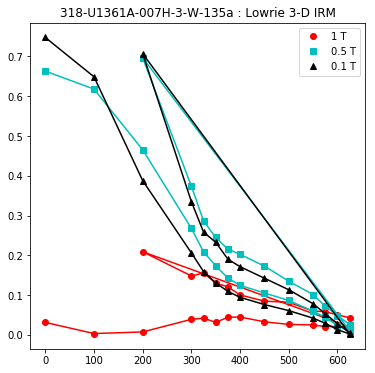

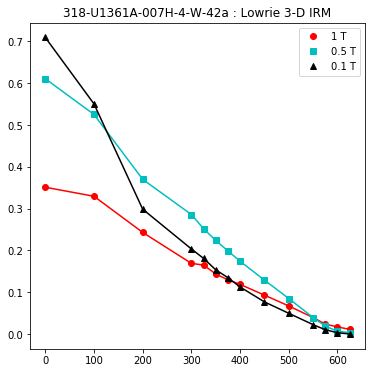

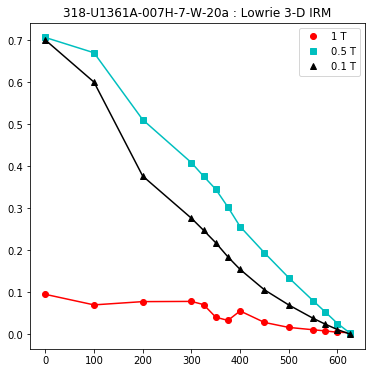

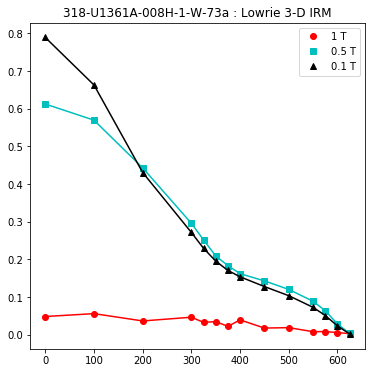

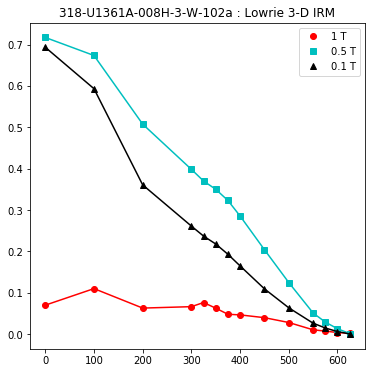

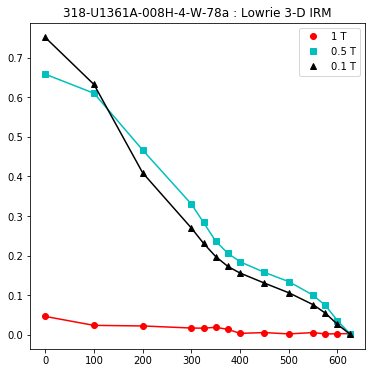

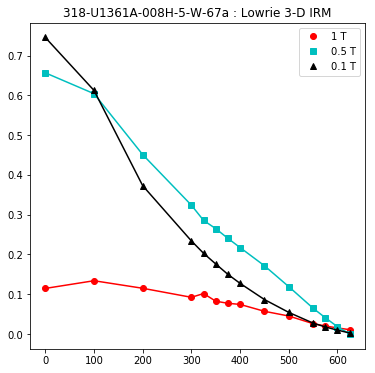

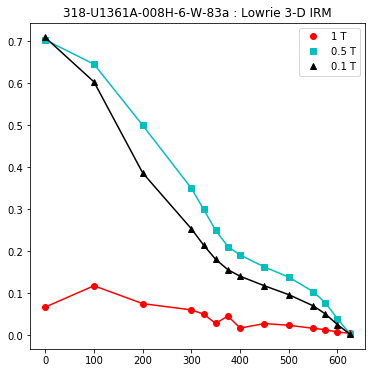

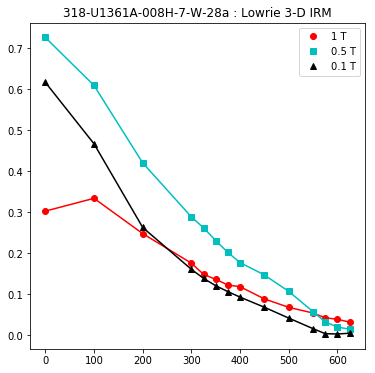

In [14]:
# read in the data file
meas_df=pd.read_csv('../lowrie_magic/measurements.txt',sep='\t',header=1)
# pick out the 3d-IRM data
meas_df=meas_df[meas_df.method_codes.str.contains('LP-IRM-3D')]
# get a list of specimen names
specimens=meas_df.specimen.unique()
cnt=1 # set figure counter
for specimen in specimens[0:10]: # step through first 10
    spec_df=meas_df[meas_df.specimen==specimen] # collect this specimen's data    
    dirs=np.array(spec_df[['dir_dec','dir_inc','magn_moment']])
    norm=dirs[0][2] # let's normalize to the initial intensity
    carts=np.absolute((pmag.dir2cart(dirs)/norm)).transpose() # get the X,Y,Z data
    temps=spec_df['treat_temp']-273 # convert to Celcius
    plt.figure(cnt,(6,6))
    plt.plot(temps,carts[0],'ro',label='1 T')
    plt.plot(temps,carts[0],'r-')
    plt.plot(temps,carts[1],'cs',label='0.5 T')
    plt.plot(temps,carts[1],'c-')
    plt.plot(temps,carts[2],'k^',label='0.1 T')
    plt.plot(temps,carts[2],'k-')
    plt.title(specimen+' : Lowrie 3-D IRM')
    plt.legend();
    cnt+=1

        

## magic_select

[\[MagIC Database\]](https://earthref.org/MagIC) [\[magic_select.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/magic_select.py)


This program is a relect from the dark ages before Pandas.  So, to do this is easy-peasy.

Note:  to output into a MagIC formatted file, we can change the DataFrame to a list of dictionaries (with df.to_dict("records")) and
use **pmag.magic_write()**.. 

In [351]:
help(pmag.magic_write)

Help on function magic_write in module pmagpy.pmag:

magic_write(ofile, Recs, file_type)
    Parameters
    _________
    ofile : path to output file
    Recs : list of dictionaries in MagIC format
    file_type : MagIC table type (e.g., specimens)
    
    Return :
    [True,False] : True if successful
    ofile : same as input 
    
    Effects :
        writes a MagIC formatted file from Recs



In [352]:
# read in the data file
spec_df=pd.read_csv('../magic_select/specimens.txt',sep='\t',header=1)
# pick out the desired data 
method_key='method_codes' # change to method_codes for data model 3
spec_df=spec_df[spec_df.method_codes.str.contains('LP-DIR-AF')]
specs=spec_df.to_dict('records') # export to list of dictionaries
success,ofile=pmag.magic_write('../magic_select/AF_specimens.txt',specs,'pmag_specimens') # specimens for data model 3.0


76  records written to file  ../magic_select/AF_specimens.txt


## orientation_magic

[\[Preparing for MagIC\]](https://earthref.org/PmagPy/cookbook/#QQ2-1-25) [\[orientation_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/orientation_magic.py)

**orientation_magic.py** is meant to import the field book data as entered into the format like in  orientation_example.txt into the MagIC format samples, sites and location tables.  
Click [here](https://earthref.org/PmagPy/cookbook/#field_info)  for details about the orient.txt file format. The example file used here has field information for a few sites. The samples were oriented with a Pomeroy orientation device (the default) and it is desirable to calculate the magnetic declination from the IGRF at the time of sampling (also the default). Sample names follow the rule that the sample is designated by a letter at the end of the site name (convention \#1 - which is also the default). We can do this from within a notebook by calling  **ipmag.orientation_magic()**.


In [15]:
help(ipmag.orientation_magic)

Help on function orientation_magic in module pmagpy.ipmag:

orientation_magic(or_con=1, dec_correction_con=1, dec_correction=0, bed_correction=True, samp_con='1', hours_from_gmt=0, method_codes='', average_bedding=False, orient_file='orient.txt', samp_file='er_samples.txt', site_file='er_sites.txt', output_dir_path='.', input_dir_path='.', append=False, data_model=2)
        use this function to convert tab delimited field notebook information to MagIC formatted tables (er_samples and er_sites)
    
        INPUT FORMAT
            Input files must be tab delimited and have in the first line:
    tab  location_name
            Note: The "location_name" will facilitate searching in the MagIC database. Data from different
                "locations" should be put in separate files.  The definition of a "location" is rather loose.
                 Also this is the word 'tab' not a tab, which will be indicated by '        '.
            The second line has the names of the columns (tab del

 We need to know which orientation convention was used to take the samples (it was with a Pomeroy, so, the default).  We want to use the igrf calculated magnetic declination at each site (so dec_correction_con=1, the default).  These samples were collected in Antarctica with a local time of GMT+13, so we need to subtract 13 hours so hours_from_gmt should be 13.  we are using data model 3.0 for this notebook, so data_model=3.  Also, input_dir_path and output_dir_path are both ../orientation_magic.  

In [16]:
ipmag.orientation_magic(input_dir_path='../orientation_magic',orient_file='orient_example.txt',\
                        hours_from_gmt=13,data_model=3,output_dir_path='../orientation_magic')

setting location name to ""
setting location name to ""
saving data...
24  records written to file  ../orientation_magic/samples.txt
2  records written to file  ../orientation_magic/sites.txt
Data saved in  ../orientation_magic/samples.txt  and  ../orientation_magic/sites.txt


(True, None)

## pca

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) [\[pca.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/pca.py)

**pca.py**  calculates best-fit lines, planes or Fisher means through selected treatment steps along with Kirschvink (1980, doi:  10.1111/j.1365-246X.1980.tb02601.x) MAD values. The file format is a simple space delimited file with specimen name, treatment step, intensity, declination and inclination. **pca.py**  calls **pmag.domean()**, so that is what we will do here. 

In [17]:
help(pmag.domean)

Help on function domean in module pmagpy.pmag:

domean(data, start, end, calculation_type)
    Gets average direction using Fisher or principal component analysis (line
    or plane) methods
    
    Parameters
    ----------
    data : nest list of data: [[treatment,dec,inc,int,quality],...]
    start : step being used as start of fit (often temperature minimum)
    end : step being used as end of fit (often temperature maximum)
    calculation_type : string describing type of calculation to be made
    'DE-BFL' (line), 'DE-BFL-A' (line-anchored), 'DE-BFL-O' (line-with-origin),
    'DE-BFP' (plane), 'DE-FM' (Fisher mean)
    
    Returns
    -------
    mpars : dictionary with the keys "specimen_n","measurement_step_min",
    "measurement_step_max","specimen_mad","specimen_dec","specimen_inc"



In [18]:
# read in data as space delimited file
data=pd.read_csv('../pca/pca_example.txt',\
                 delim_whitespace=True,header=None)
# we need to add a column for quality
data['quality']='g'
# strip off the specimen name and reorder records 
#  from:  int,dec,inc to: dec,inc,int 
data=data[[1,3,4,2,'quality']].values.tolist()
pmag.domean(data,1,10,'DE-BFL')

{'calculation_type': 'DE-BFL',
 'center_of_mass': [1.9347888195464598e-05,
  -2.1736620227095438e-05,
  2.5042313896882542e-05],
 'measurement_step_max': 70.0,
 'measurement_step_min': 2.5,
 'specimen_dang': 19.257783100769142,
 'specimen_dec': 334.90583361559271,
 'specimen_direction_type': 'l',
 'specimen_inc': 51.509732357905229,
 'specimen_mad': 8.7537005016001199,
 'specimen_n': 10}

## plotXY
This can be done directly with matplotlib.

## plot_cdf and plot_2cdfs



This program reads in a data file, sorts it and plots the data as a cumulative distribution function (using **pmagplotlib.plotCDF()**.  But we can do this directly from within the notebook without much fuss. And for plot_2cdfs, just do this twice.  


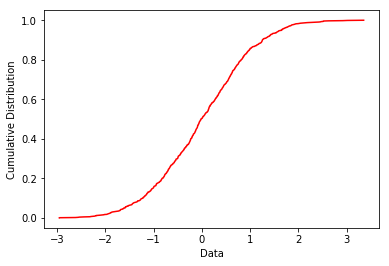

In [19]:
# read the data in
data=np.loadtxt('../plot_cdf/gaussian.out')
# sort the data
x=np.sort(data)
# create a y array
y=np.linspace(0,1,data.shape[0])
plt.plot(x,y,'r-')
# label
plt.xlabel('Data')
plt.ylabel('Cumulative Distribution');

## plot_geomagia

Geomagia is a database specially designed for archaeomagnetic and volcanic data for the last 50 kyr with a friendly search interface.   **plot_geomagia.py**   was meant to plot data from files downloaded from the geomagia website: http://geomagia.gfz-potsdam.de/geomagiav3/AAquery.php.  We can do this within the notebook.  The example used here  was for Sicily so if we felt like it, we could combine it with the **ipmag.igrf()** using one of the data models (which are in large part based on data in the geomagia database.  

Here we want to plot inclination as a function of age.  

In [20]:
geomagia=pd.read_csv('../geomagia/geomagia_sel.txt',header=1)
geomagia.head()

Age[yr.AD]  Sigma-ve[yr.]  Sigma+ve[yr.]  SigmaAgeID  N_Ba  n_Ba[meas.]  \
0        1607          -9999          -9999           1  -999         -999   
1        1610             10             10           1  -999         -999   
2        1610          -9999          -9999           1     1         -999   
3        1610              5              5           1     1         -999   
4        1614          -9999          -9999           1     1         -999   

   n_Ba[acc.]  Ba[microT]  SigmaBa[microT]  VDM[E22_AmE2]  ...   SpecTypeID  \
0        -999      -999.0           -999.0        -999.00  ...            3   
1        -999      -999.0           -999.0        -999.00  ...            0   
2           5        42.1              3.2           6.74  ...            3   
3           4        40.5              8.1        -999.00  ...            1   
4           5        40.8              3.2        -999.00  ...            3   

   RefID        CompilationID  UploadMonth  UploadYear        Uploader  \
0     36                 1005         -999        2009  Fabio Donadini   
1    259                 1001         -999        2009  Fabio Donadini   
2     36       1001;1006;1010         -999        2007  Fabio Donadini   
3     57  1001;1006;1010;1011         -999        2007  Fabio Donadini   
4     36       1001;1006;1010         -999        2007  Fabio Donadini   

          Editor  LastEditDate  C14ID   UID  
0  Maxwell Brown    24/07/2017     -1   857  
1           -999          -999     -1  5666  
2  Maxwell Brown    24/07/2017     -1   858  
3           -999          -999     -1  1403  
4  Maxwell Brown    24/07/2017     -1   836  

[5 rows x 46 columns]

We have to 'clean' the dataset by getting rid of the records with no inclinations (-999)  We can use Panda's filtering power for that: 

In [21]:
geomagia_incs=geomagia[geomagia['Inc[deg.]']>-90]
geomagia_incs['Inc[deg.]']

0     62.8
1     60.0
2     65.1
5     65.0
6     61.5
7     61.6
9     61.4
10    57.5
11    62.2
12    57.3
13    60.7
14    62.5
15    60.4
17    61.8
18    63.3
19    64.0
20    65.4
21    64.1
22    57.7
23    54.2
24    54.2
25    56.6
26    58.3
28    56.1
29    57.9
31    53.2
32    54.8
35    55.7
37    51.5
38    52.0
42    50.5
43    49.8
44    49.8
46    51.7
48    51.3
50    50.7
51    49.0
52    51.6
53    52.3
56    50.9
59    49.0
Name: Inc[deg.], dtype: float64

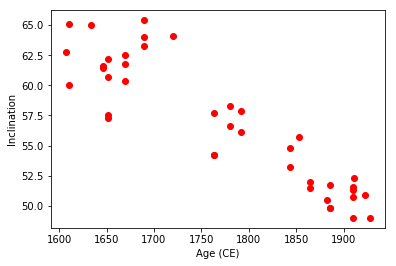

In [22]:
plt.plot(geomagia_incs['Age[yr.AD]'],geomagia_incs['Inc[deg.]'],'ro')
plt.xlabel('Age (CE)')
plt.ylabel('Inclination');

## plot_magmap

This program was designed to make color contour maps of geomagnetic field elements drawn from various IGRF-like field models (see also [igrf](#igrf)).  
It calls **pmag.do_mag_map())** to generate arrays for plotting with the **pmagplotlib.plot_mag_map()** function.   We can do that from within this notebook.  NB: You must have Basemap installed for this application.  

In [361]:
help(pmag.do_mag_map)

Help on function do_mag_map in module pmagpy.pmag:

do_mag_map(date, **kwargs)
    returns lists of declination, inclination and intensities for lat/lon grid for
    desired model and date.
    
    Parameters:
    _________________
    date = Required date in decimal years (Common Era, negative for Before Common Era)
    
    Optional Parameters:
    ______________
    mod  = model to use ('arch3k','cals3k','pfm9k','hfm10k','cals10k.2','cals10k.1b','custom')
    file = l m g h formatted filefor custom model
    lon_0 : central longitude for Hammer projection
    
    alt  = altitude
    
    Returns:
    ______________
    Bdec=list of declinations
    Binc=list of inclinations
    B = list of total field intensities in nT
    Br = list of radial field intensities
    lons = list of longitudes evaluated
    lats = list of latitudes evaluated



In [23]:
# define some useful parameters
date,mod,lon_0,alt,ghfile=1956.0725,'cals10k',0,0,"" # only date is required
Ds,Is,Bs,Brs,lons,lats=pmag.do_mag_map(date,mod=mod,lon_0=lon_0,alt=alt,file=ghfile)

In [24]:
if basemap_present:
    help(pmagplotlib.plot_mag_map)

Help on function plot_mag_map in module pmagpy.pmagplotlib:

plot_mag_map(fignum, element, lons, lats, element_type, cmap='RdYlBu', lon_0=0, date='')
    makes a color contour map of geomagnetic field element
    
    Parameters
    ____________
    fignum : matplotlib figure number
    element : field element array from pmag.do_mag_map for plotting
    lons : longitude array from pmag.do_mag_map for plotting
    lats : latitude array from pmag.do_mag_map for plotting
    element_type : [B,Br,I,D] geomagnetic element type
        B : field intensity
        Br : radial field intensity
        I : inclinations
        D : declinations
    Optional
    _________
        cmap : matplotlib color map
        lon_0 : central longitude of the Hammer projection
        date : date used for field evaluation,
               if custom ghfile was used, supply filename
    
    Effects
    ______________
    plots a Hammer projection color contour with  the desired field element



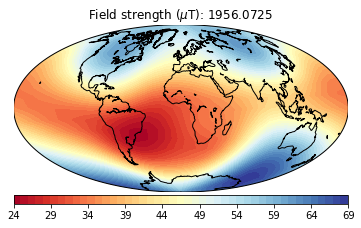

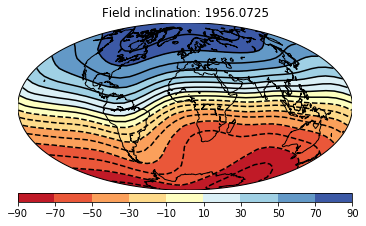

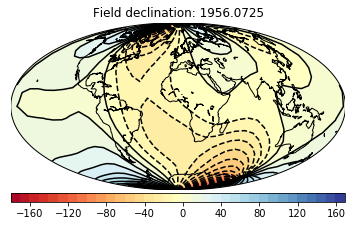

In [364]:
cmap='RdYlBu' # nice color map for contourf
if basemap_present:
    pmagplotlib.plot_mag_map(1,Bs,lons,lats,'B',date=date) # plot the field strength
    pmagplotlib.plot_mag_map(2,Is,lons,lats,'I',date=date)# plot the inclination
    pmagplotlib.plot_mag_map(3,Ds,lons,lats,'D',date=date)# plot the declination

## plot_map_pts

This program only works if you have installed Basemap.  It will generate a simple map of the data points read from a file (lon lat) on the desired projection. If you want to use high resolution or the etopo20 meshgrid, you must install the etopo20 data files (run  **install_etopo.py** from the command line).

This program sets  a bunch of options and calls **pmagplotlib.plotMAP()**.  Note, if Basemap is not installed, you can use **pmagplotlib.plot_map()** instead which uses the newer (and buggier and slower) **cartopy** plotting package.   


In [25]:
help(pmagplotlib.plotMAP)

Help on function plotMAP in module pmagpy.pmagplotlib:

plotMAP(fignum, lats, lons, Opts)
    plotMAP(fignum, lats,lons,Opts)
    makes a basemap with lats/lons
        Windows 10 users, see plot_map
    Parameters:
    _______________
    fignum : matplotlib figure number
    lats : array or list of latitudes
    lons : array or list of longitudes
    Opts : dictionary of plotting options:
        Opts.keys=
            latmin : minimum latitude for plot
            latmax : maximum latitude for plot
            lonmin : minimum longitude for plot
            lonmax : maximum longitude
            lat_0 : central latitude
            lon_0 : central longitude
            proj : projection [basemap projections, e.g., moll=Mollweide, merc=Mercator, ortho=orthorhombic,
                lcc=Lambert Conformal]
            sym : matplotlib symbol
            symsize : symbol size in pts
            edge : markeredgecolor
            pltgrid : plot the grid [1,0]
            res :  resolution

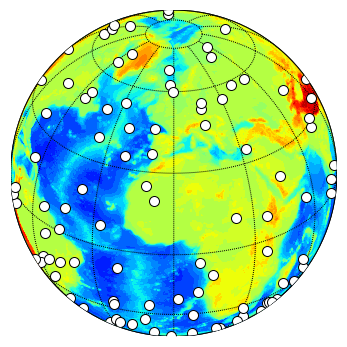

In [26]:
# read in some data: 
data=np.loadtxt('../plot_mapPTS/uniform.out').transpose()
lons=data[0] # longitudes array
lats=data[1] # latitudes array
# set some options 
Opts={}
Opts['sym']='wo' # sets the symbol to white dots
Opts['symsize']=10 # sets symbol size to 10 pts
Opts['proj']='ortho' # orthographic projection
Opts['lat_0']=30 # eyeball latitude
Opts['details']={}
Opts['details']['fancy']=True # requires etopo to be installed
if basemap_present: # this only works if you have basemap installed
    plt.figure(1,(6,6)) # optional - make a map
    pmagplotlib.plotMAP(1, lats, lons, Opts)
    

## plotdi_a

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) [\[plotdi_a.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/plotdi_a.py)


**plotdi_a.py** reads in a data file with declination, inclination and $\alpha_{95}$ data in it and plots the directions along with the confidence circles.  

We can use the function **ipmag.plot_di_mean()** for this.  


In [367]:
help(ipmag.plot_di_mean)

Help on function plot_di_mean in module pmagpy.ipmag:

plot_di_mean(dec, inc, a95, color='k', marker='o', markersize=20, label='', legend='no')
    Plot a mean direction (declination, inclination) with alpha_95 ellipse on
    an equal area plot.
    
    Before this function is called, a plot needs to be initialized with code
    that looks something like:
    >fignum = 1
    >plt.figure(num=fignum,figsize=(10,10),dpi=160)
    >ipmag.plot_net(fignum)
    
    Required Parameters
    -----------
    dec : declination of mean being plotted
    inc : inclination of mean being plotted
    a95 : a95 confidence ellipse of mean being plotted
    
    Optional Parameters (defaults are used if not specified)
    -----------
    color : the default color is black. Other colors can be chosen (e.g. 'r').
    marker : the default is a circle. Other symbols can be chosen (e.g. 's').
    markersize : the default is 20. Other sizes can be chosen.
    label : the default is no label. Labels can be assi

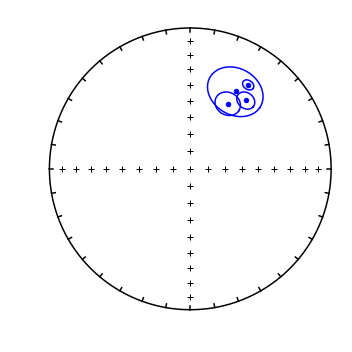

In [28]:
# read in some data
data=np.loadtxt('../plotdi_a/plotdi_a_example.dat').transpose()
decs=data[0] # array of declinations
incs=data[1] # array of inclinations
a95s=data[2] # array of alpha95s
# make the plots
fignum=1
plt.figure(num=fignum,figsize=(5,5)) # make a figure object
ipmag.plot_net(fignum) # plot the equal area net
for pt in range(decs.shape[0]): # step through the data
    ipmag.plot_di_mean(dec=decs[pt],inc=incs[pt],a95=a95s[pt],color='blue')


## polemap_magic


[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html) 
[\[polemap_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/polemap_magic.py)

**polemap_magic.py** plots poles from a MagIC formatted **locations.txt* file.  But there is nothing special about it, so we 
 can use **ipmag.plot_vgp()** for this, but substituting paleomagnetic poles for VGPs (the math is the same).  We'll try this out on a set of poles downloaded from the MagIC database for the Cretaceous of Europe.   


In [29]:
help(ipmag.plot_vgp)

Help on function plot_vgp in module pmagpy.ipmag:

plot_vgp(mapname, vgp_lon=None, vgp_lat=None, di_block=None, label='', color='k', marker='o', markersize=20, legend='no')
    This function plots a paleomagnetic pole on whatever current map projection
    has been set using the basemap plotting library.
    
    Before this function is called, a plot needs to be initialized with code
    that looks something like:
    >from mpl_toolkits.basemap import Basemap
    >mapname = Basemap(projection='ortho',lat_0=35,lon_0=200)
    >plt.figure(figsize=(6, 6))
    >mapname.drawcoastlines(linewidth=0.25)
    >mapname.fillcontinents(color='bisque',lake_color='white',zorder=1)
    >mapname.drawmapboundary(fill_color='white')
    >mapname.drawmeridians(np.arange(0,360,30))
    >mapname.drawparallels(np.arange(-90,90,30))
    
    Required Parameters
    -----------
    mapname : the name of the current map that has been developed using basemap
    plon : the longitude of the paleomagnetic pole bei

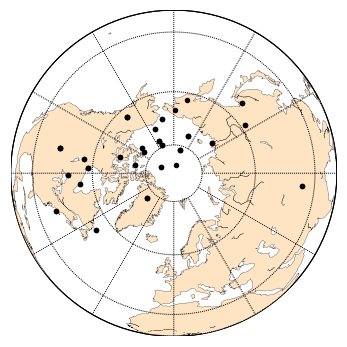

In [370]:
data=pd.read_csv('../polemap_magic/locations.txt',sep='\t',header=1)
lats=data['pole_lat'].values
lons=data['pole_lon'].values
if basemap_present:
    m = Basemap(projection='ortho',lat_0=90,lon_0=0)
    plt.figure(figsize=(6, 6))
    m.drawcoastlines(linewidth=0.25)
    m.fillcontinents(color='bisque',lake_color='white',zorder=1)
    m.drawmapboundary(fill_color='white')
    m.drawmeridians(np.arange(0,360,30))
    m.drawparallels(np.arange(-90,90,30))
    ipmag.plot_vgp(m, vgp_lon=lons, vgp_lat=lats, color='k', marker='o', \
                   markersize=20, legend='no')

## pt_rot


[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html) 
[\[Essentials Appendix A.3.5\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap1.html)
[\[pt_rot.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/pt_rot.py)



This program finds rotation poles  for a specified locaiton, age and destination plate, then roates the point into the destination plate coordinates using the roations amnd methods described in Essentials Appendix A.3.5.  
This can be done for you using the function **frp.get_pole()** in the finite rotation pole module called **pmagpy.frp**. You then call **pmag.PTrot()** to do the rotation.  Let's do this for to rotate the Cretaceous poles from Europe (sane data as in the polemap_magic example) and rotate them to South African coordinates.  


In [371]:
# need to load this special module
import pmagpy.frp as frp
help(frp.get_pole)

Help on function get_pole in module pmagpy.frp:

get_pole(continent, age)
    returns rotation poles and angles for specified continents and ages
    assumes fixed Africa.  
    Parameters
    __________
        continent : 
            aus : Australia
            eur : Eurasia
            mad : Madacascar
            [nwaf,congo] : NW Africa  [choose one]
            col :  Colombia
            grn : Greenland
            nam : North America
            par : Paraguay
            eant :  East Antarctica
            ind : India
            [neaf,kala] : NE Africa [choose one]
            [sac,sam] :  South America [choose one]
            ib : Iberia
            saf : South Africa
      Returns
      _______
          [pole longitude, pole latitude, rotation angle] : for the continent at specified age



In [372]:
Prot=frp.get_pole('eur',100)
Prot

[40.2, -12.5, 28.5]

In [373]:
help(pmag.PTrot)

Help on function PTrot in module pmagpy.pmag:

PTrot(EP, Lats, Lons)
    Rotates points on a globe by an Euler pole rotation using method of
    Cox and Hart 1986, box 7-3.
    
    Parameters
    ----------
    EP : Euler pole list [lat,lon,angle]
    Lats : list of latitudes of points to be rotated
    Lons : list of longitudes of points to be rotated
    
    Returns
    _________
    RLats : rotated latitudes
    RLons : rotated longitudes



In [374]:
data=pd.read_csv('../polemap_magic/locations.txt',sep='\t',header=1)
lats=data['pole_lat'].values
lons=data['pole_lon'].values
RLats,RLons=rot_pts=pmag.PTrot(Prot,lats,lons)

And now we can plot them using **pmagplotlib.plotMAP()**

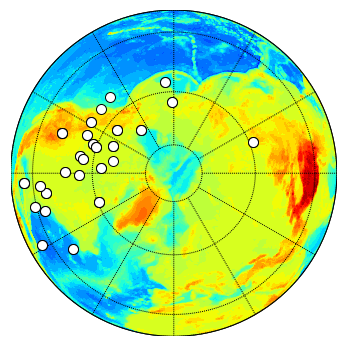

In [375]:
Opts={}
Opts['sym']='wo' # sets the symbol
Opts['symsize']=10
Opts['proj']='ortho'
Opts['lat_0']=90
Opts['details']={}
Opts['details']['fancy']=True # requires etopo to be installed
if basemap_present:
    plt.figure(1,(6,6)) # optional - make a map
    pmagplotlib.plotMAP(1, RLats, RLons, Opts)
    

## qqplot

[\[Essentials Appendix B.1.5\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap2.html)
[\[qqplot.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/qqplot.py)

**qqplot.py** makes  a quantile-quantile plot of the input data file against a normal distribution. The plot has the mean, standard deviation and the $D$ statistic as well as the $D_c$ statistic expected from a normal distribution.**qqplot.py** reads in a data file and calls **pmagplotlib.plotQQnorm()**. Let's reprise the [**gaussian.py**](#gaussian) example from before and test if the data are in fact likely to be normally distributed.    


In [32]:
data=list(pmag.gaussdev(10,3,100))

In [33]:
help(pmagplotlib.plotQQnorm)

Help on function plotQQnorm in module pmagpy.pmagplotlib:

plotQQnorm(fignum, Y, title)
    makes a Quantile-Quantile plot for data
    Parameters
    _________
    fignum : matplotlib figure number
    Y : list or array of data
    title : title string for plot
    
    Returns
    ___________
    d,dc : the values for D and Dc (the critical value)
       if d>dc, likely to be normally distributed (95\% confidence)



0.0924138754792 0.0886


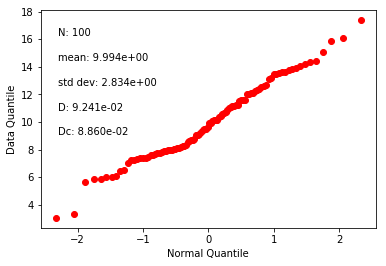

In [34]:
D,Dc=pmagplotlib.plotQQnorm(1,data,'')
print (D,Dc)

Whew!  it worked this time.  It will fail about 5% of the time.  

## qqunf

This program is very much like [**qqplot**](#qqplot) and [**fishqq**](#fishqq) which plot data against a normal and Fisherian distributions respectively.  In fact **fishqq** plots the declination values against a uniform distribution just like **qqunf**. 

**qqunf.py** calls **pmagplotlib.plotQQunf()**.  To demonstrate the functionality of **qqplot**, we can generate a simulated data set with **random.uniform()**, inspect it with a histogram and then test whether it is likely to actually have been drawn from a uniform distribution (95% confidence) using **pmagplotlib.plotQQunf()**.

(array([ 0.0111685 ,  0.01624509,  0.01015318,  0.00812255,  0.01319914,
         0.01015318,  0.00812255,  0.00710723,  0.01218382,  0.00507659]),
 array([  0.87567708,  10.72480488,  20.57393268,  30.42306047,
         40.27218827,  50.12131607,  59.97044387,  69.81957166,
         79.66869946,  89.51782726,  99.36695506]),
 <a list of 1 Patch objects>)

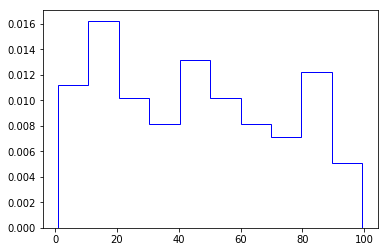

In [35]:
import numpy.random as random
uniform=random.uniform(0,100,size=100)
plt.hist(uniform,histtype='step',color='blue',normed=1,facecolor='white')

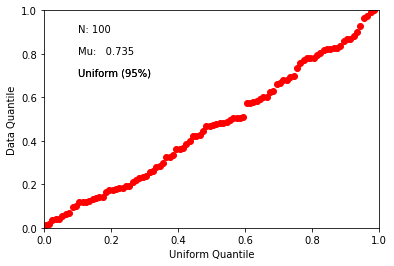

In [37]:
Mu,Mu_0=pmagplotlib.plotQQunf(1,uniform,"",degrees=False)

## revtest

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html)
[\[revtest.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/revtest.py)

**revtest.py** uses the boostrap reversals test described in detail in [\[Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html) of the online text book "Essentials of Paleomagnetism".  It splits the data into two polarity groups, flips the "reverse" mode to its antipodes and does the test for [common_mean](#common_mean) on the two groups.   It has been implemented for notebooks as **ipmag.reversal_test_bootstrap())**.  

In [5]:
help(ipmag.reversal_test_bootstrap)

Help on function reversal_test_bootstrap in module pmagpy.ipmag:

reversal_test_bootstrap(dec=None, inc=None, di_block=None, plot_stereo=False, save=False, save_folder='.', fmt='svg')
    Conduct a reversal test using bootstrap statistics (Tauxe, 2010) to
    determine whether two populations of directions could be from an antipodal
    common mean.
    
    Parameters
    ----------
    dec: list of declinations
    inc: list of inclinations
        or
    di_block: a nested list of [dec,inc]
        A di_block can be provided in which case it will be used instead of
        dec, inc lists.
    
    plot_stereo : before plotting the CDFs, plot stereonet with the
        bidirectionally separated data (default is False)
    save : boolean argument to save plots (default is False)
    save_folder : directory where plots will be saved (default is current directory, '.')
    fmt : format of saved figures (default is 'svg')
    
    Returns
    -------
    plots : Plots of the cumulative d

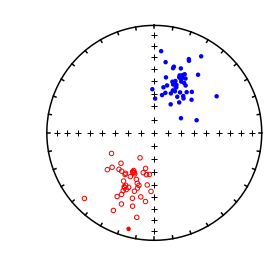

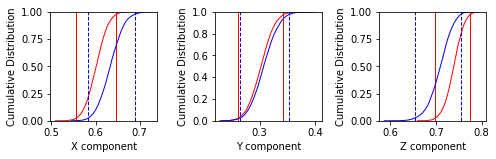

In [6]:
di_block=np.loadtxt('../revtest/revtest_example.txt')
ipmag.reversal_test_bootstrap(di_block=di_block,plot_stereo=True)

## revtest_magic

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html)
[\[MagIC Database\]](https://earthref.org/MagIC)
[\[revtest_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/revtest_magic.py)


This is the same idea as **revtest.py** but reads in MagIC formatted data files.  We will do this the **Pandas** way.  

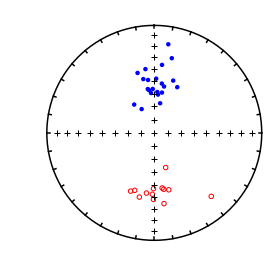

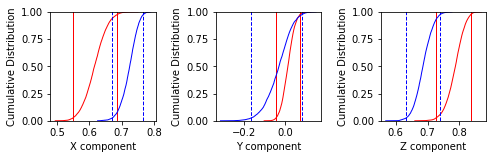

In [384]:
data=pd.read_csv('../revtest_magic/sites.txt',sep='\t',header=1)
decs=data.dir_dec.values
incs=data.dir_inc.values
ipmag.reversal_test_bootstrap(dec=decs,inc=incs,plot_stereo=True)

## revtest_mm1990

This program has been deprecated as it  is the same as [watsons_v](#watons_v) - check that one out. 

## s_eigs


[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-156000813) [\[s_eigs.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/s_eigs.py)

This program converts  the six tensor elements to eigenparameters - the inverse of [eigs_s](#eigs_s).  
We can call the function **pmag.doseigs()** from the notebook.  


In [7]:
help(pmag.doseigs)

Help on function doseigs in module pmagpy.pmag:

doseigs(s)
    convert s format for eigenvalues and eigenvectors
    
    Parameters
    __________
    s=[x11,x22,x33,x12,x23,x13] : the six tensor elements
    
    Return
    __________
        tau : [t1,t2,t3]
           tau is an list of eigenvalues in decreasing order:
        V : [[V1_dec,V1_inc],[V2_dec,V2_inc],[V3_dec,V3_inc]]
            is an list of the eigenvector directions



In [8]:
Ss=np.loadtxt('../s_eigs/s_eigs_example.dat')
for s in Ss:
    tau,V=pmag.doseigs(s)
    print ('%f %8.2f %8.2f %f %8.2f %8.2f %f %8.2f %8.2f'%\
           (tau[2],V[2][0],V[2][1],tau[1],V[1][0],V[1][1],tau[0],V[0][0],V[0][1]))

0.331272   239.53    44.70 0.333513   126.62    21.47 0.335215    19.03    37.54
0.331779   281.12     6.18 0.332183   169.79    73.43 0.336039    12.82    15.32
0.330470   283.57    27.30 0.333283   118.37    61.91 0.336247    16.75     6.13
0.331238   261.36    12.07 0.333776   141.40    66.82 0.334986   355.70    19.48
0.330857   255.71     7.13 0.333792   130.85    77.65 0.335352   346.97    10.03
0.331759   268.51    26.79 0.334050   169.66    16.95 0.334190    51.04    57.53
0.331950   261.59    20.68 0.333133    92.18    68.99 0.334917   352.93     3.54
0.331576   281.42    21.32 0.333121   117.04    67.94 0.335303    13.54     5.41


## s_geo

[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-156000813) [\[s_geo.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/s_geo.py)

**s_geo.py** takes the 6 tensor elements in specimen coordinates and applies the rotation similar to [**di_geo**](#di_geo).  It program calls **pmag.dosgeo()** which you can do from within the notebook.   


In [387]:
help(pmag.dosgeo)

Help on function dosgeo in module pmagpy.pmag:

dosgeo(s, az, pl)
    rotates  matrix a to az,pl returns  s
    Parameters
    __________
    s : [x11,x22,x33,x12,x23,x13] - the six tensor elements
    az : the azimuth of the specimen X direction
    pl : the plunge (inclination) of the specimen X direction
    
    Return
    s_rot : [x11,x22,x33,x12,x23,x13] - after rotation



In [388]:
Ss=np.loadtxt('../s_geo/s_geo_example.dat')
for s in Ss:
    print(pmag.dosgeo(s[0:6],s[6],s[7]))


[  3.34126800e-01   3.32827330e-01   3.33045870e-01  -1.52887253e-04
   1.24843325e-03   1.35721150e-03]
[  3.35563004e-01   3.31982642e-01   3.32454324e-01   8.72589299e-04
   2.41408459e-04   9.61661863e-04]
[  3.35849077e-01   3.31406265e-01   3.32744688e-01   1.31844613e-03
   1.18815608e-03   2.98639006e-05]
[ 0.33479756  0.33142531  0.33377719 -0.00047493  0.00049539  0.00044303]
[  3.35056126e-01   3.31148475e-01   3.33795398e-01  -1.01374777e-03
   2.85357179e-04   3.48516536e-04]
[  3.34061563e-01   3.32269162e-01   3.33669245e-01  -2.26655957e-05
   9.85477469e-04   5.55310689e-05]
[  3.34865957e-01   3.32160324e-01   3.32973689e-01  -3.54920368e-04
   3.92535498e-04   1.54027060e-04]
[  3.35106462e-01   3.31964016e-01   3.32929581e-01   7.59652874e-04
   5.72424440e-04   1.01121412e-04]


## s_hext

[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-156000813) [\[s_hext.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/s_hext.py)

**s_hext.py** calculates Hext (1963, doi: 10.2307/2333905) statistics for anisotropy data in the six tensor element format.  
It  calls **pmag.dohext()**.   


In [9]:
help(pmag.dohext)

Help on function dohext in module pmagpy.pmag:

dohext(nf, sigma, s)
    calculates hext parameters for nf, sigma and s
    
    Parameters
    __________
    nf :  number of degrees of freedom (measurements - 6)
    sigma : the sigma of the measurements
    s : [x11,x22,x33,x12,x23,x13] - the six tensor elements
    
    Return
    hpars : dictionary of Hext statistics with keys:
        'F_crit' : critical value for anisotropy
        'F12_crit' : critical value for tau1>tau2, tau2>3
        'F' : value of F
        'F12' : value of F12
        'F23' : value of F23
        'v1_dec': declination of principal vector
        'v1_inc': inclinatino of principal vector
        'v2_dec': declination of principal vector
        'v2_inc': declination of principal vector
        'v3_dec': declination of principal vector
        'v3_inc': declination of principal vector
        't1': declination of principal vector
        't2': declination of principal vector
        't3': declination of princ

We are working with data that have no sigmas attached to them and want to average all the values in the file together.  Let's look at the rotated data from the [**s_geo**](#s_geo) example.  

In [10]:
# read in the data
Ss=np.loadtxt('../s_geo/s_geo_example.dat')
# make a container for the rotated S values
SGeos=[]
for s in Ss:
    SGeos.append(pmag.dosgeo(s[0:6],s[6],s[7]))
nf,sigma,avs=pmag.sbar(SGeos)  # get the average over all the data
hpars=pmag.dohext(nf,sigma,avs)
print(hpars)

{'F_crit': '2.4377', 'F12_crit': '3.2199', 'F': 5.7521670646667191, 'F12': 3.5510601243464004, 'F23': 3.6635575668687972, 'v1_dec': 5.3308943453032516, 'v1_inc': 14.682483596068828, 'v2_dec': 124.47233106679136, 'v2_inc': 61.717008370180423, 'v3_dec': 268.75792759495505, 'v3_inc': 23.599173682479822, 't1': 0.3350527, 't2': 0.33334228, 't3': 0.33160499, 'e12': 25.459836196376742, 'e23': 25.114754046379378, 'e13': 13.289774374288619}


## s_magic

NEED TO ADD THIS ONE....  

## s_tilt.py 

[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-156000813) [\[s_tilt.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/s_tilt.py)

**s_tilt.py** takes the 6 tensor elements in geographic coordinates and applies the rotation similar to [**di_tilt**](#di_tilt) into stratigraphic coordinates.  It  calls **pmag.dostilt()**.  But be careful!  **s_tilt.py** assumes that the bedding info is the strike, with the dip to the right of strike unlike **pmag.dostilt** which assumes that the azimuth is the dip direction.     

In [11]:
help(pmag.dostilt)

Help on function dostilt in module pmagpy.pmag:

dostilt(s, bed_az, bed_dip)
    Rotates "s" tensor to stratigraphic coordinates
    
    Parameters
    __________
    s : [x11,x22,x33,x12,x23,x13] - the six tensor elements
    bed_az : bedding dip direction
    bed_dip :  bedding dip
    
    Return
    s_rot : [x11,x22,x33,x12,x23,x13] - after rotation



In [13]:
# note that the data in this example are Ss and strike and dip (not bed_az,bed_pl)
Ss=np.loadtxt('../s_tilt/s_tilt_example.dat')
for s in Ss:
    print(pmag.dostilt(s[0:6],s[6]+90.,s[7])) # make the bedding azimuth dip direction, not strike. 


[ 0.33455709  0.33192658  0.3335163  -0.00043562  0.00092779  0.00105006]
[  3.35855007e-01   3.31915647e-01   3.32229346e-01   5.59599721e-04
  -5.31614169e-05   6.47317735e-04]
[  3.35866690e-01   3.30849230e-01   3.33284080e-01   1.42266101e-03
   1.32339148e-04   9.20287566e-05]
[  3.34886640e-01   3.31384927e-01   3.33728433e-01  -5.65970084e-04
  -3.90853733e-04   4.87293910e-05]
[  3.35066020e-01   3.31270188e-01   3.33663732e-01  -1.05193025e-03
  -5.72566001e-04  -2.99594947e-04]
[  3.34076881e-01   3.31775665e-01   3.34147483e-01   7.00738892e-05
   1.84469245e-04   5.07318255e-05]
[  3.34839255e-01   3.31978530e-01   3.33182216e-01  -2.84465350e-04
   3.51849012e-05  -2.92616518e-04]
[  3.35131437e-01   3.31750363e-01   3.33118230e-01   7.79144117e-04
  -6.40219878e-05   4.61159470e-05]


## scalc

[\[Essentials Chapter 14\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch14.html#x15-156000813) [\[scalc.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/scalc.py)


This program reads in data files with vgp_lon, vgp_lat and optional kappa, N, and site latitude.
It allows some filtering based on the requirements of the study, such as:
- Fisher k cutoff
- VGP latitudinal cutoff
- Vandamme (1994, doi: 10.1016/0031-9201(94)90012-4) iterative cutoff
- flipping the reverse mode to antipodes
- rotating principle direction to the spin axis
- bootstrap confidence bounds
- optionally calculates the scatter (Sp or Sf of McElhinny & McFadden, 1997) of VGPs
with  correction for within site scatter.  

The filtering is just what **Pandas** was designed for, so we can  calls **pmag.scalc_vgp_df()** which works on a suitably constructed  **Pandas** DataFrame.   


In [15]:
help(pmag.scalc_vgp_df)

Help on function scalc_vgp_df in module pmagpy.pmag:

scalc_vgp_df(vgp_df, anti=0, rev=0, cutoff=180.0, kappa=0, n=0, spin=0, v=0, boot=0, mm97=0, nb=1000)
    Calculates Sf for a dataframe with VGP Lat., and optional Fisher's k, site latitude and N information can be used to correct for within site scatter (McElhinny & McFadden, 1997)
    
    Parameters
    _________
    df : Pandas Dataframe with columns
        REQUIRED:
        vgp_lat :  VGP latitude
        ONLY REQUIRED for MM97 correction:
        dir_k : Fisher kappa estimate
        dir_n_samples : number of samples per site
        lat : latitude of the site
        mm97 : if True, will do the correction for within site scatter
        OPTIONAL:
        boot : if True. do bootstrap
        nb : number of bootstraps, default is 1000
    
    Returns
    _____________
        N : number of VGPs used in calculation
        S : S
        low : 95% confidence lower bound [0 if boot=0]
        high  95% confidence upper bound [0 

To just calculate the value of S (without the within site scatter) we read in a data file and attach the correct headers to it depending on what is in it.

In [16]:
vgp_df=pd.read_csv('../scalc/scalc_example.txt',delim_whitespace=True,header=None)
if len(list(vgp_df.columns))==2:
    vgp_df.columns=['vgp_lon','vgp_lat']
    vgp_df['dir_k'],vgp_df['dir_n'],vgp_df['lat']=0,0,0
else:
    vgp_df.columns=['vgp_lon','vgp_lat','dir_k','dir_n_samples','lat']
pmag.scalc_vgp_df
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))




100    21.8    180.0 


To apply a cutoff for the Fisher k value, we just filter the DataFrame prior to calculating S_b. Let's filter for kappa>50

In [17]:
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,kappa=50)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))




73    18.5    180.0 


To apply the Vandamme (1994) approach, we set v to True

In [18]:
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,v=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))


89    15.2     32.3 


To flip the "reverse" directions, we set anti to 1

In [19]:
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,anti=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))


flipping reverse
100    21.1    180.0 


And, to do relative to the spin axis, set spin to True: 

In [21]:
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,spin=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))


100    21.6    180.0 


## scalc_magic

[\[Essentials Chapter 14\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch14.html#x15-156000813) [\[scalc_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/scalc_magic.py)


This program does the same thing as [**scalc**](#scalc), but reads in a MagIC formatted file. So, we can do that easy-peasy.

In [22]:
vgp_df=pd.read_csv('../scalc_magic/sites.txt',sep='\t',header=1)
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,anti=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))


flipping reverse
21    17.3    180.0 


In [23]:
vgp_df=pd.read_csv('../scalc_magic/sites.txt',sep='\t',header=1)
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,anti=True,spin=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))

flipping reverse
21    16.8    180.0 


## squish

[\[Essentials Chapter 7\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch7.html#x15-156000813) [\[squish.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/squish.py)



This program reads in dec/inc data and "squishes" the inclinations using the formula from King 
(1955, doi: 10.1111/j.1365-246X.1955.tb06558.x)  $\tan(I_o)=flat \tan(I_f)$.  It calls **pmag.squish()** and we can do that from within the notebook.  

In [402]:
help(pmag.squish)

Help on function squish in module pmagpy.pmag:

squish(incs, f)
    returns 'flattened' inclination, assuming factor, f and King (1955) formula:
    tan (I_o) = f tan (I_f)
    
    Parameters
    __________
    incs : array of inclination (I_f)  data to flatten
    f : flattening factor 
    
    Returns
    _______
    Io :  inclinations after flattening



In [24]:
di_block=np.loadtxt('../squish/squish_example.dat').transpose()
decs=di_block[0]
incs=di_block[1]
flat=.4
fincs=pmag.squish(incs,flat)

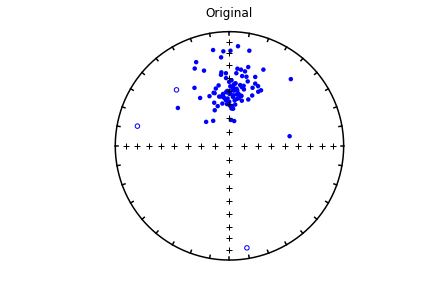

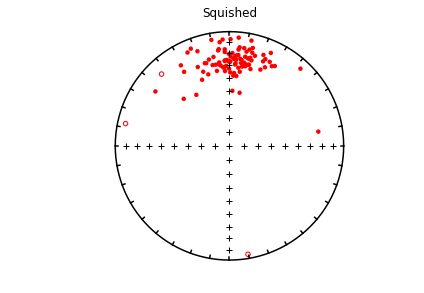

In [25]:
ipmag.plot_net(1)
ipmag.plot_di(dec=decs,inc=incs,title='Original',color='blue')
ipmag.plot_net(2)
ipmag.plot_di(dec=decs,inc=fincs,title='Squished',color='red')

## stats

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html#x15-156000813) [\[stats.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/stats.py)

This program just calculates the N, mean, sum, sigma and sigma % for data.  Obviously, there are numerous ways to do that in **Numpy**, so let's just use those.

In [405]:
data=np.loadtxt('../gaussian/gauss.out')
print (data.shape[0],data.mean(),data.sum(),data.std())

100 9.94986999 994.986999 0.953364486762


## strip_magic

[\[Essentials Chapter 15\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch15.html)
[\[MagIC Database\]](https://earthref.org/MagIC)
[\[strip_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/strip_magic.py)



This is program is a dinosaur and can be much more easily done using the wonders of **Pandas** and **matplotlib** as demonstrated here.  

In [26]:
# read in the data
data=pd.read_csv('../strip_magic/sites.txt',sep='\t',header=1)
# see what's there
data.columns

# you might have to use **df.dropna()** to clean off unwanted NaN lines or other data massaging
# but not for this example

Index(['site', 'location', 'age', 'age_unit', 'dir_dec', 'dir_inc',
       'core_depth', 'lat', 'lon', 'geologic_classes', 'geologic_types',
       'lithologies', 'citations', 'vgp_lat', 'vgp_lon', 'paleolatitude',
       'vgp_lat_rev', 'vgp_lon_rev'],
      dtype='object')

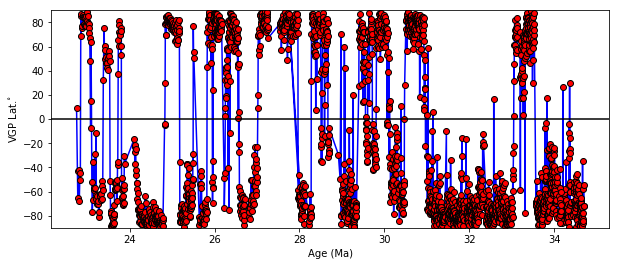

In [27]:
plt.figure(1,(10,4)) # make the figure
plt.plot(data.age,data.vgp_lat,'b-') # plot as blue line
plt.plot(data.age,data.vgp_lat,'ro',markeredgecolor="black") # plot as red dots with black rims
plt.xlabel('Age (Ma)') # label the time axis
plt.ylabel('VGP Lat.$^{\circ}$')
plt.ylim(-90,90) # set the plot limits
plt.axhline(color='black'); # put on a zero line

## sundec

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html)
[\[sundec.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/sundec.py)

Paleomagnetists often use the sun to orient their cores, especially if the sampling site is strongly magnetic and would deflect the magnetic compass.  The information required is: where are you (e.g., latitude and longitude), what day is it, what time is it in Greenwhich Mean Time (a.k.a. Universal Time) and where is the sun (e.g., the antipode of the angle the shadow of a gnomon makes with the desired direction)?

This calculation is surprisingly accurate and was implemented in the function 
 **pmag.dosundec()**.  

In [28]:
help(pmag.dosundec)

Help on function dosundec in module pmagpy.pmag:

dosundec(sundata)
    returns the declination for a given set of suncompass data
    Parameters
    __________
      sundata : dictionary with these keys:
          date: time string with the format 'yyyy:mm:dd:hr:min'
          delta_u: time to SUBTRACT from local time for Universal time
          lat: latitude of location (negative for south)
          lon: longitude of location (negative for west)
          shadow_angle: shadow angle of the desired direction with respect to the sun.
    Returns
    ________
       sunaz : the declination of the desired direction wrt true north.




Say you (or your elderly colleague) were located at 35$^{\circ}$ N and 33$^{\circ}$ E. The local time was three hours ahead of Universal Time. The shadow angle for the drilling direction was 68$^{\circ}$  measured at 16:09 on May 23, 1994. **pmag.dosundec()** requires a dictionary with the necessary information: 

In [29]:
sundata={'delta_u':3,'lat':35,'lon':33,\
         'date':'1994:05:23:16:9','shadow_angle':68}
print ('%7.1f'%(pmag.dosundec(sundata)))


  154.2


## tk03

[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html)
[\[tk03.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/tk03.py)

Sometimes it is useful to generate a distribution of synthetic geomagnetic field vectors that you might expect to find from paleosecular variation of the geomagnetic field. The program **tk03.py** generates distributions of field vectors from the PSV model of Tauxe and Kent (2004, doi: 10.1029/145GM08).  This program was implemented as **ipmag.tk03()**.  \[See also [**find_ei**](#find_ei)\]. 

In [410]:
help(ipmag.tk03)

Help on function tk03 in module pmagpy.ipmag:

tk03(n=100, dec=0, lat=0, rev='no', G2=0, G3=0)
    Generates vectors drawn from the TK03.gad model of secular
    variation (Tauxe and Kent, 2004) at given latitude and rotated
    about a vertical axis by the given declination. Return a nested list of
    of [dec,inc,intensity].
    
    Parameters
    ----------
    n : number of vectors to determine (default is 100)
    dec : mean declination of data set (default is 0)
    lat : latitude at which secular variation is simulated (default is 0)
    rev : if reversals are to be included this should be 'yes' (default is 'no')
    G2 : specify average g_2^0 fraction (default is 0)
    G3 : specify average g_3^0 fraction (default is 0)
    
    Returns
    ----------
    tk_03_output : a nested list of declination, inclination, and intensity (in nT)
    
    Examples
    --------
    >>> ipmag.tk03(n=5, dec=0, lat=0)
    [[14.752502674158681, -36.189370642603834, 16584.848620957589],
     [9.

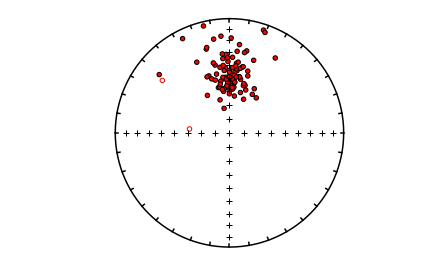

In [30]:
di_block=ipmag.tk03(lat=30)
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')

## uniform

It is at times handy to be able to generate a uniformly distributed set of directions (or geographic locations). This is done using a technique described by Fisher et al. (Fisher, N. I., Lewis, T., & Embleton, B. J. J. (1987). Statistical Analysis of Spherical Data. Cambridge: Cambridge University Press).   **uniform.py** does that for you by calling  **pmag.get_unf()**.   

In [412]:
help(pmag.get_unf)

Help on function get_unf in module pmagpy.pmag:

get_unf(N=100)
    Generates N uniformly distributed directions
    using the way described in Fisher et al. (1987).
    Parameters
    __________
    N : number of directions, default is 100
    
    Returns 
    ______
    array of nested dec,inc pairs



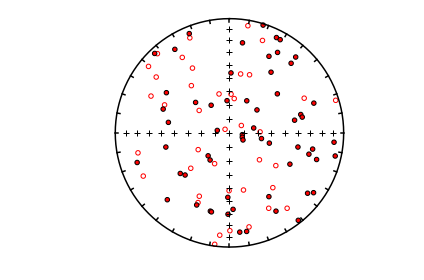

In [31]:
di_block=pmag.get_unf()
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')

## unsquish

[\[Essentials Chapter 7\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch7.html#x15-156000813) 
[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html#x15-156000813) 
[\[unsquish.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/unsquish.py)



This program is just the inverse of [**squish.py**](#squish) in that it takes "squished" data and "unsquishes" them, assuming a King (1955, doi: 10.1111/j.1365-246X.1955.tb06558.x)  relationship:  $\tan(I_o)=flat \tan(I_f)$. So, $\tan(I_f) = \tan(I_o)/flat$. 

It calls **pmag.unquish()**.  

In [32]:
help(pmag.unsquish)

Help on function unsquish in module pmagpy.pmag:

unsquish(incs, f)
    returns 'unflattened' inclination, assuming factor, f and King (1955) formula:
    tan (I_o) = tan (I_f)/f
    
    Parameters
    __________
    incs : array of inclination (I_f)  data to unflatten
    f : flattening factor
    
    Returns
    _______
    Io :  inclinations after unflattening



In [33]:
di_block=np.loadtxt('../unsquish/unsquish_example.dat').transpose()
decs=di_block[0]
incs=di_block[1]
flat=.4
fincs=pmag.unsquish(incs,flat)

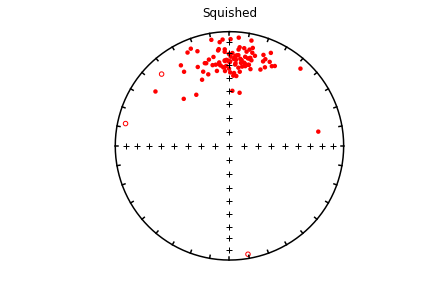

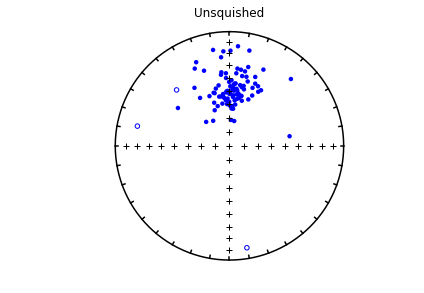

In [35]:
ipmag.plot_net(1)
ipmag.plot_di(dec=decs,inc=incs,title='Squished',color='red')
ipmag.plot_net(2)
ipmag.plot_di(dec=decs,inc=fincs,title='Unsquished',color='blue')

## vdm_b

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560002)  [\[vdm_b.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/vdm_b.py)



**vdm_b.py** if the inverse of [**b_vdm**](#b_vdm) in that it converts a  Virtual \[Axial\] Dipole Moment (vdm or vadm) to a predicted geomagnetic field intensity observed at the earth's surface at a particular (paleo)latitude.  It  program calls **pmag.vdm_b()**.

In [36]:
help(pmag.vdm_b)

Help on function vdm_b in module pmagpy.pmag:

vdm_b(vdm, lat)
    Converts a virtual dipole moment (VDM) or a virtual axial dipole moment
    (VADM; input in units of Am^2) to a local magnetic field value (output in
    units of tesla)
    
    Parameters
    ----------
    vdm : V(A)DM in units of Am^2
    lat: latitude of site in degrees
    
    Returns
    -------
    B: local magnetic field strength in tesla



In [37]:
print ('%7.1f microtesla'%(pmag.vdm_b(7.159e22,22)*1e6))

   33.0 microtesla


## vector_mean

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560002)  [\[vector_mean.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/vector_mean.py)

**vector_mean.py** calculates the vector mean for a set of vectors in polar coordinates (e.g., declination, inclination, intensity).  This is similar to the Fisher mean ([(**gofish**](#gofish)) but uses vector length instead of unit vectors.  It calls
calls **pmag.vector_mean()**.

In [38]:
help(pmag.vector_mean)

Help on function vector_mean in module pmagpy.pmag:

vector_mean(data)
    calculates the vector mean of a given set of vectors
    Parameters
    __________
    data :  nested array of [dec,inc,M]
    
    Returns
    _______
    dir : array of [dec, inc, 1]
    R : resultant vector length



In [39]:
data=np.loadtxt('../vector_mean/vector_mean_example.dat')
Dir,R=pmag.vector_mean(data)
print (('%i %7.1f %7.1f %f')%(data.shape[0],Dir[0],Dir[1],R))

100     1.3    49.6 2289431.981383


## vgp_di

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[vgp_di.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/vgp_di.py)


We use  program **vgp_di.py** to convert Virtual Geomagnetic Pole positions to predicted directions.  \[See also [**di_vgp**](#di_vgp).

This program calls **pmag.vgp_di()**.  

In [41]:
help(pmag.vgp_di)

Help on function vgp_di in module pmagpy.pmag:

vgp_di(plat, plong, slat, slong)
    Converts a pole position (pole latitude, pole longitude) to a direction
    (declination, inclination) at a given location (slat, slong) assuming a
    dipolar field.
    
    Parameters
    ----------
    plat : latitude of pole (vgp latitude)
    plong : longitude of pole (vgp longitude)
    slat : latitude of site
    slong : longitude of site
    
    Returns
    ----------
    dec,inc : tuple of declination and inclination



In [42]:
d,i=pmag.vgp_di(68,191,33,243)
print ('%7.1f %7.1f'%(d,i))

  335.6    62.9


## vgpmap_magic

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[MagIC Database\]](https://earthref.org/MagIC)
[\[vgpmap_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/vgpmap_magic.py)

Plotting distributions of Virtual Geomagnetic Poles on many desired map projections is a frequent need in paleomagnetism.  **vgpmap_magic.py** reads in MagIC formatted files and has a number of plotting options.  It has been implemented into the **ipmag** module by Nick Swanson-Hysell as **ipmag.plot_vgp()**.  
We cam use  **ipmag.plot_vgp()** after reading in a MagIC formatted sites.txt file. NB: you could also use **pmagplotlib.plotMAP()** (see [**plot_map_pts**](#plot_map_pts) if more options are desired. 

In [423]:
help(ipmag.plot_vgp)

Help on function plot_vgp in module pmagpy.ipmag:

plot_vgp(mapname, vgp_lon=None, vgp_lat=None, di_block=None, label='', color='k', marker='o', markersize=20, legend='no')
    This function plots a paleomagnetic pole on whatever current map projection
    has been set using the basemap plotting library.
    
    Before this function is called, a plot needs to be initialized with code
    that looks something like:
    >from mpl_toolkits.basemap import Basemap
    >mapname = Basemap(projection='ortho',lat_0=35,lon_0=200)
    >plt.figure(figsize=(6, 6))
    >mapname.drawcoastlines(linewidth=0.25)
    >mapname.fillcontinents(color='bisque',lake_color='white',zorder=1)
    >mapname.drawmapboundary(fill_color='white')
    >mapname.drawmeridians(np.arange(0,360,30))
    >mapname.drawparallels(np.arange(-90,90,30))
    
    Required Parameters
    -----------
    mapname : the name of the current map that has been developed using basemap
    plon : the longitude of the paleomagnetic pole bei

In [43]:
data=pd.read_csv('../vgpmap_magic/sites.txt',sep='\t',header=1)
data.columns

Index(['age', 'age_sigma', 'age_unit', 'citations', 'conglomerate_test',
       'contact_test', 'criteria', 'description', 'dir_alpha95', 'dir_dec',
       'dir_inc', 'dir_k', 'dir_n_samples', 'dir_nrm_origin', 'dir_polarity',
       'dir_r', 'dir_tilt_correction', 'int_abs', 'int_abs_sigma',
       'int_n_samples', 'lat', 'location', 'lon', 'method_codes',
       'result_type', 'site', 'specimens', 'vadm', 'vadm_sigma', 'vgp_dm',
       'vgp_dp', 'vgp_lat', 'vgp_lon', 'vgp_n_samples'],
      dtype='object')

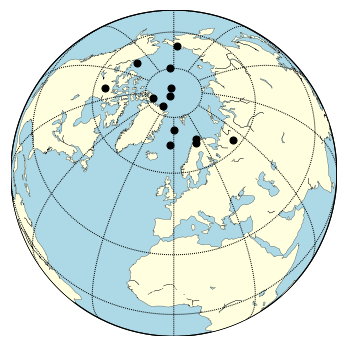

In [44]:
lats=data['vgp_lat'].values
lons=data['vgp_lon'].values
if basemap_present:
    m = Basemap(projection='ortho',lat_0=60,lon_0=0)
    plt.figure(figsize=(6, 6))
    m.drawcoastlines(linewidth=0.25)
    m.fillcontinents(color='lightyellow',lake_color='lightblue',zorder=1)
    m.drawmapboundary(fill_color='lightblue')
    m.drawmeridians(np.arange(0,360,30))
    m.drawparallels(np.arange(-90,90,30))
    ipmag.plot_vgp(m, vgp_lon=lons, vgp_lat=lats, color='k', marker='o', \
                   markersize=50, legend='no')

## watsons_f

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[watsons_f.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/watsons_f.py)

There are several different ways of testing whether two sets of directional data share a common mean.  One popular (although perhaps not the best) way is to use Watson's F test (Watson, 1956, doi: 10.1111/j.1365-246X.1956.tb05560.x).   \[See also [**watsons_v**](#watsons_v) or  Lisa Tauxe's bootstrap way: [**common_mean**](#common_mean).  

If you still want to use Waston's F, then try 
 **pmag.watsons_f()** for this.

In [426]:
help(pmag.watsons_f)

Help on function watsons_f in module pmagpy.pmag:

watsons_f(DI1, DI2)
    calculates Watson's F statistic (equation 11.16 in Essentials text book.
    
    Parameters
    _________
    DI1 : nested array of [Dec,Inc] pairs
    DI2 : nested array of [Dec,Inc] pairs
    
    Returns
    _______
    F : Watson's F
    Fcrit : critical value from F table



In [431]:
DI1=np.loadtxt('../watsonsF/watsonsF_example_file1.dat')
DI2=np.loadtxt('../watsonsF/watsonsF_example_file2.dat')
F,Fcrit=pmag.watsons_f(DI1,DI2)
print ('%7.2f %7.2f'%(F,Fcrit))

   5.23    3.26


## watsons_v

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[watsons_v.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/watsons_v.py)

Watson (1983, doi: 10.1016/0378-3758(83)90043-5) proposed a clever Monte Carlo type test for a common mean direction for two data sets.  This was implemented as 
 **ipmag.common_mean_watson()**. 


In [45]:
help(ipmag.common_mean_watson)

Help on function common_mean_watson in module pmagpy.ipmag:

common_mean_watson(Data1, Data2, NumSims=5000, print_result=True, plot='no', save=False, save_folder='.', fmt='svg')
    Conduct a Watson V test for a common mean on two directional data sets.
    
    This function calculates Watson's V statistic from input files through
    Monte Carlo simulation in order to test whether two populations of
    directional data could have been drawn from a common mean. The critical
    angle between the two sample mean directions and the corresponding
    McFadden and McElhinny (1990) classification is printed.
    
    Parameters
    ----------
    Data1 : a nested list of directional data [dec,inc] (a di_block)
    Data2 : a nested list of directional data [dec,inc] (a di_block)
    NumSims : number of Monte Carlo simulations (default is 5000)
    print_result : default is to print the test result (True)
    plot : the default is no plot ('no'). Putting 'yes' will the plot the CDF
        

Results of Watson V test: 

Watson's V:           10.5
Critical value of V:  6.5
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 21.5
Critical angle for M&M1990:   17.0



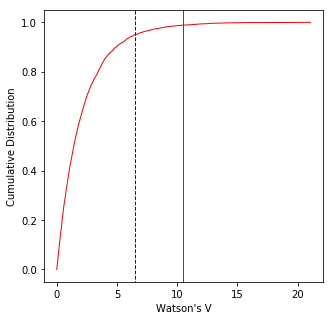

(0, 21.534333502358034, 16.976683211281934)

In [46]:
# use the same data as for watsons_f
DI1=np.loadtxt('../watsonsF/watsonsF_example_file1.dat')
DI2=np.loadtxt('../watsonsF/watsonsF_example_file2.dat')

plt.figure(1,(5,5))
ipmag.common_mean_watson(DI1,DI2,plot='yes')


## zeq 

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html) 
[\[zeq.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/zeq.py)

**zeq.py** is a quick and dirty plotter for Zijderveld (Zijderveld, J. D. A. (1967). A.C. demagnetization of rocks: analysis of results. In D. Collinson, K. Creer, & S. Runcorn (Eds.), Methods in Paleomagnetism (pp. 254–286). Amsterdam: Elsevier) diagrams.  It calls **pmagplotlib.plotZED()** to do the plotting. 

This example plots the data in specimen coordinates = if other coordinate systems are desired, perform [**di_geo**](#di_geo) and [**di_tilt**](#di_tilt) steps first.  



In [65]:
reload(pmagplotlib)
help(pmagplotlib.plotZED)

Help on function plotZED in module pmagpy.pmagplotlib:

plotZED(ZED, datablock, angle, s, units)
    function to make equal area plot and zijderveld plot
    
    Parameters
    _________
    ZED : dictionary with keys for plots
        eqarea : figure number for equal area projection 
        zijd   : figure number for  zijderveld plot
        demag :  figure number for magnetization against demag step
    datablock : nested list of [step, dec, inc, M (Am2), quality]
        step : units assumed in SI
        M    : units assumed Am2
        quality : [g,b], good or bad measurement; if bad will be marked as such 
    angle : angle for X axis in horizontal plane, if 0, x will be 0 declination
    s : specimen name
    units :  SI units ['K','T','U'] for kelvin, tesla or undefined
    
    Effects
    _______
       calls plotting functions for equal area, zijderveld and demag figures



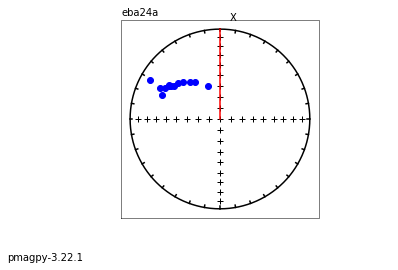

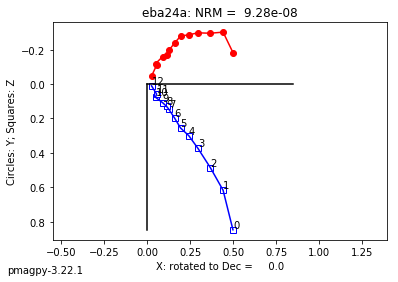

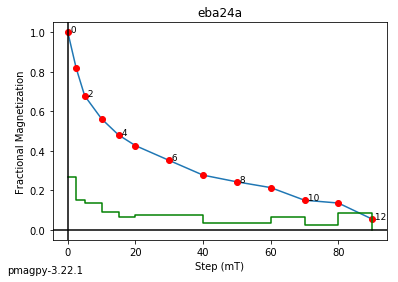

In [66]:
# we can make the figure dictionary that pmagplotlib likes:
ZED={'eqarea':1,'zijd':2, 'demag':3}# make datablock
 # read in data
data=pd.read_csv('../zeq/zeq_example.dat',delim_whitespace=True,header=None)
data.columns=['specimen','step','m (emu)','dec','inc']
data['m SI']=data['m (emu)']*1e-3 # convert to SI units from lab (emu) units
data['quality']='g' # add in default "good" quality designation
data['step SI']=data['step']*1e-3 # convert to tesla 
data['blank']="" # this is a dummy variable expected by plotZED
specimens=data.specimen.unique()
angle=0
units='T' # these are AF data
cnt=1
for s in specimens:
    # we can make the figure dictionary that pmagplotlib likes:
    ZED={'eqarea':cnt,'zijd':cnt+1, 'demag':cnt+2}# make datablock
    cnt+=3
    spec_df=data[data.specimen==s]
    datablock=spec_df[['step SI','dec','inc','m SI','blank','quality']].values.tolist()
    pmagplotlib.plotZED(ZED,datablock,angle,s,units)
    


## zeq_magic

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html) 
[\[MagIC Database\]](https://earthref.org/MagIC)
[\[zeq_magic.py code\]](https://github.com/PmagPy/PmagPy/blob/master/programs/zeq_magic.py)

This program is the same as [**zeq**](#zeq) but for MagIC formatted input files.  This example plots the data in specimen coordinates = if other coordinate systems are desired, perform [**di_geo**](#di_geo) and [**di_tilt**](#di_tilt) steps first.



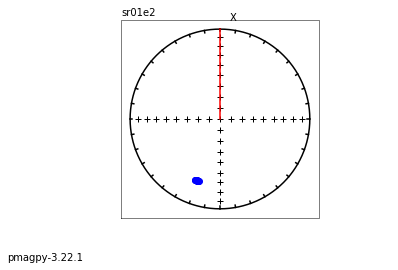

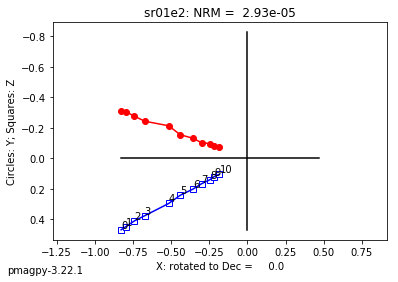

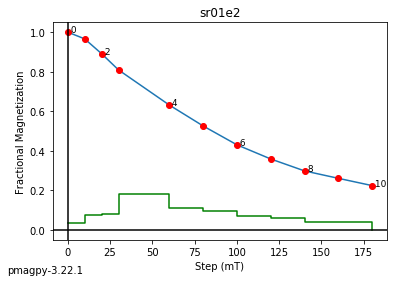

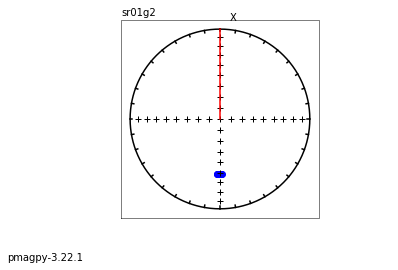

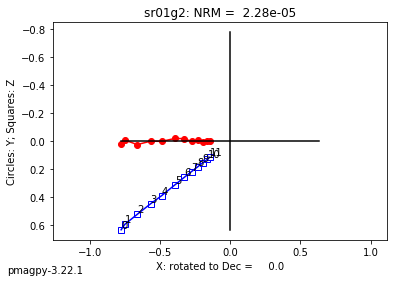

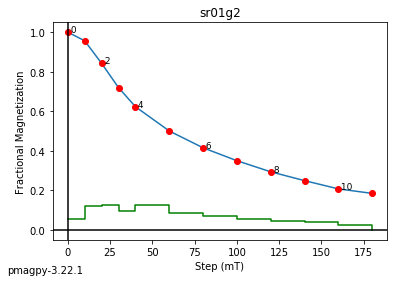

In [13]:
 # read in MagIC foramatted data
data=pd.read_csv('../zeq_magic/measurements.txt',sep='\t',header=1) #read in magic formatted data
data['blank']="" # this is a dummy variable expected by plotZED
specimens=data.specimen.unique() # list of specimen names
angle=0 # angle to plot wrt horizontal
cnt=1
for s in specimens:
    # we can make the figure dictionary that pmagplotlib likes:
    ZED={'eqarea':cnt,'zijd':cnt+1, 'demag':cnt+2}# make datablock
    cnt+=3
    spec_df=data[data.specimen==s]
    spec_df_nrm=spec_df[spec_df.method_codes.str.contains('LT-NO')] # get the NRM data
    spec_df_th=spec_df[spec_df.method_codes.str.contains('LT-T-Z')] # zero field thermal demag steps
    spec_df_th=spec_df_th[spec_df.method_codes.str.contains('LT-PTRM')==False] # get rid of some pTRM steps
    spec_df_af=spec_df[spec_df.method_codes.str.contains('LT-AF-Z')]
    if len(spec_df_th.index)>1: # this is a thermal run
        spec_df=pd.concat([spec_df_nrm,spec_df_th])
        units='K' # units are kelvin
        datablock=spec_df[['treat_temp','dir_dec','dir_inc','magn_moment','blank','quality']].values.tolist()
        pmagplotlib.plotZED(ZED,datablock,angle,s,units)
    if len(spec_df_af.index)>1: # this is an af run
        spec_df=pd.concat([spec_df_nrm,spec_df_af])
        units='T' # these are AF data
        datablock=spec_df[['treat_ac_field','dir_dec','dir_inc','magn_moment','blank','quality']].values.tolist()      
        pmagplotlib.plotZED(ZED,datablock,angle,s,units)

    
    
